# **FINAL PROJECT**

|E-Commerce Customer Churn - Analysis and Predict|
|---|
|Erwin Surya|
|Ulfatul Aini|

|No|List of Contents|
|----|---|
|1 |Background|
|2 |Problem Statement|
|3 |Goals|
|4 |Data Understanding|
|5 |Data Cleaning|
|6 |Data Analysis|
|7 |Modelling|
|8 |Impact Business|  
|9 |Conclusion and Recomendations|  

### **1. BACKGROUND**

Dalam industri e-commerce, mempertahankan pelanggan lebih efisien daripada menarik pelanggan baru. Churn, atau hilangnya pelanggan, adalah indikator penting yang mempengaruhi profitabilitas perusahaan. Analisa dan prediksi churn memungkinkan perusahaan untuk mengidentifikasi pelanggan yang berisiko meninggalkan layanan. Dengan memahami faktor-faktor penyebab churn, perusahaan dapat mengambil tindakan preventif seperti personalisasi penawaran atau peningkatan layanan untuk meningkatkan retensi pelanggan dan mengoptimalkan strategi pemasaran. Ini membuat analisa dan prediksi churn menjadi komponen krusial dalam manajemen hubungan pelanggan (CRM) di sektor e-commerce.

### **2. PROBLEM STATEMENT**

|Permasalahan yang dihadapi|
|-----|
|Top level management sebuah perusahaan ecommerce sedang meninjau ulang strategi pemasarannya dalam upaya menurunkan tingkat customer churn.|
|Selain itu, mereka juga merasa perlu untuk mengetahui customer mana yang berpotensi untuk churn supaya bisa dicegah sebelum benar-benar terjadi, terutama untuk kategori mobile phone yang penjualan sangat bagus namun sayangnya mempunyai tingkat churn yang terlampau tinggi.|
|Mereka meminta data scientist eksternal untuk menemukan insight dari data yang tersedia, memberikan rekomendasi bisnis, serta membuatkan model klasifikasinya.|

 

### **3. GOALS**

|Tujuan yang ingin dicapai|
|---|
|menemukan insight dari data tersedia yang bisa membantu mengurangi tingkat churn.|
|Membangun model machine learning yang dapat memprediksi kemungkinan seorang pelanggan akan churn atau tidak.|
|Memahami faktor-faktor yang mempengaruhi churn


### **4. DATA UNDERSTANDING**

**Dataset E-commerce Customer Churn**

Dataset milik perusahaan E-Commerce online terkemuka. Sebuah perusahaan ritel online (E-commerce) ingin mengetahui pelanggan yang akan melakukan churn, sehingga mereka dapat mendekati pelanggan untuk menawarkan beberapa promo.

- Sumber data asli : https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data
- Pembuat data : Ankit Verma

**Target and Features**

Target `Churn` :
- 0 : Customer yang tidak melakukan churn
- 1 : Customer yang melakukan churn

| **No** | **Nama Features**              | **Deskripsi**                                              |
|--------|-------------------------------|------------------------------------------------------------|
| 1      | **CustomerID**                 | ID unik pelanggan                                         |
| 2      | **Tenure**                     | Lama berlangganan pelanggan di organisasi                  |
| 3      | **PreferredLoginDevice**       | Perangkat login yang diutamakan oleh pelanggan             |
| 4      | **CityTier**                   | Kategori kota                                              |
| 5      | **WarehouseToHome**            | Jarak antara gudang dan rumah pelanggan                    |
| 6      | **PreferredPaymentMode**       | Metode pembayaran yang diutamakan oleh pelanggan            |
| 7      | **Gender**                     | Jenis kelamin pelanggan                                    |
| 8      | **HourSpendOnApp**             | Jumlah jam yang dihabiskan di aplikasi seluler atau situs web |
| 9      | **NumberOfDeviceRegistered**   | Total jumlah perangkat yang terdaftar oleh pelanggan tertentu |
| 10     | **PreferredOrderCat**          | Kategori pesanan yang diutamakan oleh pelanggan dalam sebulan terakhir |
| 11     | **SatisfactionScore**          | Skor kepuasan pelanggan terhadap layanan                   |
| 12     | **MaritalStatus**              | Status pernikahan pelanggan                                |
| 13     | **NumberOfAddress**            | Total jumlah alamat yang ditambahkan oleh pelanggan tertentu |
| 14     | **Complain**                   | Keluhan yang diajukan dalam sebulan terakhir               |
| 15     | **OrderAmountHikeFromLastYear**| Persentase peningkatan jumlah pesanan dibandingkan tahun lalu |
| 16     | **CouponUsed**                 | Total jumlah kupon yang digunakan dalam sebulan terakhir   |
| 17     | **OrderCount**                 | Total jumlah pesanan yang dilakukan dalam sebulan terakhir |
| 18     | **DaySinceLastOrder**          | Jumlah hari sejak pesanan terakhir oleh pelanggan          |
| 19     | **CashbackAmount**             | Rata-rata cashback yang diterima dalam sebulan terakhir    |



**Import Library yang dibutuhkan**

In [370]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import PolynomialFeatures

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.under_sampling import RandomUnderSampler as RUS

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer

import shap
import missingno as msno

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [371]:
# import requests
# from google.colab import drive

# drive.mount('/content/drive')

**Load Dataset**

In [372]:
# file_path = '/content/drive/MyDrive/Data FinPro/E Commerce Dataset.xlsx'
# data = pd.read_excel(file_path)
data = pd.read_excel('E Commerce Dataset.xlsx')
data.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

**Memeriksa distribusi data**

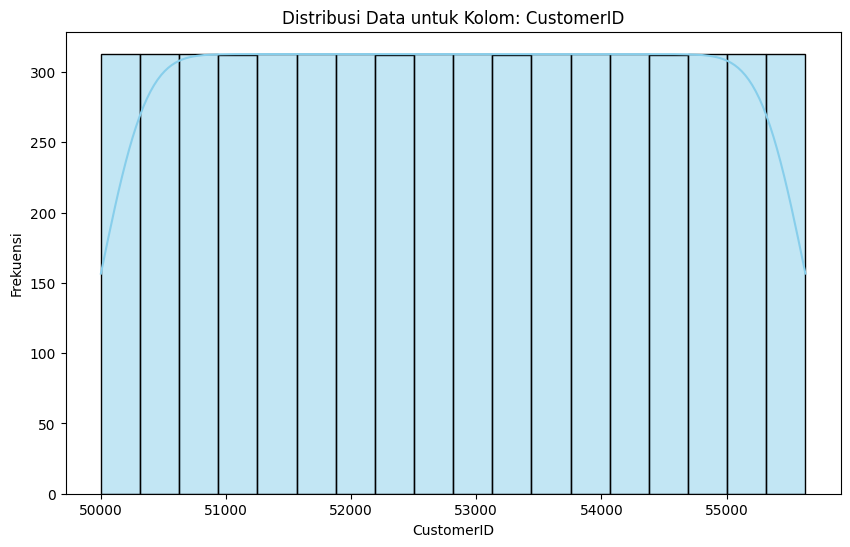

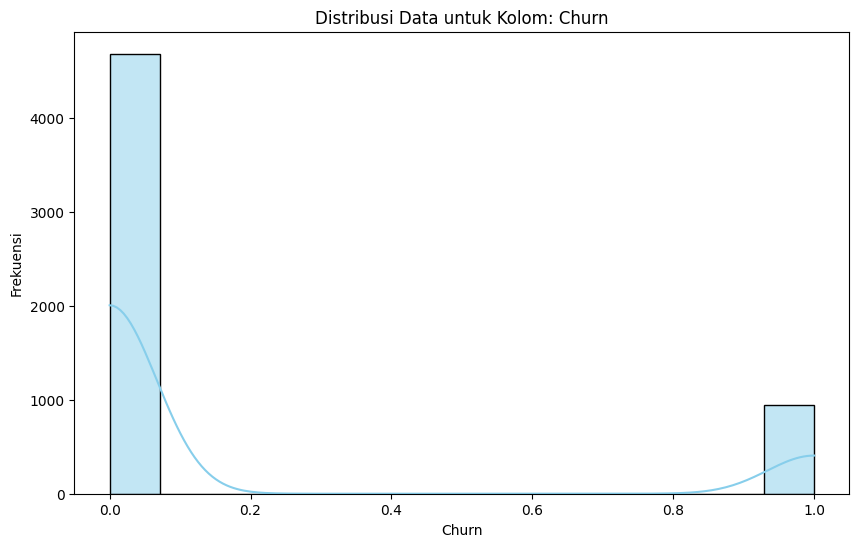

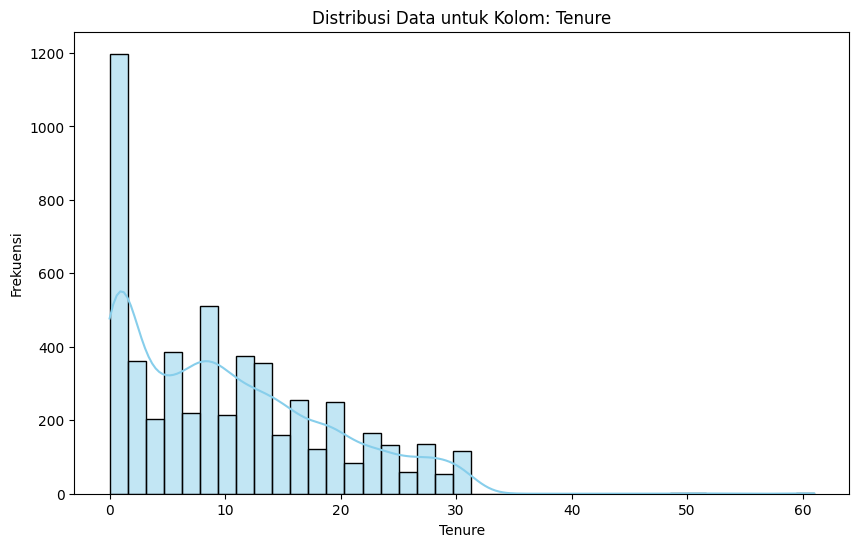

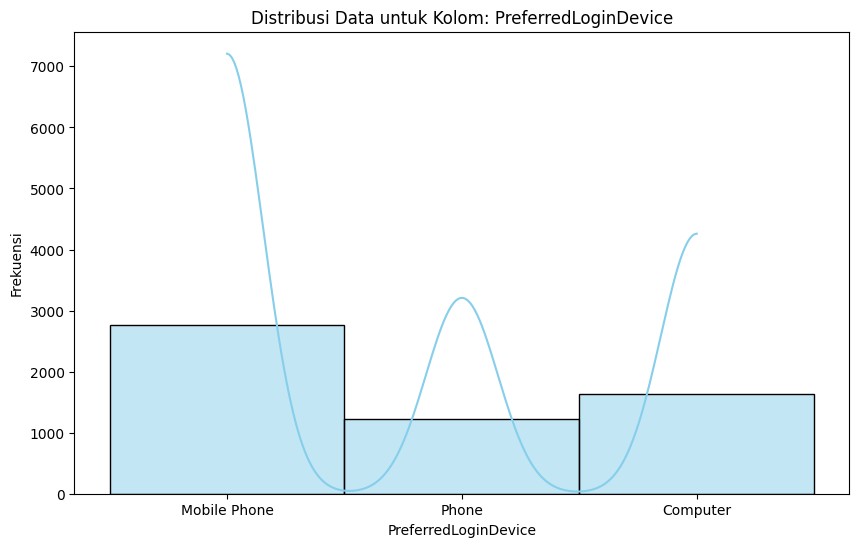

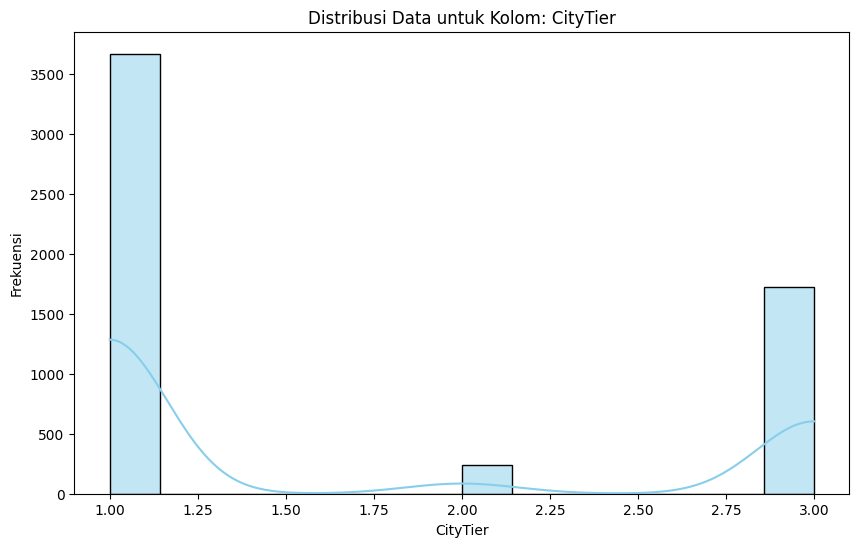

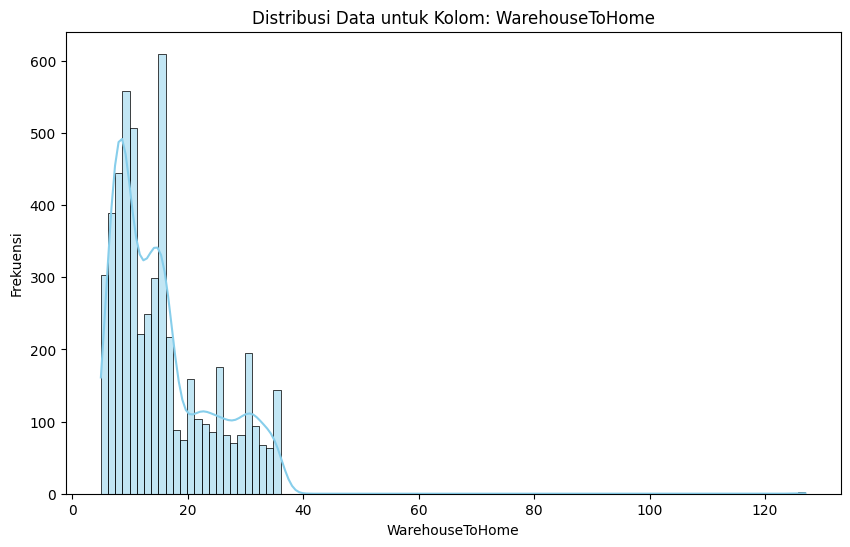

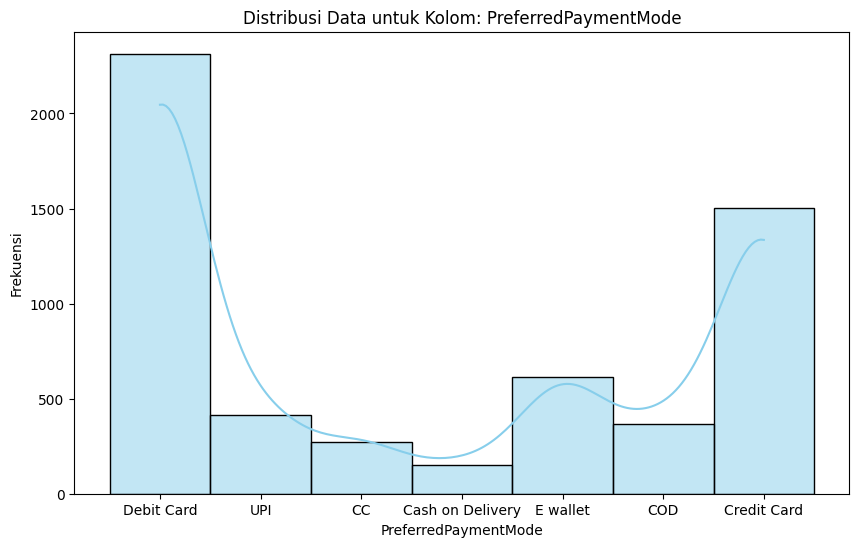

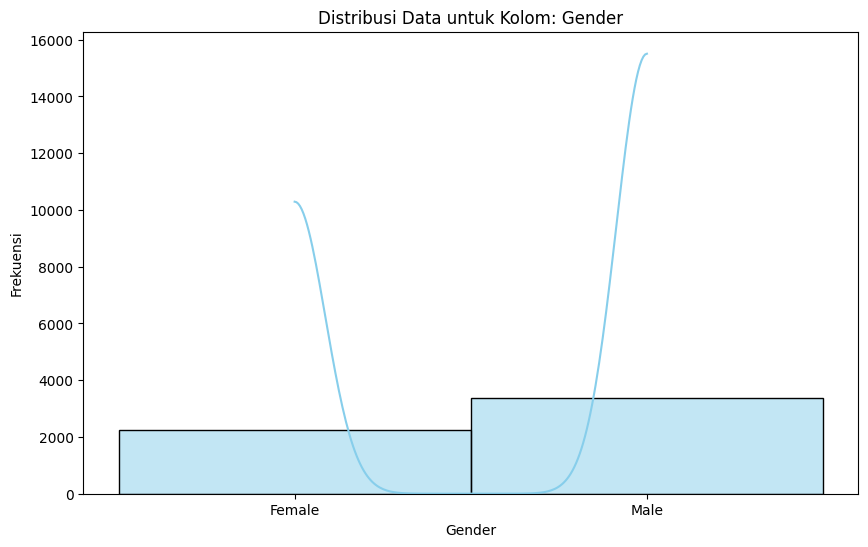

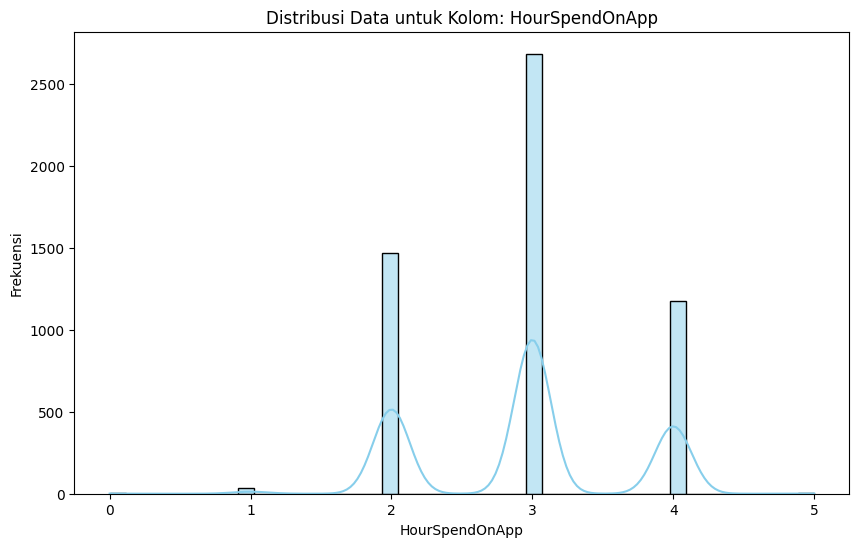

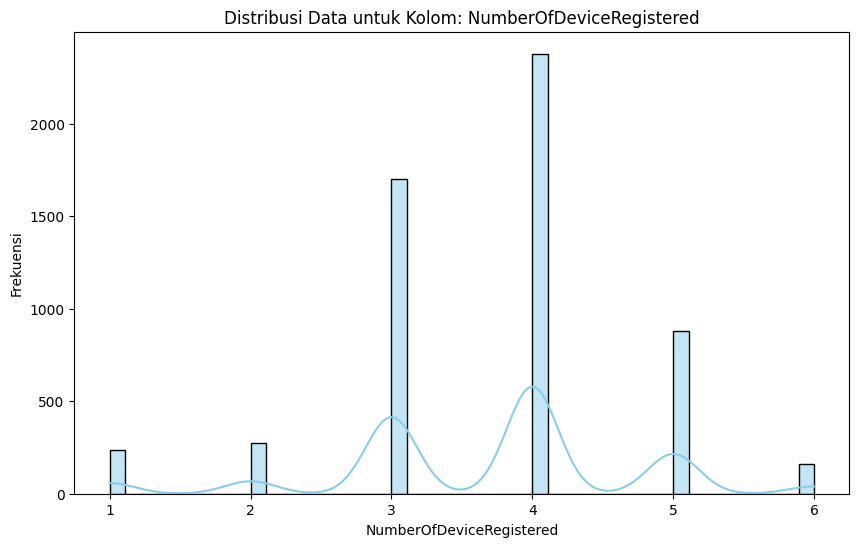

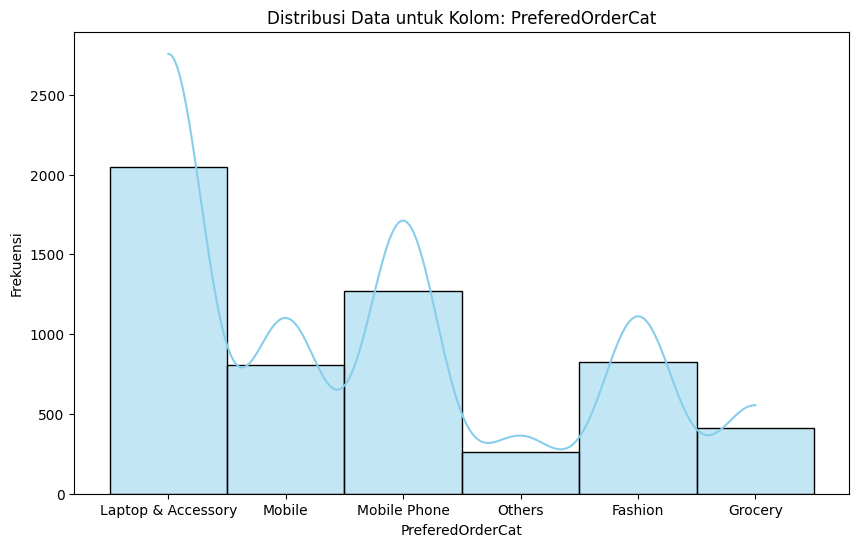

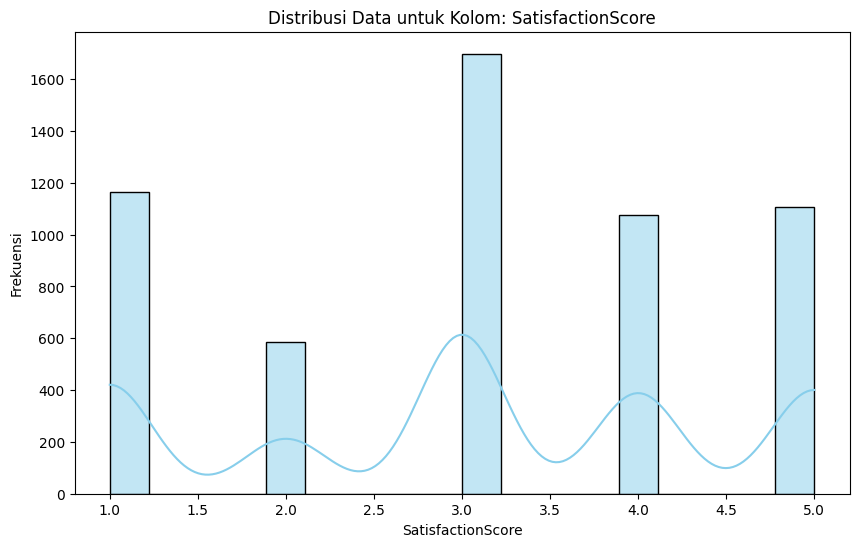

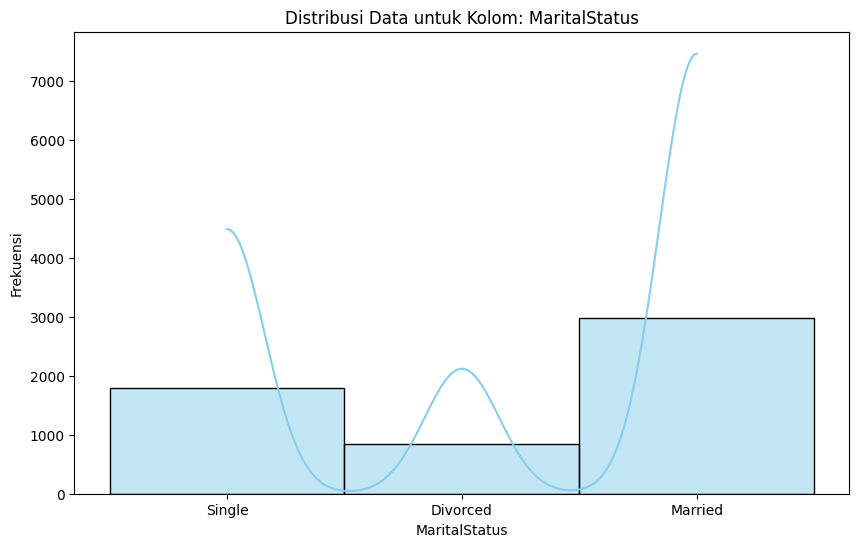

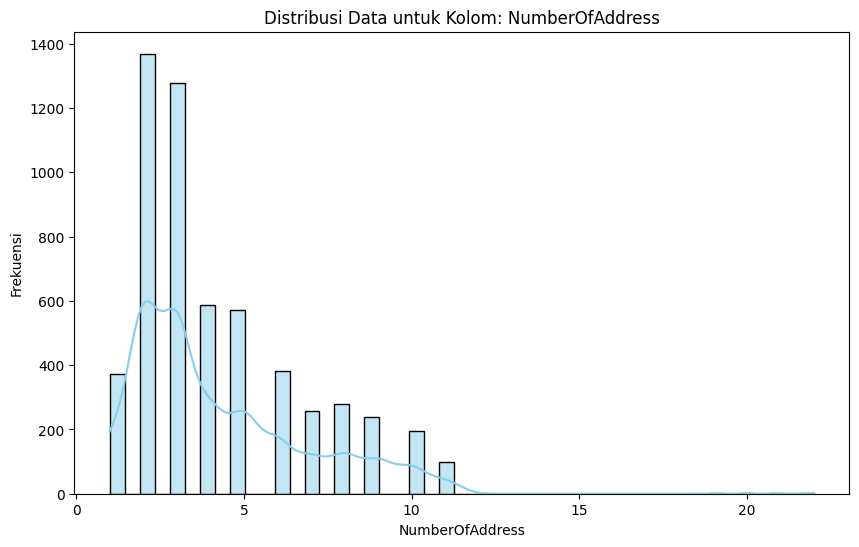

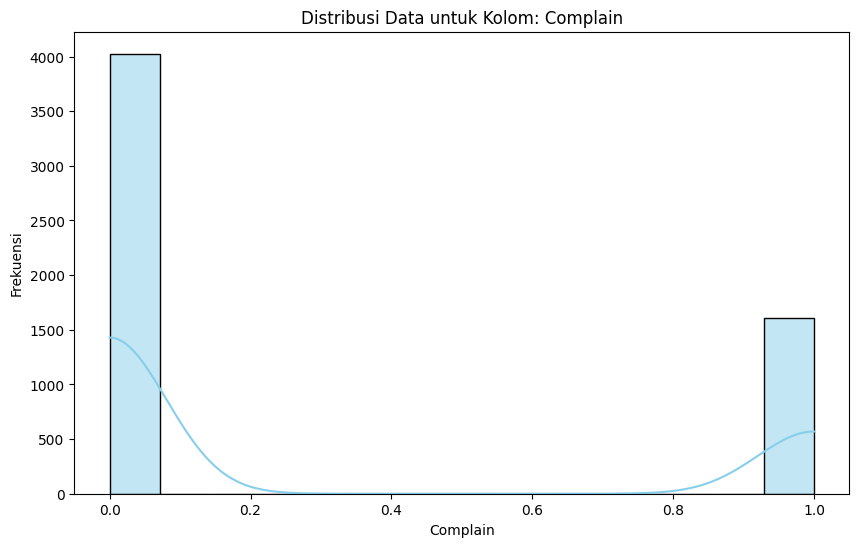

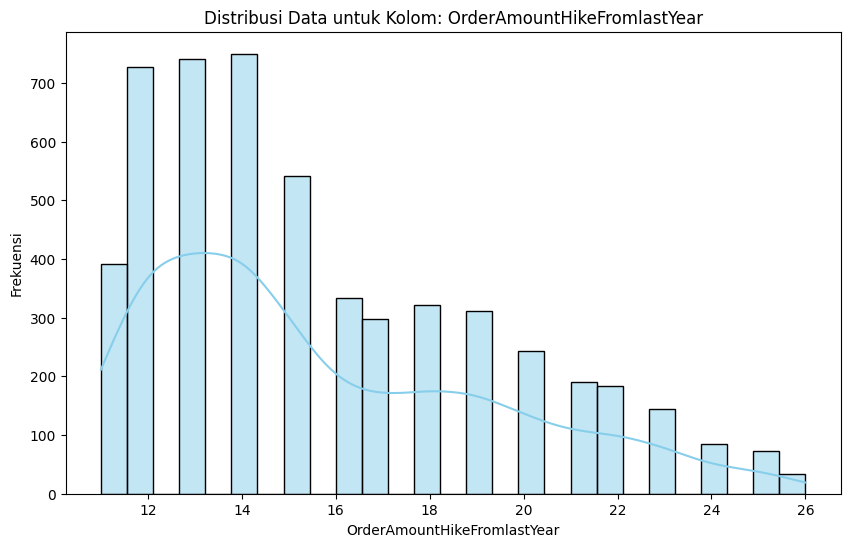

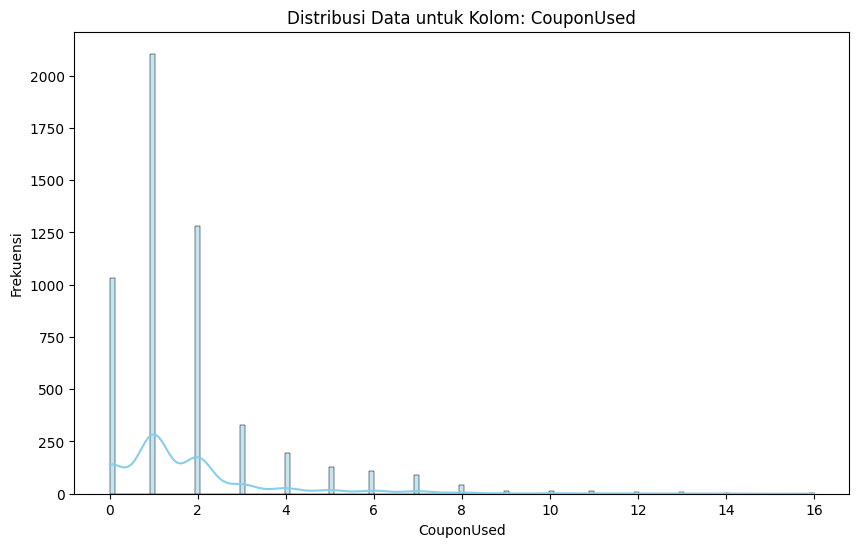

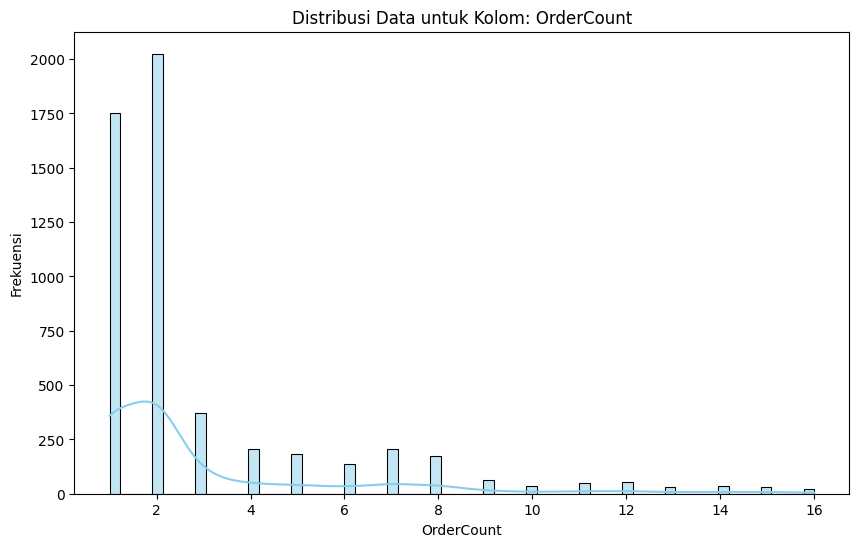

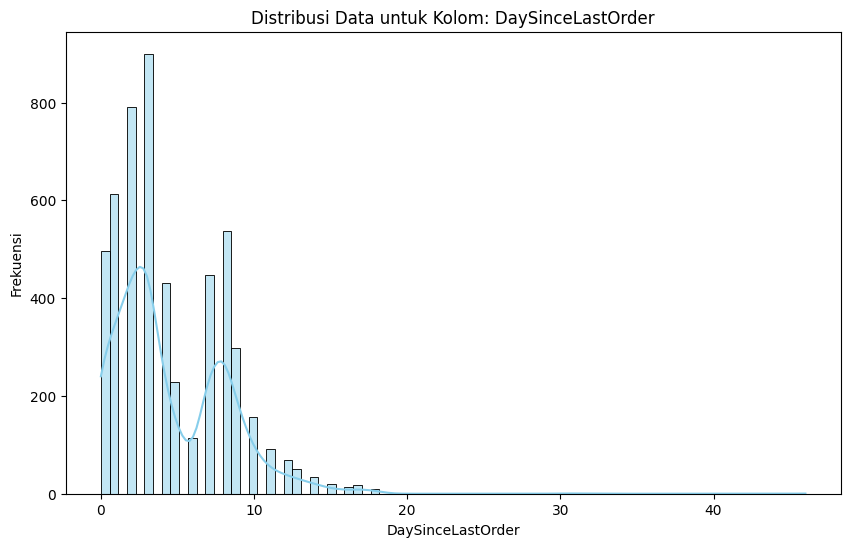

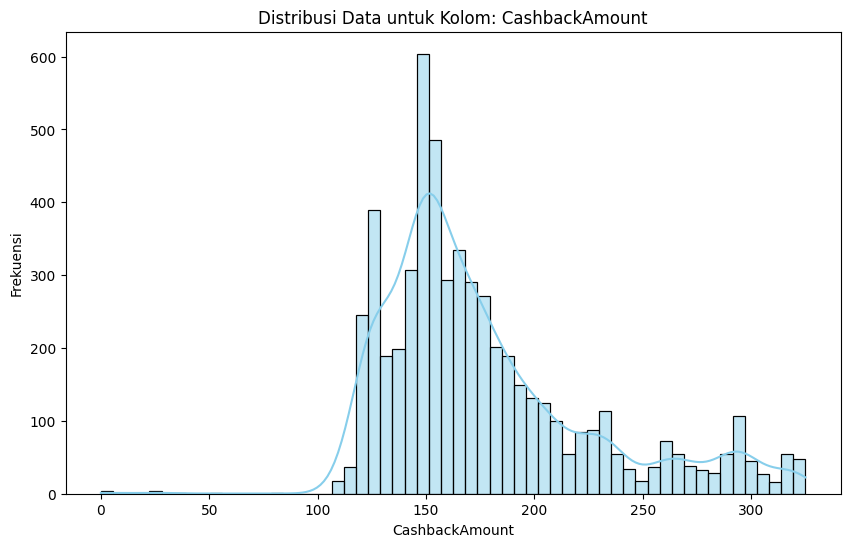

In [373]:
for column in data:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribusi Data untuk Kolom: {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()

**Memeriksa Outlier**

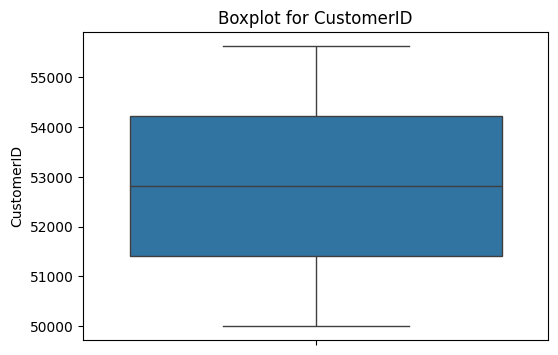

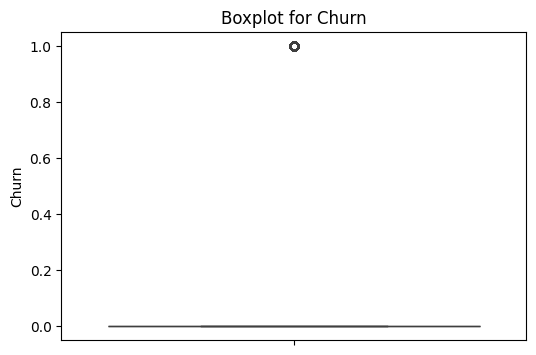

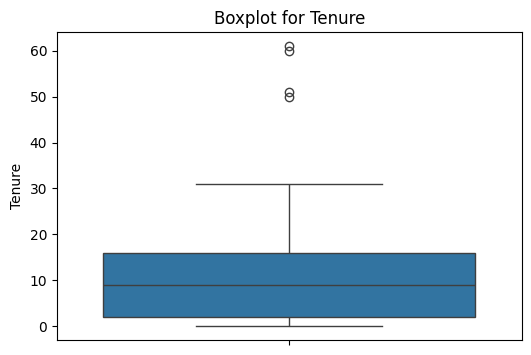

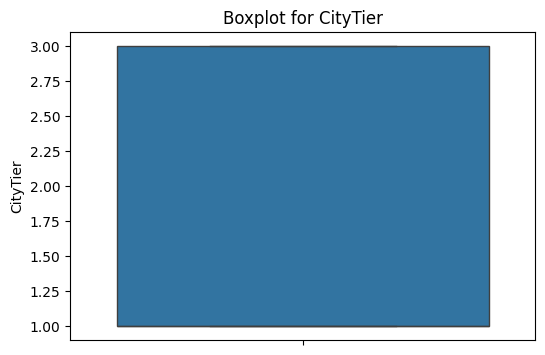

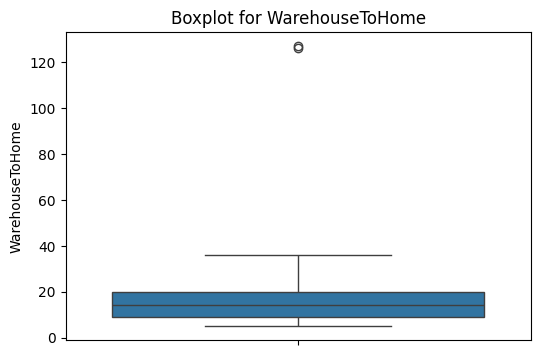

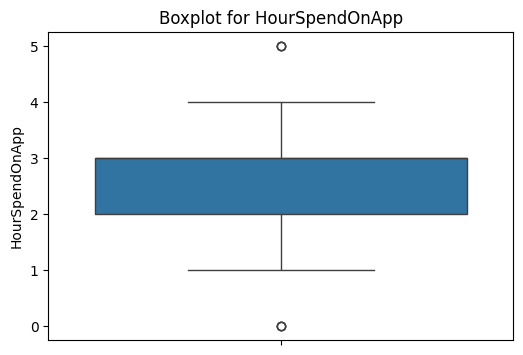

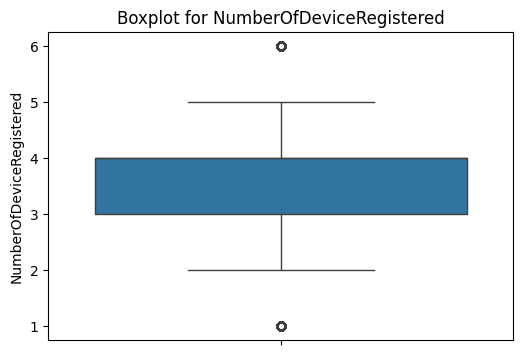

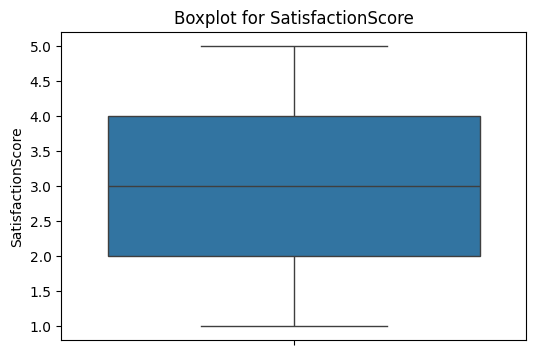

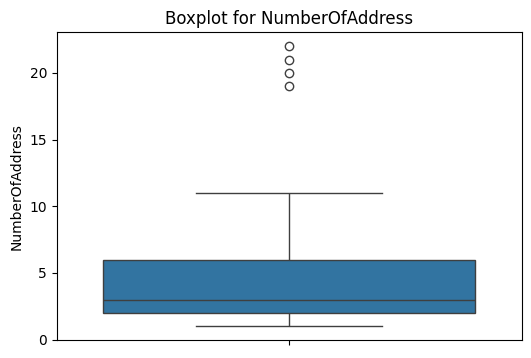

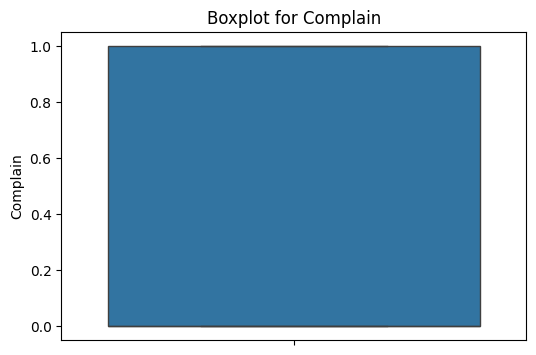

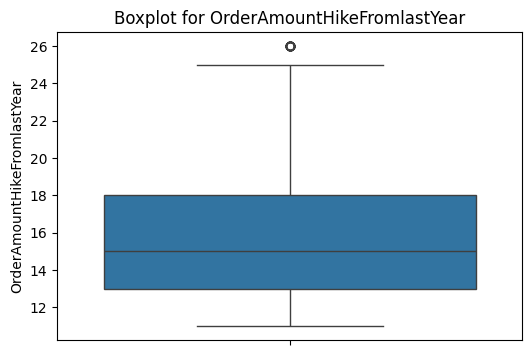

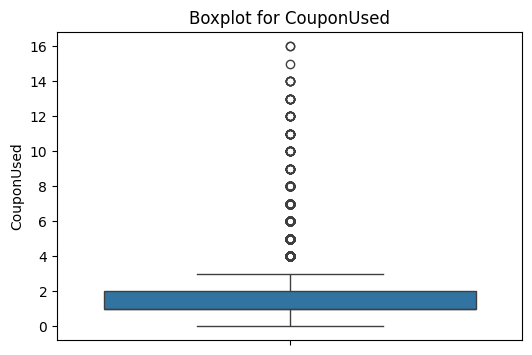

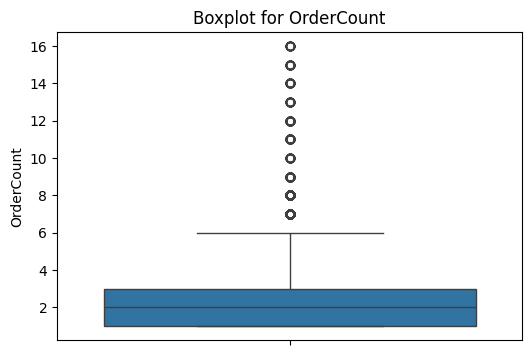

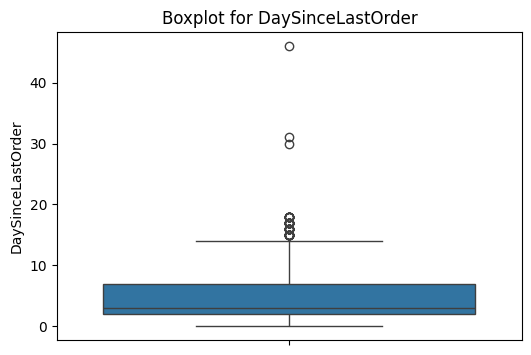

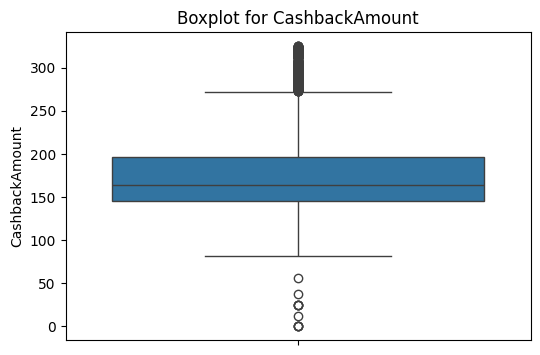

In [374]:
# Membuat boxplot untuk setiap kolom
for column in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize = (6, 4))
    sns.boxplot(y = data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

### **5. DATA CLEANING**

**Melihat Data**

In [375]:
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

dataDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dataDesc

dataFeatures dataType  null  nullPct  unique  \
0                    CustomerID    int64     0     0.00    5630   
1                         Churn    int64     0     0.00       2   
2                        Tenure  float64   264     4.69      36   
3          PreferredLoginDevice   object     0     0.00       3   
4                      CityTier    int64     0     0.00       3   
5               WarehouseToHome  float64   251     4.46      34   
6          PreferredPaymentMode   object     0     0.00       7   
7                        Gender   object     0     0.00       2   
8                HourSpendOnApp  float64   255     4.53       6   
9      NumberOfDeviceRegistered    int64     0     0.00       6   
10             PreferedOrderCat   object     0     0.00       6   
11            SatisfactionScore    int64     0     0.00       5   
12                MaritalStatus   object     0     0.00       3   
13              NumberOfAddress    int64     0     0.00      15   
14                     Complain    int64     0     0.00       2   
15  OrderAmountHikeFromlastYear  float64   265     4.71      16   
16                   CouponUsed  float64   256     4.55      17   
17                   OrderCount  float64   258     4.58      16   
18            DaySinceLastOrder  float64   307     5.45      22   
19               CashbackAmount  float64     0     0.00    2586   

             uniqueSample  
0          [52097, 54286]  
1                  [1, 0]  
2             [6.0, 30.0]  
3   [Phone, Mobile Phone]  
4                  [2, 1]  
5            [17.0, 19.0]  
6      [Credit Card, UPI]  
7          [Female, Male]  
8              [nan, 1.0]  
9                  [2, 5]  
10      [Grocery, Mobile]  
11                 [3, 4]  
12     [Divorced, Single]  
13                [6, 10]  
14                 [0, 1]  
15           [25.0, 12.0]  
16            [1.0, 13.0]  
17            [16.0, 7.0]  
18             [nan, 7.0]  
19       [256.91, 191.51]

**Menghapus Kolom `CustomerID`**

In [376]:
data.drop(['CustomerID'],axis=1, inplace=True)

**Validasi Kolom `CustomerID` pada DataFrame**

In [377]:
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

dataDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dataDesc

dataFeatures dataType  null  nullPct  unique  \
0                         Churn    int64     0     0.00       2   
1                        Tenure  float64   264     4.69      36   
2          PreferredLoginDevice   object     0     0.00       3   
3                      CityTier    int64     0     0.00       3   
4               WarehouseToHome  float64   251     4.46      34   
5          PreferredPaymentMode   object     0     0.00       7   
6                        Gender   object     0     0.00       2   
7                HourSpendOnApp  float64   255     4.53       6   
8      NumberOfDeviceRegistered    int64     0     0.00       6   
9              PreferedOrderCat   object     0     0.00       6   
10            SatisfactionScore    int64     0     0.00       5   
11                MaritalStatus   object     0     0.00       3   
12              NumberOfAddress    int64     0     0.00      15   
13                     Complain    int64     0     0.00       2   
14  OrderAmountHikeFromlastYear  float64   265     4.71      16   
15                   CouponUsed  float64   256     4.55      17   
16                   OrderCount  float64   258     4.58      16   
17            DaySinceLastOrder  float64   307     5.45      22   
18               CashbackAmount  float64     0     0.00    2586   

              uniqueSample  
0                   [0, 1]  
1              [12.0, 7.0]  
2    [Mobile Phone, Phone]  
3                   [2, 3]  
4            [35.0, 126.0]  
5   [Debit Card, E wallet]  
6           [Male, Female]  
7               [4.0, 5.0]  
8                   [5, 2]  
9        [Mobile, Grocery]  
10                  [3, 4]  
11     [Married, Divorced]  
12                [11, 10]  
13                  [0, 1]  
14            [19.0, 14.0]  
15             [0.0, 14.0]  
16             [15.0, nan]  
17             [0.0, 14.0]  
18        [288.07, 147.59]

**Melihat Features Kategorik**

In [378]:
categorical_features = [feature for feature in data.columns if (data[feature].dtypes == 'O')]
categorical_features

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

**Melihat Features Numerik**

In [379]:
numerical_features = [feature for feature in data.columns if ((data[feature].dtypes != 'O') & (feature not in ['Churn']))]
numerical_features

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

**Memeriksa `Unique Value` pada Feature Kategorik**

In [380]:
for i in categorical_features:
    print(f'Total unique values in {i}: ', data[i].nunique())
    print(f'Unique values: ', data[i].unique())
    print()

Total unique values in PreferredLoginDevice:  3
Unique values:  ['Mobile Phone' 'Phone' 'Computer']

Total unique values in PreferredPaymentMode:  7
Unique values:  ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Total unique values in Gender:  2
Unique values:  ['Female' 'Male']

Total unique values in PreferedOrderCat:  6
Unique values:  ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

Total unique values in MaritalStatus:  3
Unique values:  ['Single' 'Divorced' 'Married']



**Replace Value yang teridentifikasi sama namun penulisan yang berbeda**

In [381]:
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})
data['PreferedOrderCat'] = data['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace({'CC':'Credit Card'})
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace({'COD':'Cash on Delivery'})

**Validasi `Replace` pada Features Kategorik**

In [382]:
for i in categorical_features:
    print(f'Total unique values in {i}: ', data[i].nunique())
    print(f'Unique values: ', data[i].unique())
    print()

Total unique values in PreferredLoginDevice:  2
Unique values:  ['Mobile Phone' 'Computer']

Total unique values in PreferredPaymentMode:  5
Unique values:  ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']

Total unique values in Gender:  2
Unique values:  ['Female' 'Male']

Total unique values in PreferedOrderCat:  5
Unique values:  ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

Total unique values in MaritalStatus:  3
Unique values:  ['Single' 'Divorced' 'Married']



**Bar Plot**

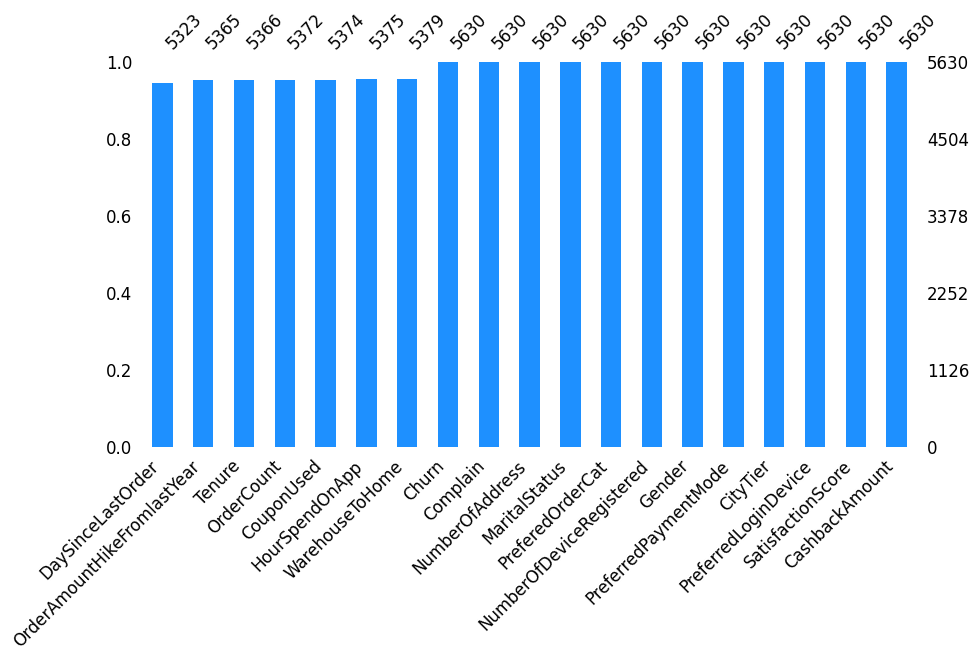

In [383]:
msno.bar(data,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

|**Kesimpulan berdasarkan Barplot `Missing Value` pada Dataset**|
|----|
|1. Total Data: Dataset seharusnya memiliki 5630 entri untuk setiap variabel.|
|2. Variabel dengan Missing Value (7 kolom):
   - DaySinceLastOrder: 407 missing (5630 - 5223)
   - OrderAmountHikeFromlastYear: 265 missing (5630 - 5365)
   - Tenure: 264 missing (5630 - 5366)
   - OrderCount: 258 missing (5630 - 5372)
   - CouponUsed: 256 missing (5630 - 5374)
   - HourSpendOnApp: 255 missing (5630 - 5375)
   - WarehouseToHome: 251 missing (5630 - 5379)|
|3. Variabel Lengkap: Sebagian besar variabel lainnya memiliki data lengkap (5630 entri).|
|4. Tingkat Missing Value: Berkisar antara 4.5% (WarehouseToHome) hingga 7.2% (DaySinceLastOrder).|


|**Berdasarkan matrix `Missing Value` yang ditampilkan**|
|-----|
|Tidak terlihat pola yang jelas atau sistematis dalam missing value.|
|Missing value tersebar secara acak di berbagai kolom, tanpa konsentrasi yang signifikan pada baris atau kolom tertentu.|

In [384]:
# Mendapatkan kolom yang memiliki missing value
missing_data_columns = data.columns[data.isnull().any()]

# Menampilkan kolom yang memiliki missing value beserta tipe datanya
missing_data_info = data[missing_data_columns].dtypes

# Print hasil
print("Kolom dengan Missing Values dan Tipe Datanya:")
print(missing_data_info)


Kolom dengan Missing Values dan Tipe Datanya:
Tenure                         float64
WarehouseToHome                float64
HourSpendOnApp                 float64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
dtype: object


**Memeriksa `Unique Value` pada Features yang memiliki `Missing Value`**

In [385]:
for i in missing_data_columns:
    print(f'Total unique values in {i}: ', data[i].nunique())
    print(f'Unique values: ', data[i].unique())
    print()

Total unique values in Tenure:  36
Unique values:  [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]

Total unique values in WarehouseToHome:  34
Unique values:  [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]

Total unique values in HourSpendOnApp:  6
Unique values:  [ 3.  2. nan  1.  0.  4.  5.]

Total unique values in OrderAmountHikeFromlastYear:  16
Unique values:  [11. 15. 14. 23. 22. 16. 12. nan 13. 17. 18. 24. 19. 20. 21. 25. 26.]

Total unique values in CouponUsed:  17
Unique values:  [ 1.  0.  4.  2.  9.  6. 11. nan  7. 12. 10.  5.  3. 13. 15.  8. 14. 16.]

Total unique values in OrderCount:  16
Unique values:  [ 1.  6.  2. 15.  4.  7.  3.  9. nan 11.  5. 12. 10.  8. 13. 14. 16.]

Total unique values in DaySinceLastOrder:  22
Unique values:  [ 5.  

**Memeriksa Distribusi data pada `Features yang memiliki Missing Value`**

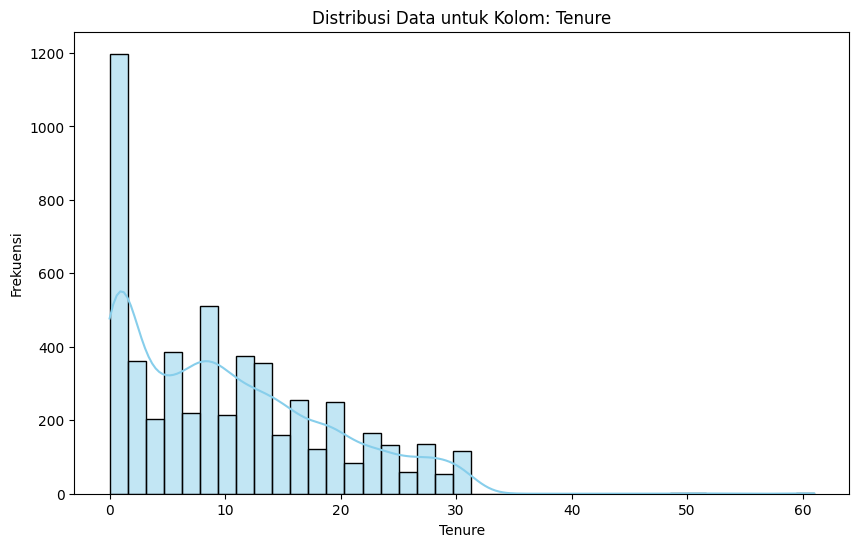

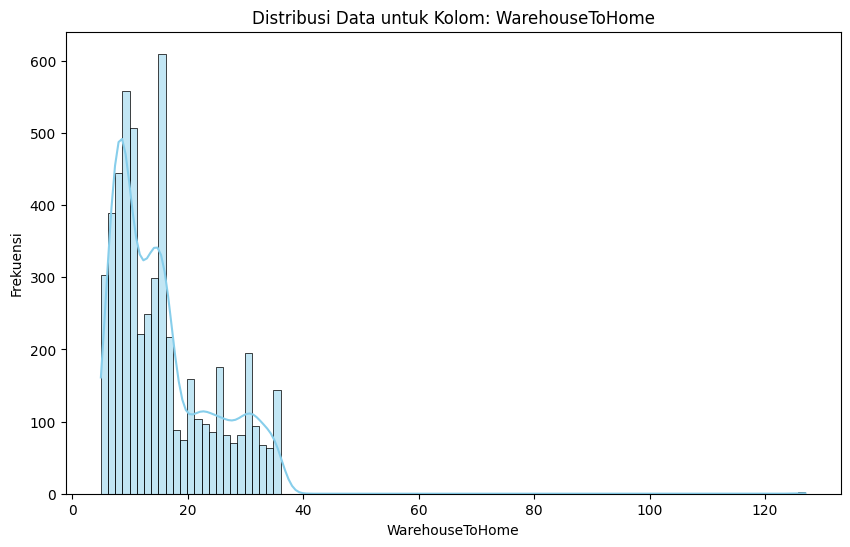

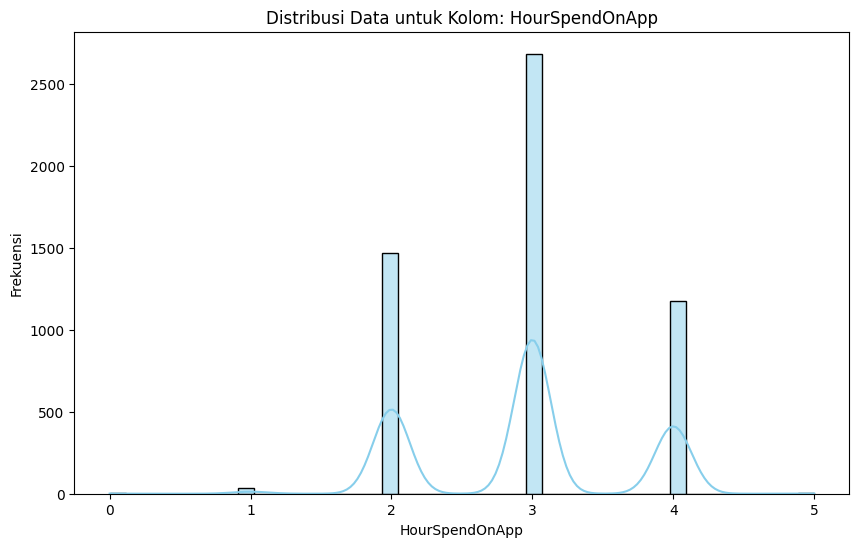

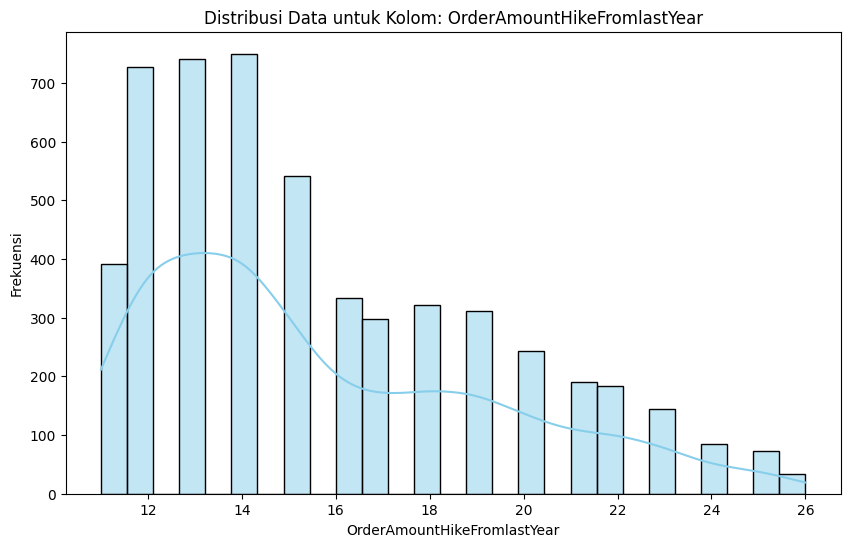

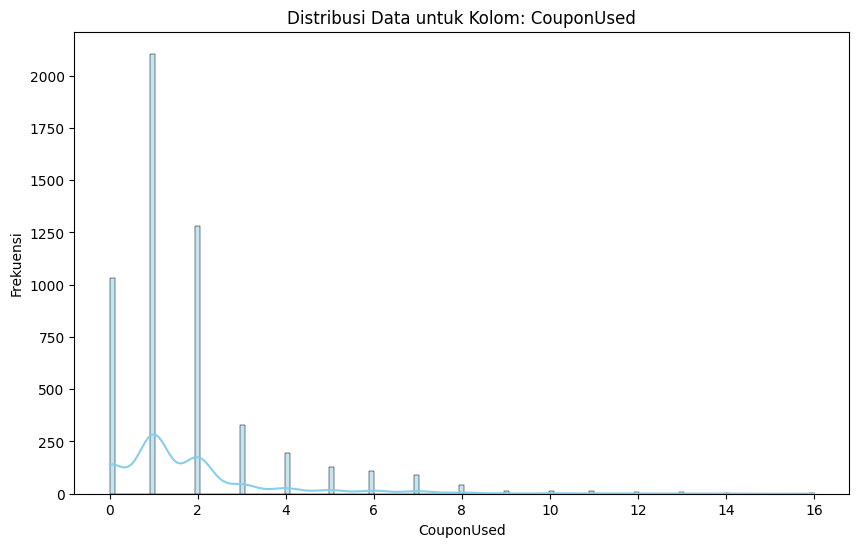

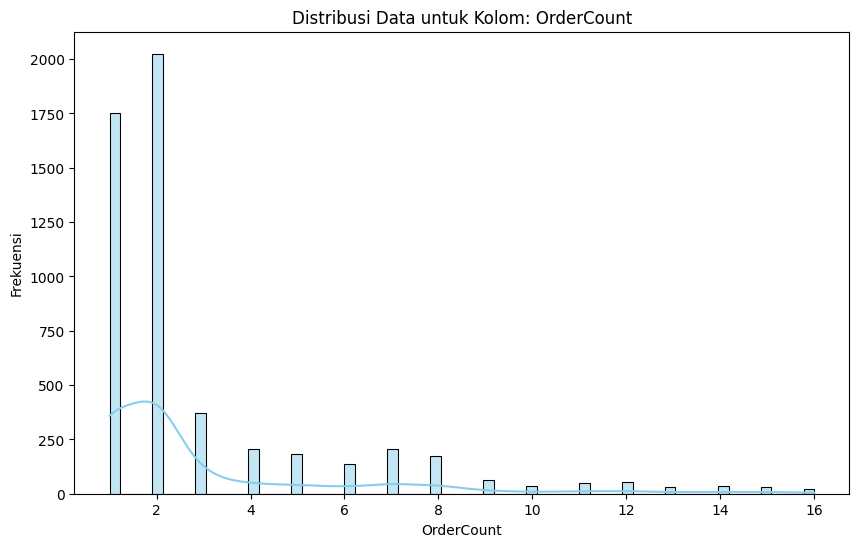

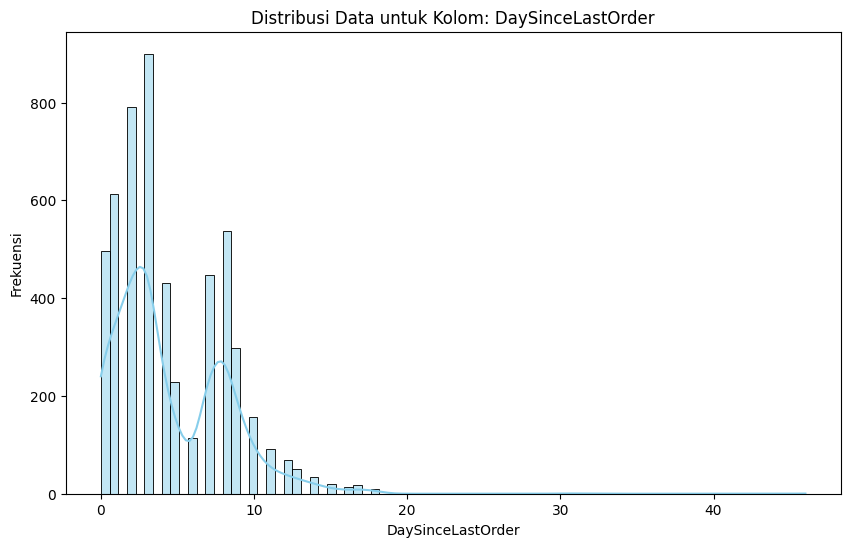

In [386]:
for column in missing_data_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribusi Data untuk Kolom: {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()


**Berdasarkan hasil visualisasi distribusi data untuk kolom yang memiliki `Missing values`:**

Variable-variabel yang memiliki `Missing Value`  menunjukkan distribusi yang skewed. Untuk data yang skewed seperti ini, menggantikan missing values dengan **median** lebih disarankan daripada mean, karena median lebih robust terhadap outliers dan mencerminkan distribusi mayoritas lebih baik.


### **6. DATA ANALYSIS**

**Load Dataset - Variable `df` untuk Analisa Dataset**

In [387]:
df = pd.read_excel('E Commerce Dataset.xlsx')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

**Melakukan `Replace` untuk Unique Value yang teridentifikasi sama namun berbeda penulisan**

In [388]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(['Phone'], ['Mobile Phone'])
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['CC', 'COD'], ['Credit Card', 'Cash on Delivery'])
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Mobile'], ['Mobile Phone'])

**Memeriksa kolom kategorik yang mempunyai variasi yang paling signifikan**

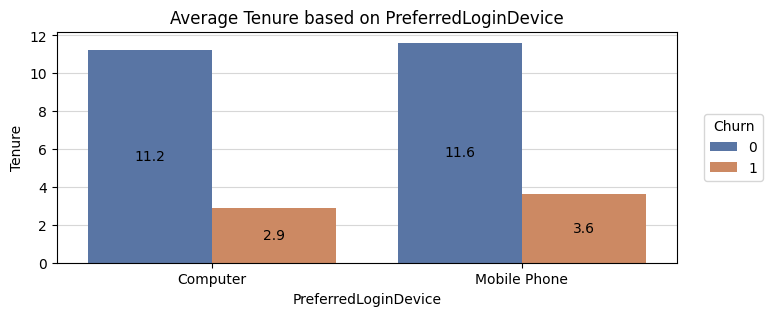

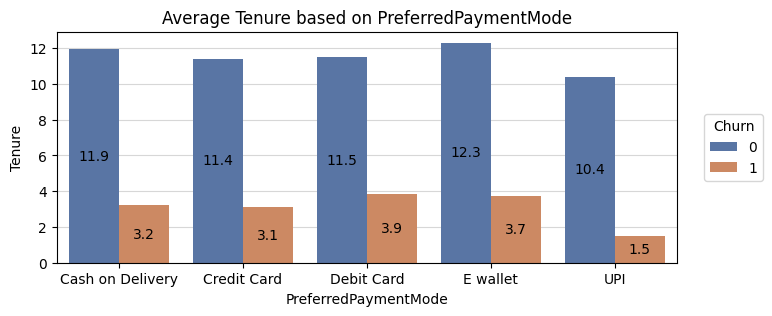

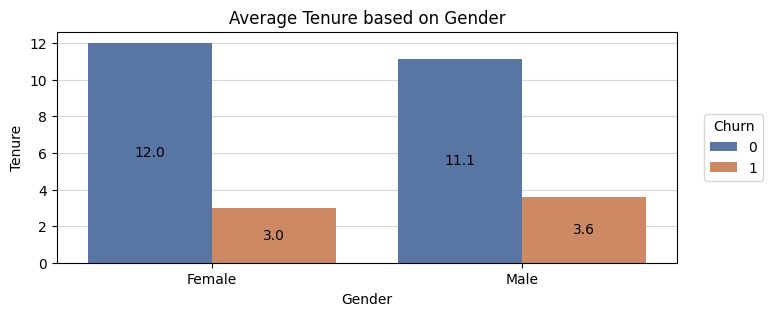

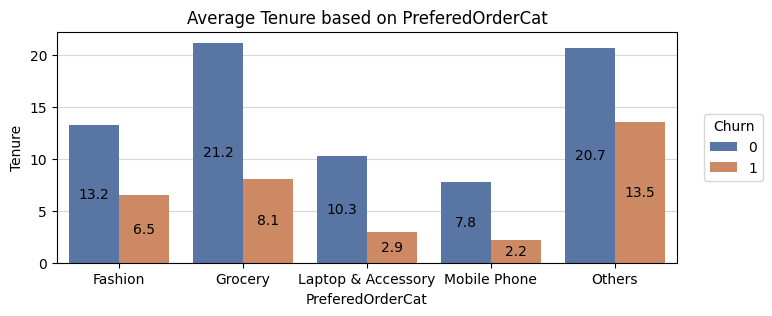

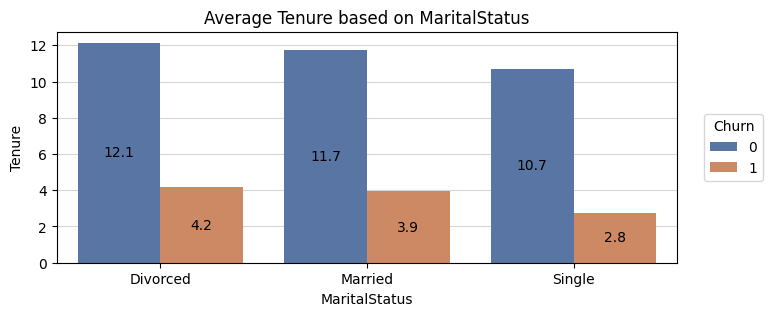

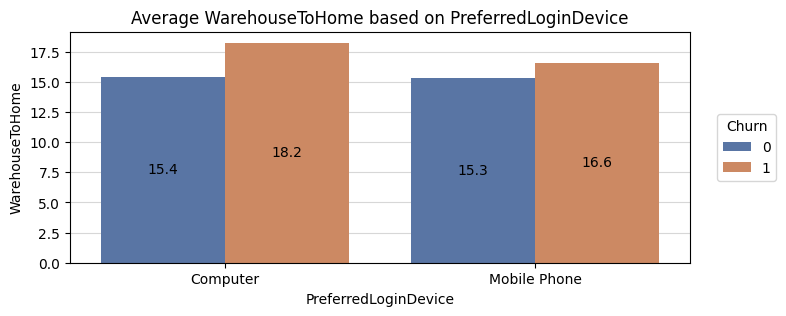

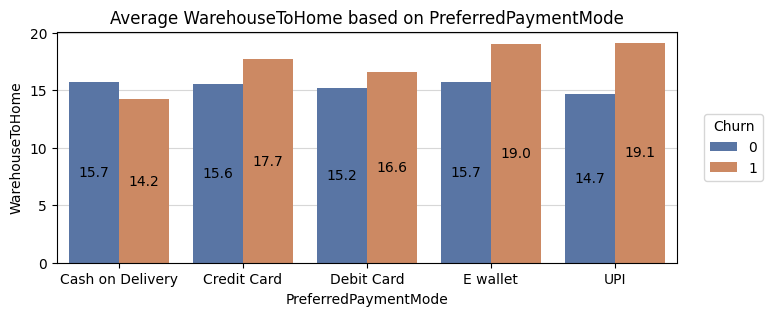

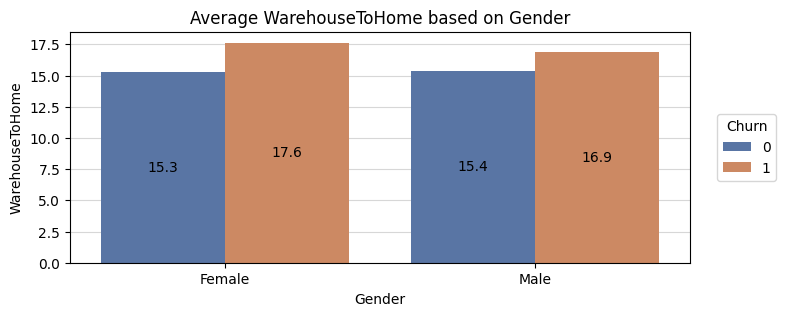

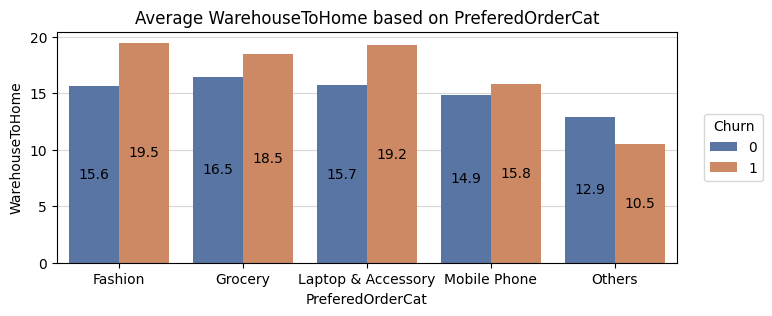

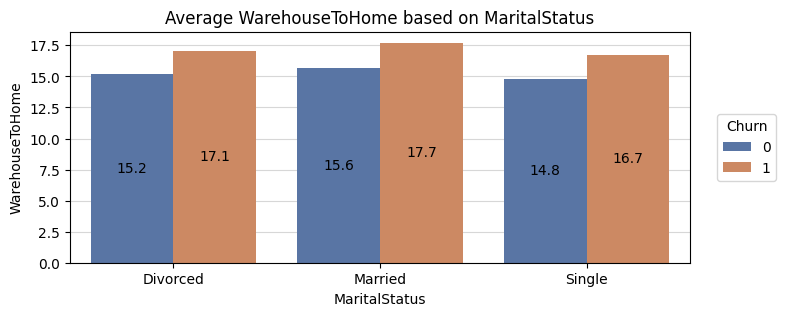

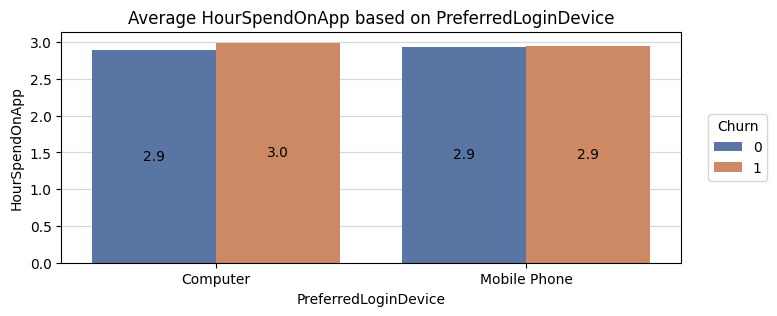

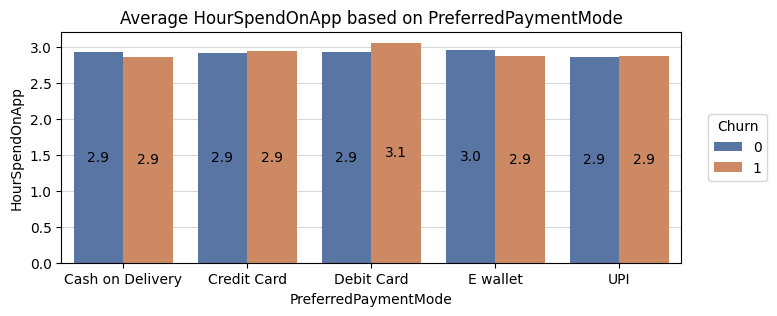

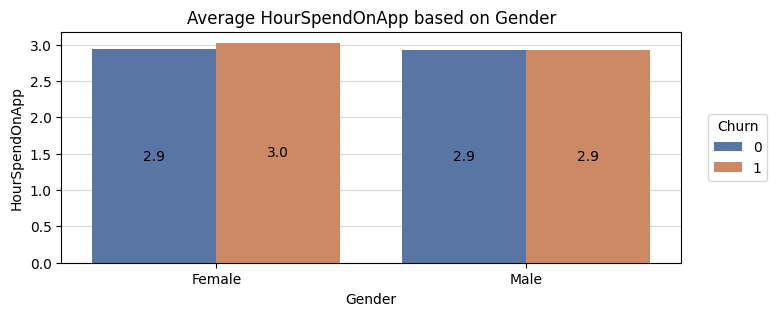

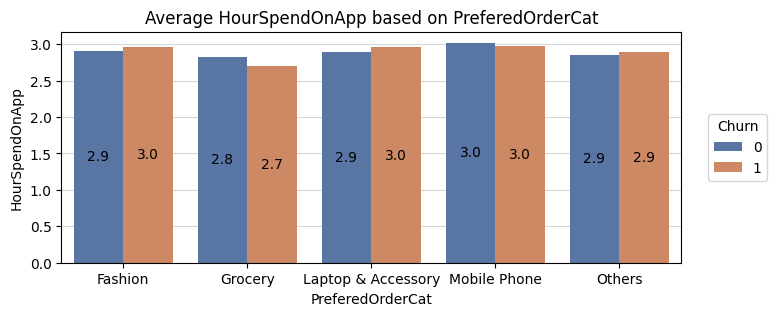

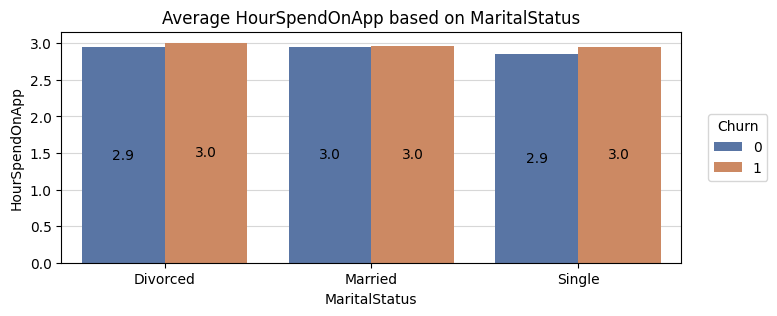

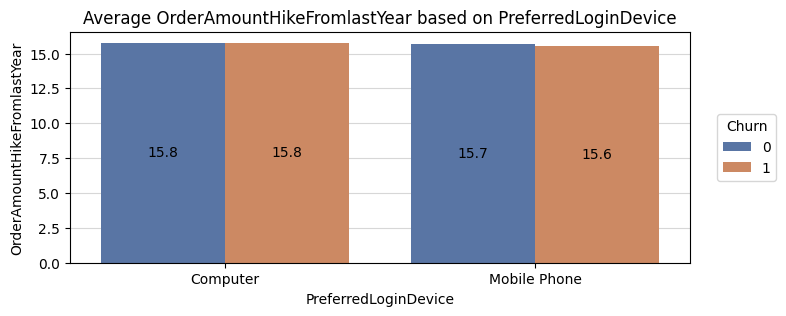

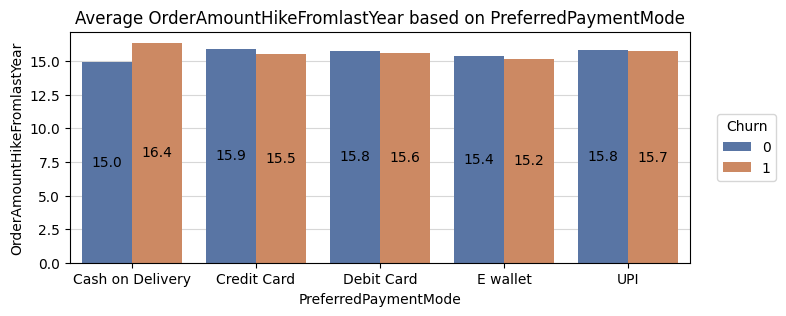

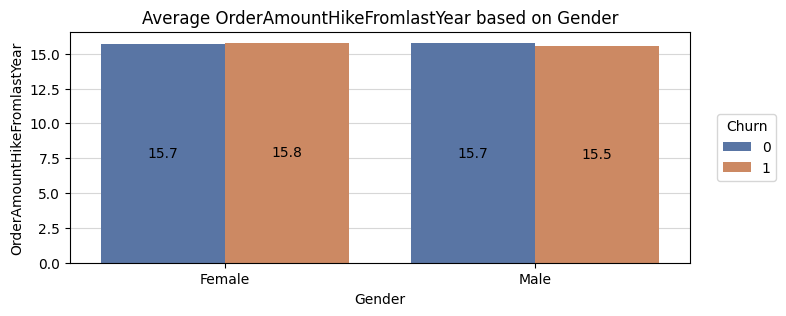

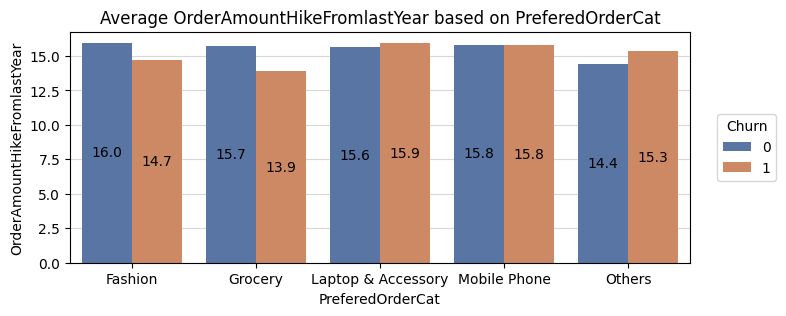

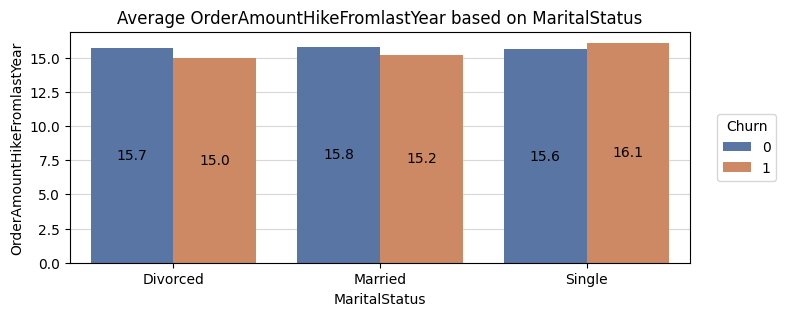

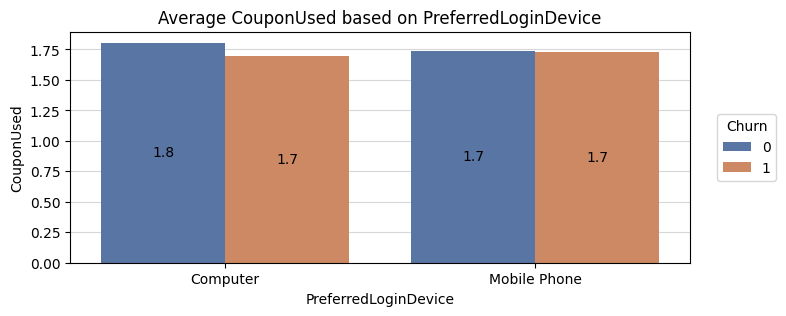

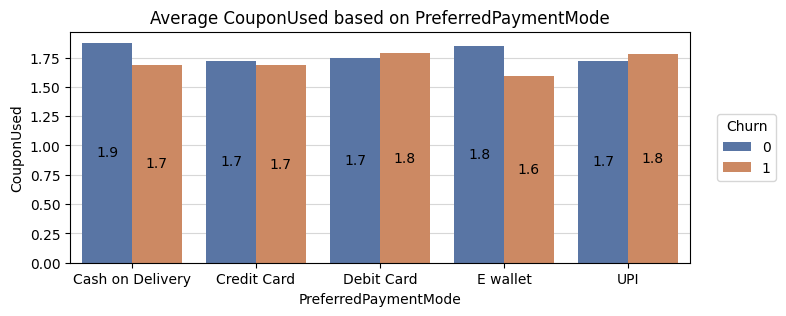

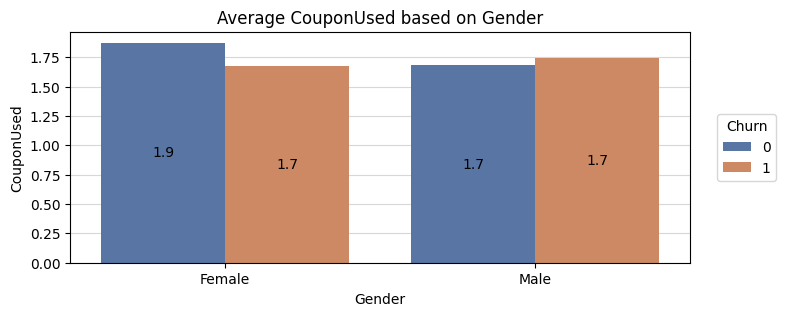

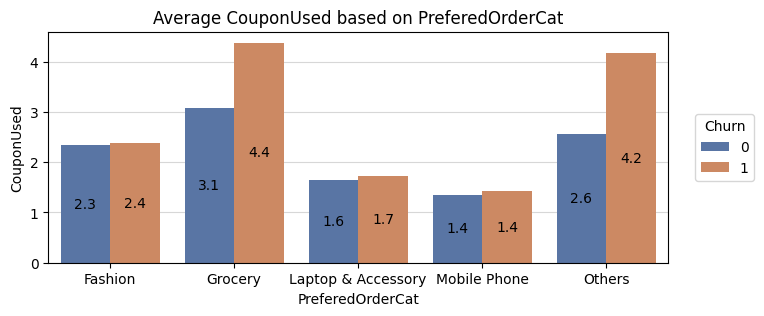

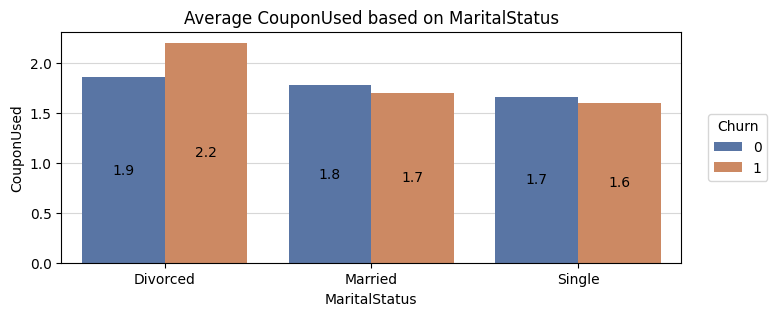

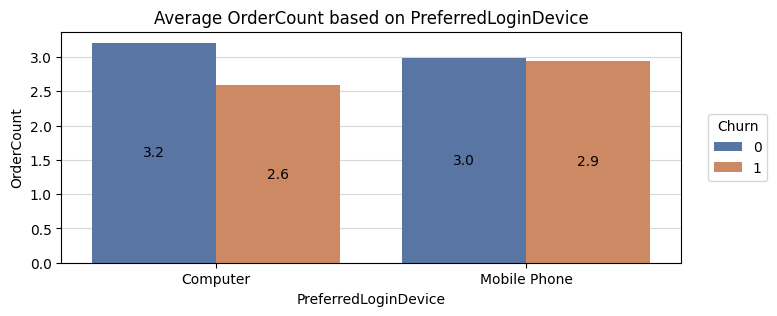

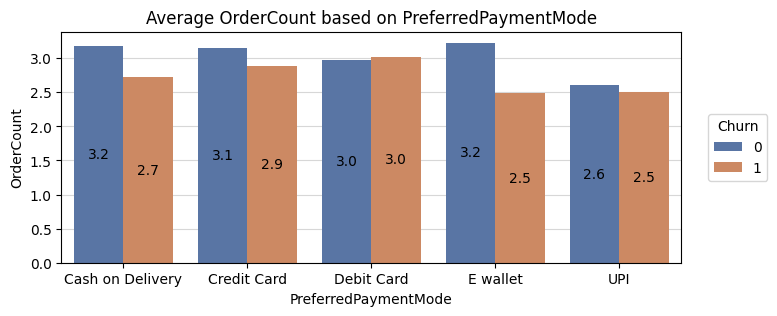

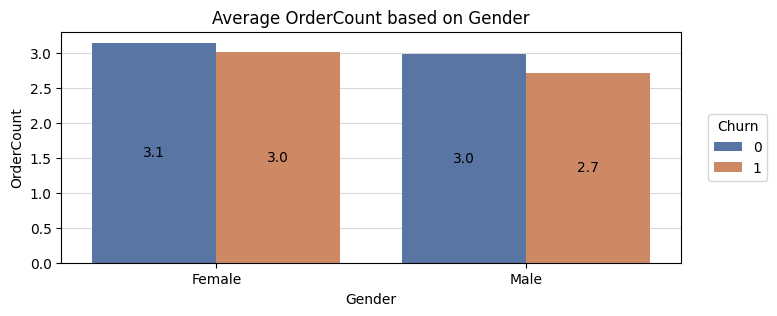

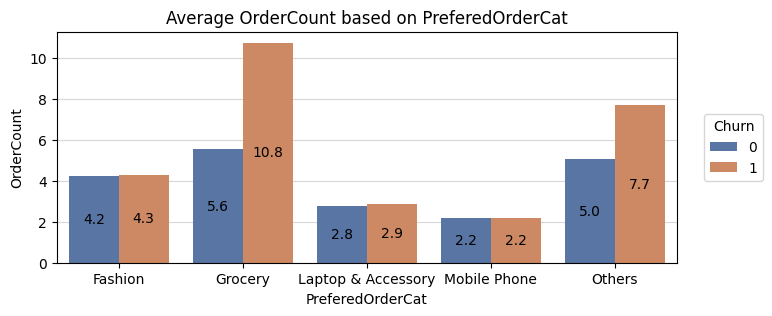

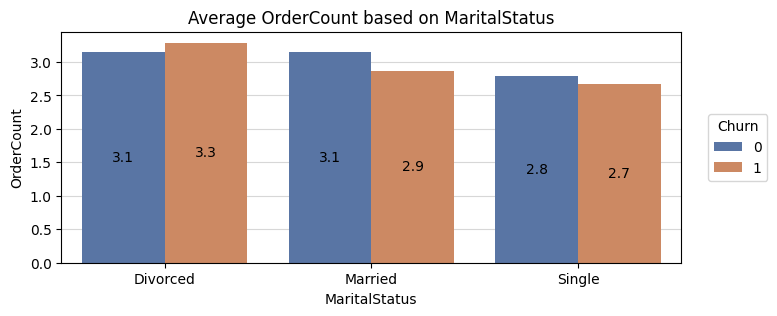

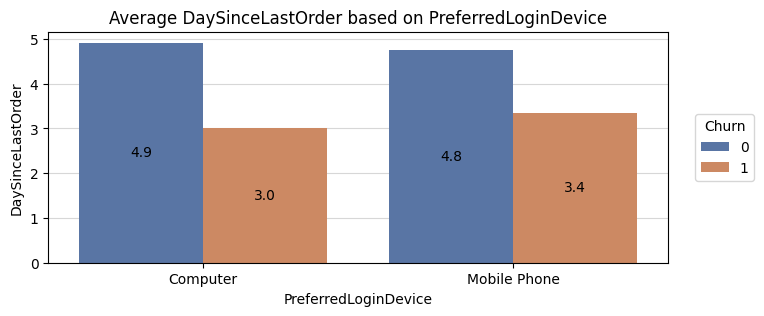

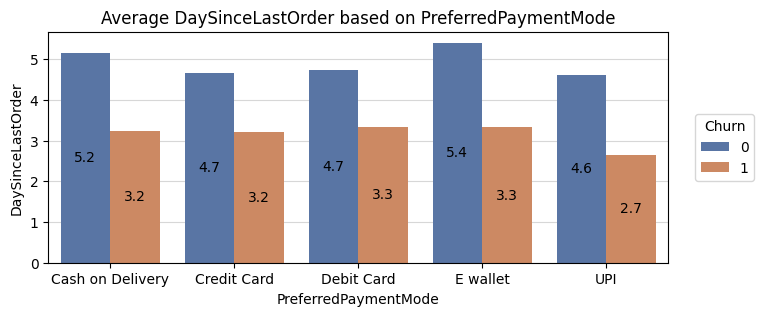

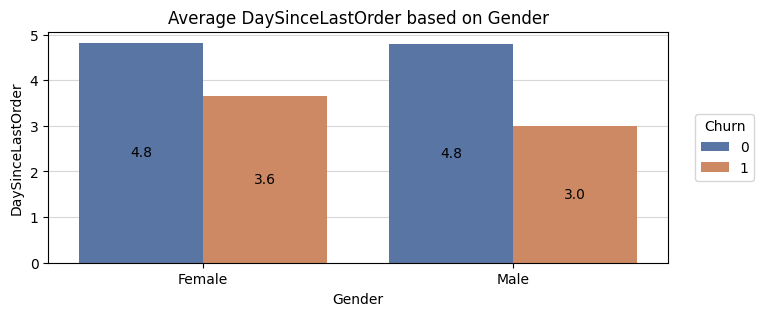

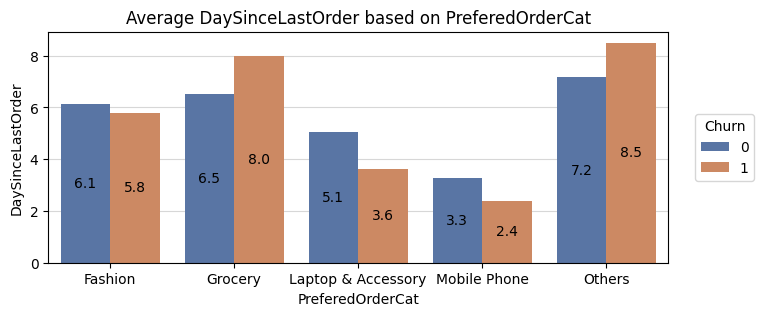

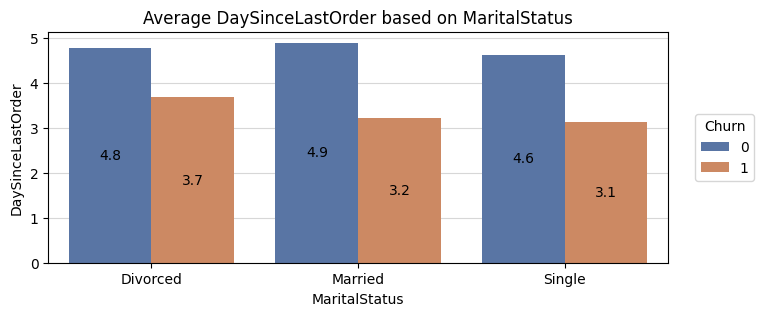

In [389]:
list_x = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
list_y = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for j in list_y:
    for i in list_x:
        plt.figure(figsize = (8, 3))
        ax = sns.barplot(data = df, x = i, y = j, hue = 'Churn', palette = 'deep', errorbar = None, order = sorted(df[i].unique()), zorder = 2)
        for container in ax.containers:
            ax.bar_label(container, fmt = '%.1f', label_type = 'center')
        plt.title(f'Average {j} based on {i}')
        plt.legend(loc = 'center right', title = 'Churn', bbox_to_anchor = (1.15, 0.5))
        plt.grid(axis = 'y', alpha = 0.5, zorder = 1)
        plt.show()

In [390]:
# mengganti missing values pada 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', dan 'DaySinceLastOrder' menjadi nilai rata-ratanya berdasarkan kategori pada 'PreferedOrderCat'

for j in list_y:
    df[j] = df[j].fillna(df.groupby('PreferedOrderCat')[j].transform('median'))

In [391]:
# mengonversi data frame menjadi csv file

df.to_csv('churn.csv', index = False)

In [392]:
# menentukan feature
X = df.drop(columns = ['Churn'])

# menentukan label
y = df['Churn']

# membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 2024)

# menggabungkan data train untuk keperluan data analysis
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)


#### **6.1. Correlation Matrix**

**Menampilkan matriks korelasi antar fitur numerik**

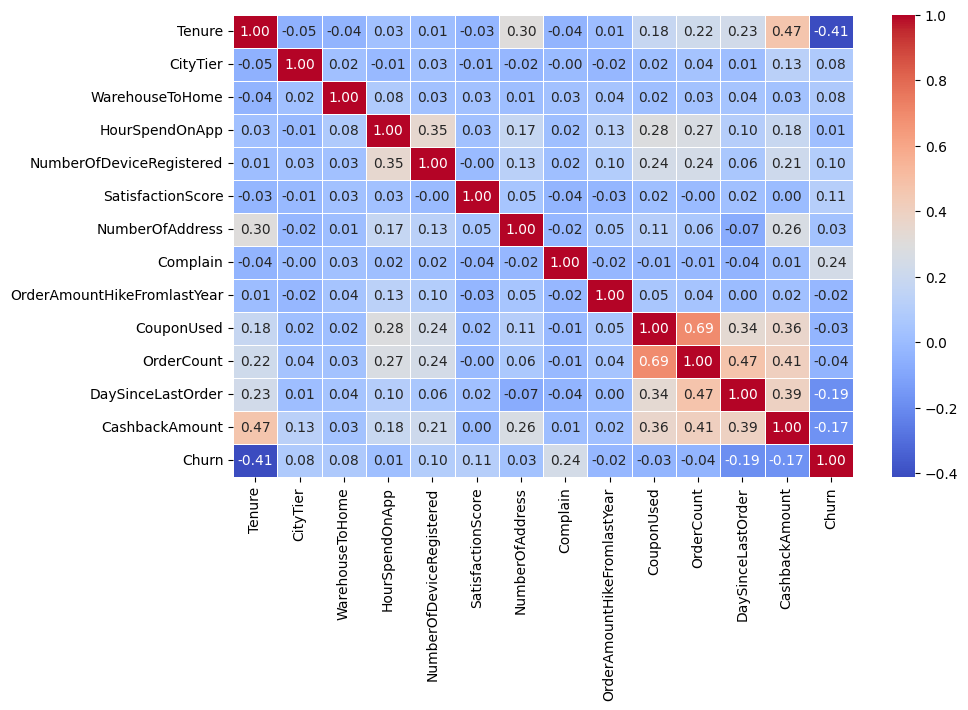

In [393]:
plt.figure(figsize = (10, 6))
sns.heatmap(df_train.drop(columns = ['CustomerID']).select_dtypes(include = 'number').corr(method = 'spearman'), annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.5)
plt.show()

#### **6.2. Average ChurnRate**

In [394]:
list_nobin = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']
list_bin = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
df_train['ChurnRate'] = df_train['Churn'] * 100

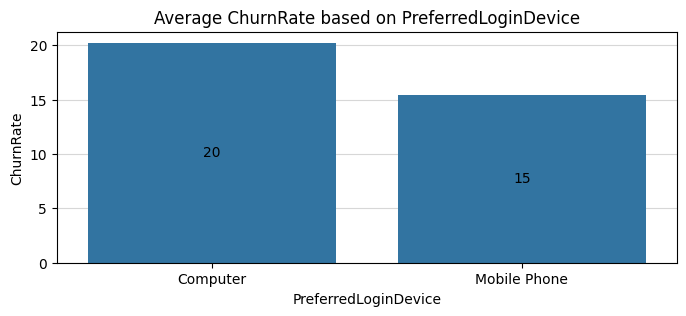

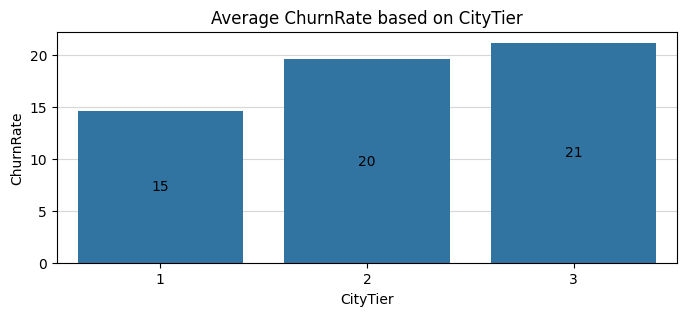

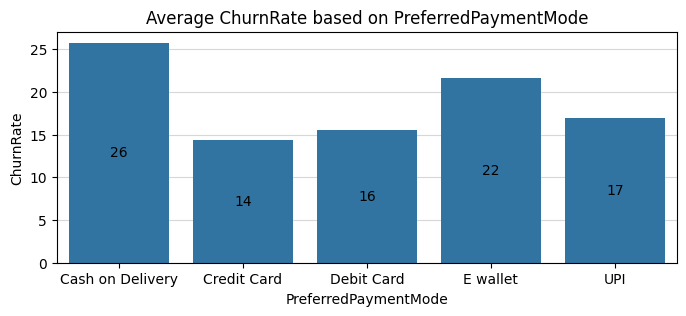

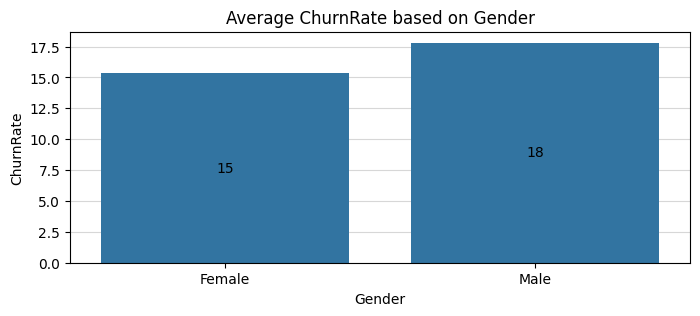

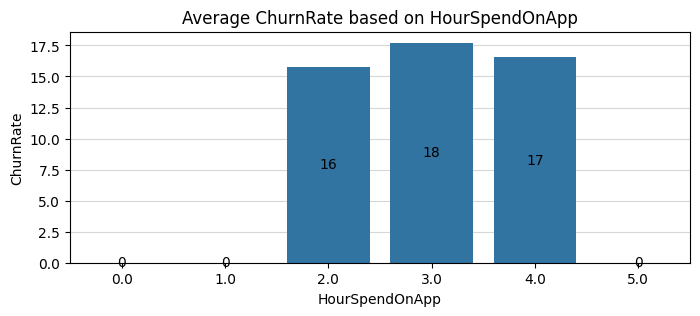

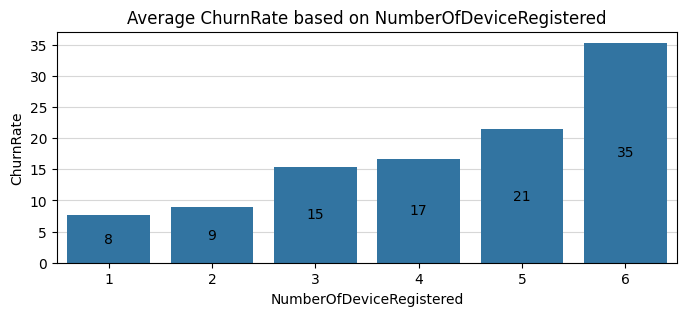

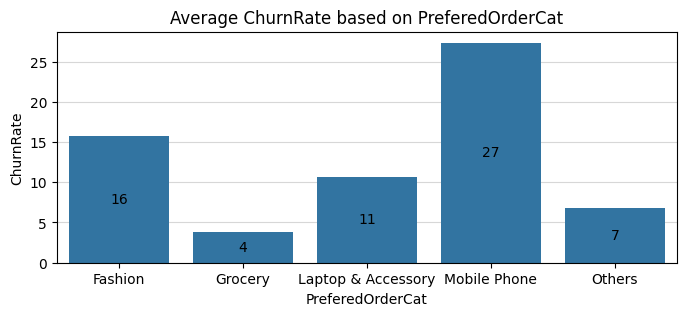

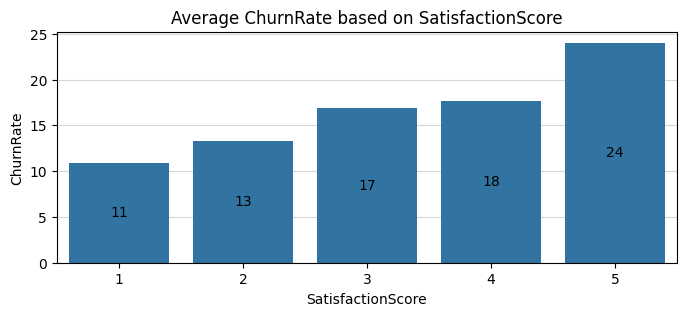

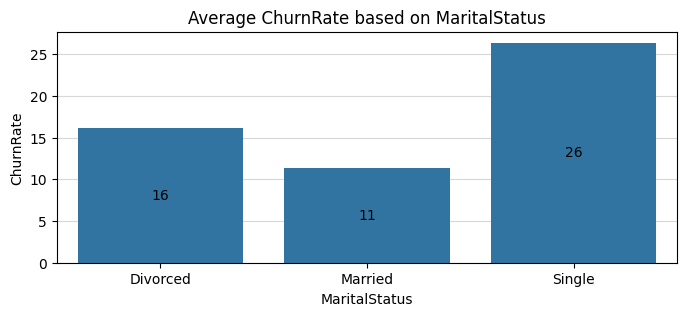

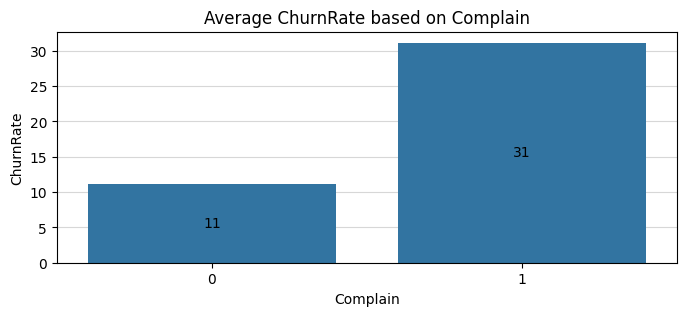

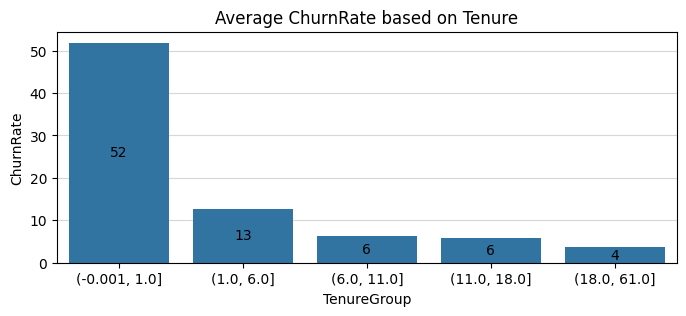

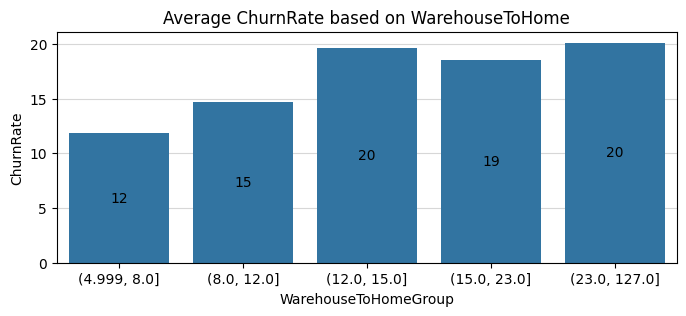

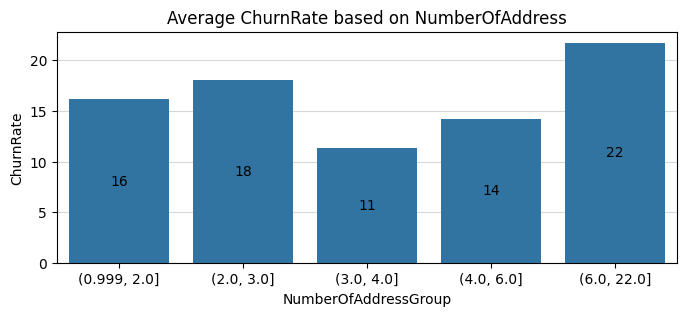

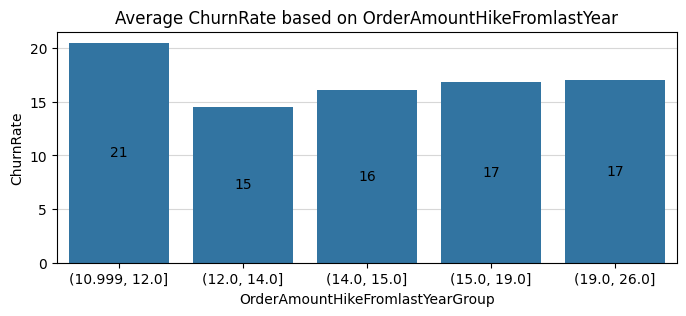

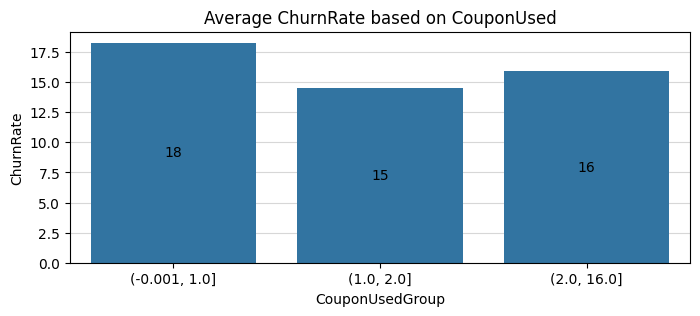

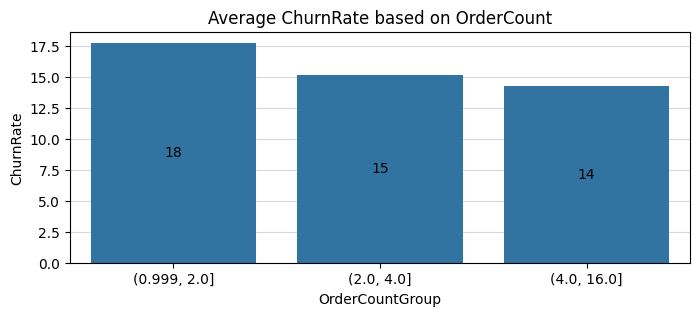

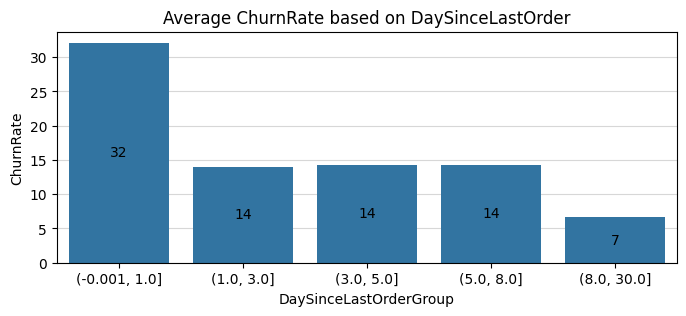

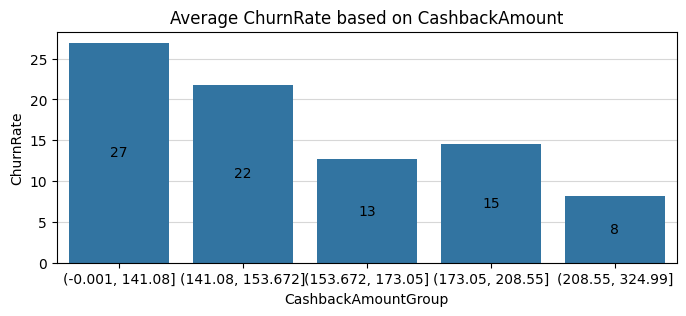

In [395]:
for j in list_nobin:
    plt.figure(figsize = (8, 3))
    ax = sns.barplot(data = df_train, x = j, y = 'ChurnRate', errorbar = None, order = sorted(df_train[j].unique()), zorder = 2)
    for container in ax.containers:
        ax.bar_label(container, fmt = '%.0f', label_type = 'center')
    plt.title(f'Average ChurnRate based on {j}')
    plt.grid(axis = 'y', alpha = 0.5, zorder = 1)
    plt.show()

for j in list_bin:
    df_train[j + 'Group'] = pd.qcut(df_train[j], 5, duplicates = 'drop')
    plt.figure(figsize = (8, 3))
    ax = sns.barplot(data = df_train, x = j + 'Group', y = 'ChurnRate', errorbar = None, order = sorted(df_train[j + 'Group'].unique()), zorder = 2)
    for container in ax.containers:
        ax.bar_label(container, fmt = '%.0f', label_type = 'center')
    plt.title(f'Average ChurnRate based on {j}')
    plt.grid(axis = 'y', alpha = 0.5, zorder = 1)
    plt.show()

|**Insight** (lihat grafik `Average ChurnRate based on Tenure`) |
|---|
|Perusahaan harus memberikan perhatian khusus kepada TenureGroup 0-1 bulan, karena menurut data, kelompok ini sangat rentan untuk churn (52%).|
| Akan tetapi, jika mereka ini bisa dipertahankan lebih dari 1 bulan, maka churn rate-nya turun drastis berturut-turut menjadi 13% (1-6 bulan), 6% (6-18 bulan), hingga bahkan 4% (18-61 bulan). |

#### **6.3. Total CashbackAmount**

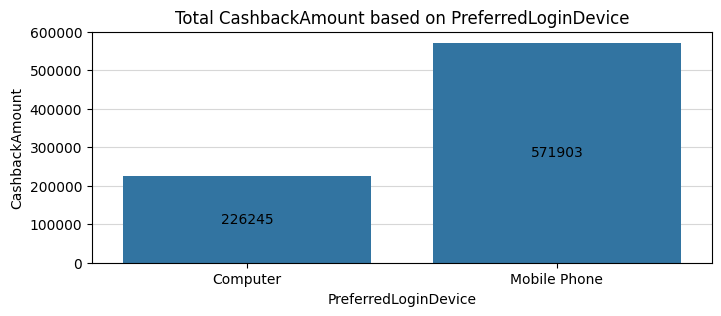

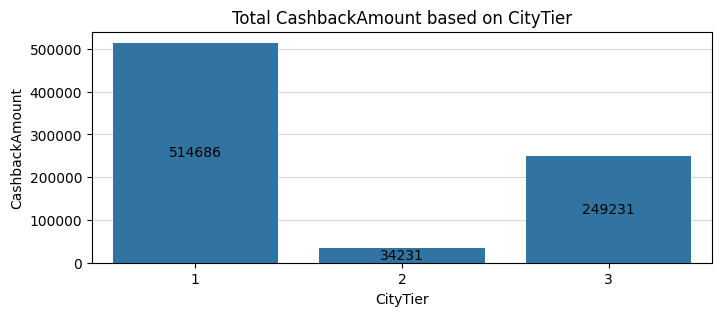

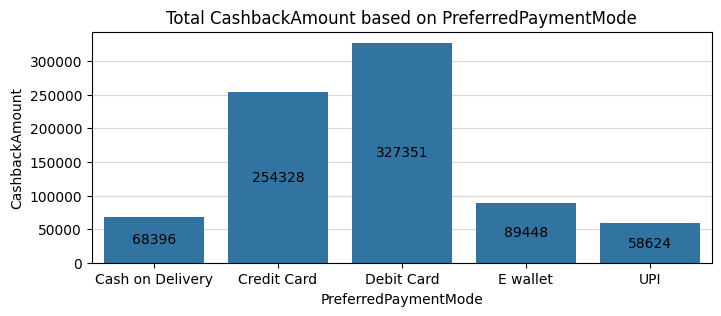

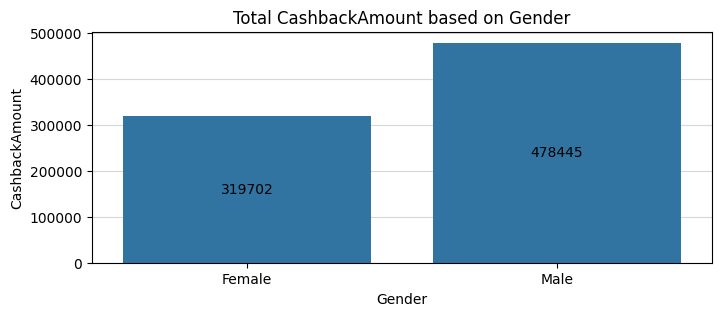

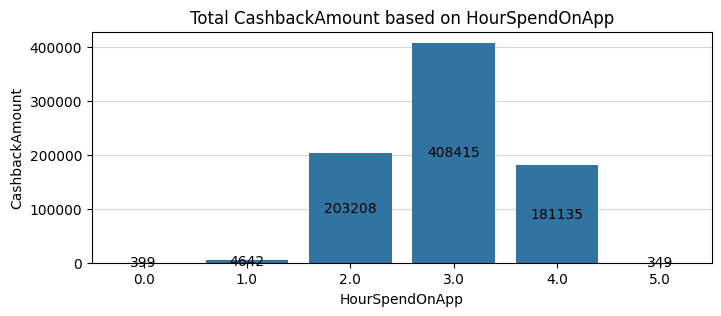

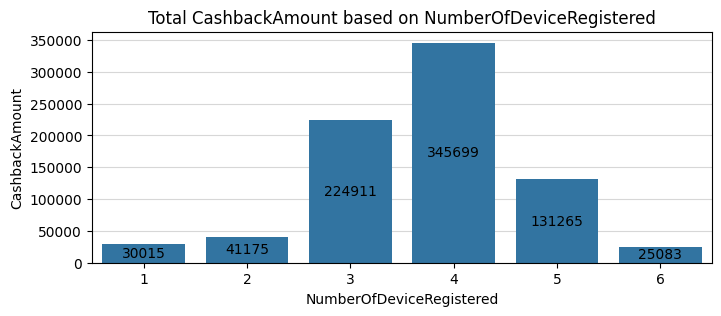

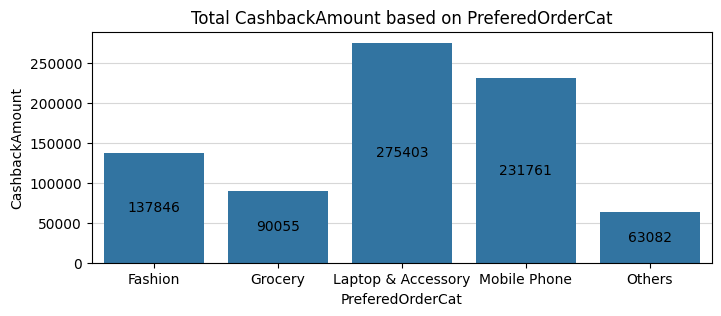

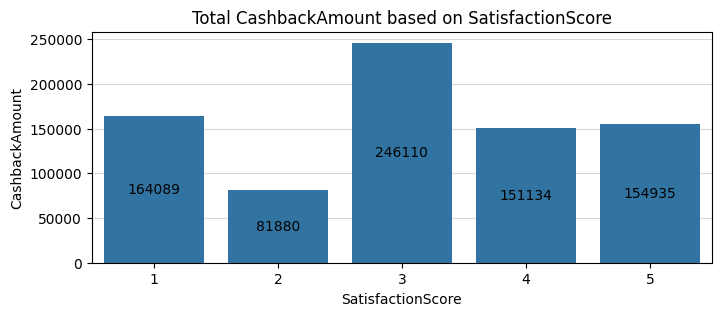

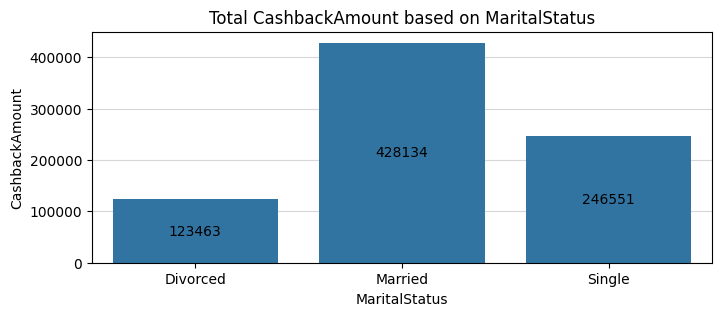

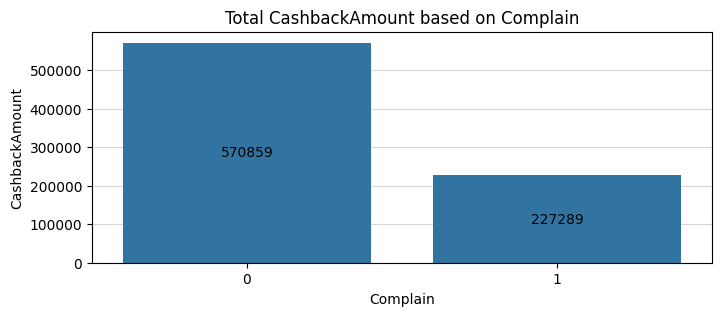

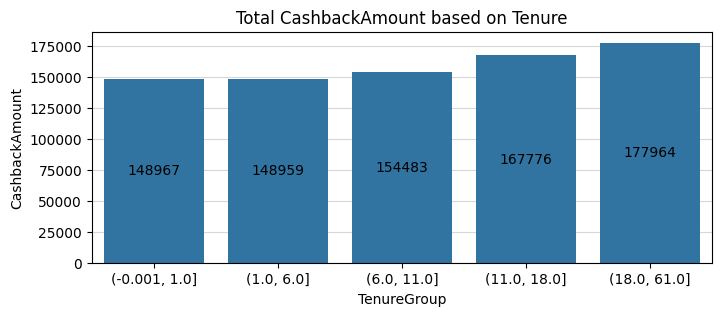

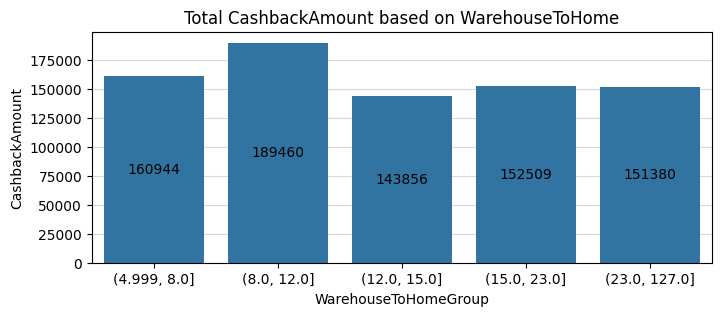

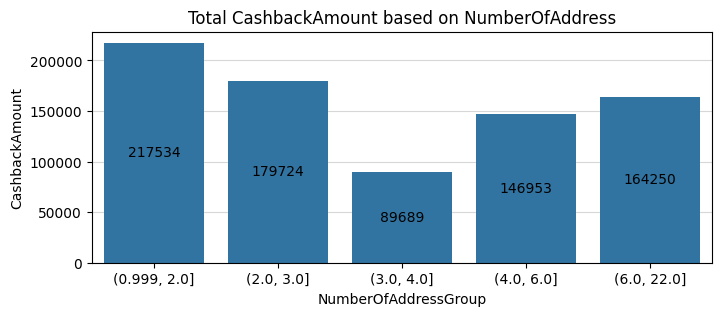

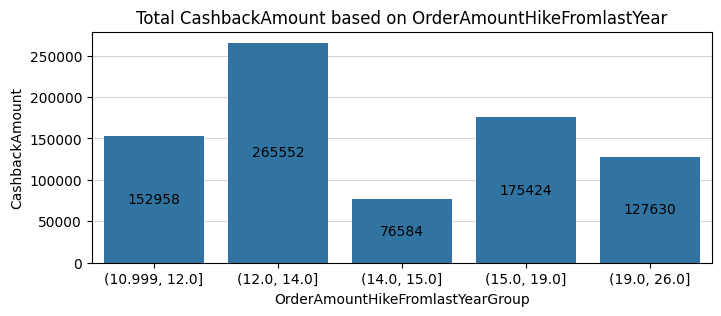

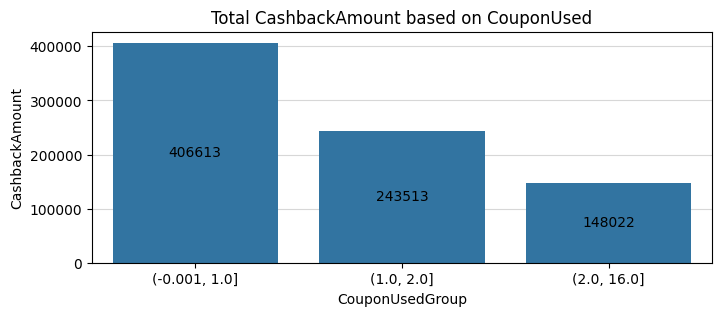

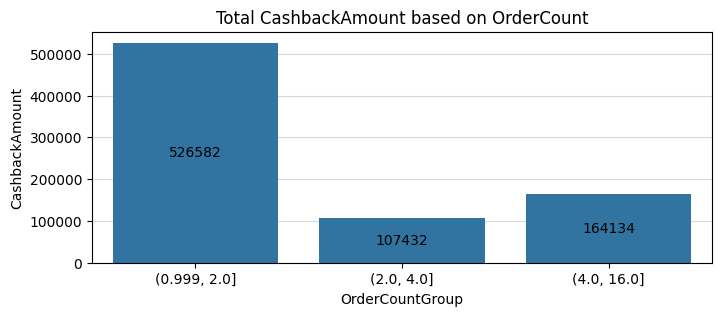

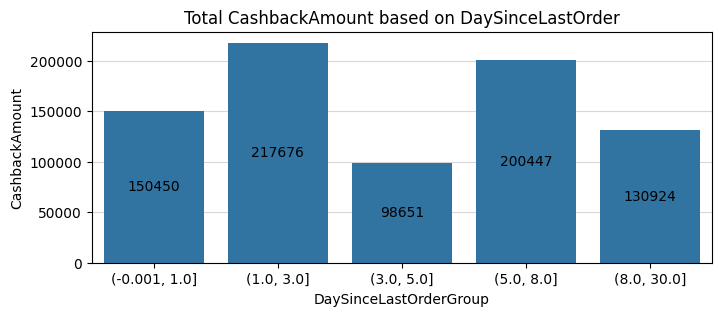

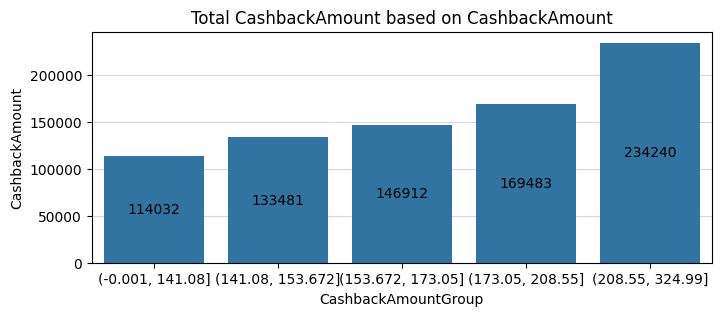

In [396]:
for j in list_nobin:
    plt.figure(figsize = (8, 3))
    ax = sns.barplot(data = df_train.groupby(j, observed = True)['CashbackAmount'].sum().reset_index(), x = j, y = 'CashbackAmount', errorbar = None, order = sorted(df_train[j].unique()), zorder = 2)
    for container in ax.containers:
        ax.bar_label(container, fmt = '%.0f', label_type = 'center')
    plt.title(f'Total CashbackAmount based on {j}')
    plt.grid(axis = 'y', alpha = 0.5, zorder = 1)
    plt.show()

for j in list_bin:
    df_train[j + 'Group'] = pd.qcut(df_train[j], 5, duplicates = 'drop')
    plt.figure(figsize = (8, 3))
    ax = sns.barplot(data = df_train.groupby(j + 'Group', observed = True)['CashbackAmount'].sum().reset_index(), x = j + 'Group', y = 'CashbackAmount', errorbar = None, order = sorted(df_train[j + 'Group'].unique()), zorder = 2)
    for container in ax.containers:
        ax.bar_label(container, fmt = '%.0f', label_type = 'center')
    plt.title(f'Total CashbackAmount based on {j}')
    plt.grid(axis = 'y', alpha = 0.5, zorder = 1)
    plt.show()

|**Insight** (lihat grafik `Total CashbackAmount based on PreferedOrderCat` dan `Average ChurnRate based on PreferedOrderCat`)|
|---|
|Manajemen juga mesti memprioritaskan kategori mobile phone yang walaupun menyumbang 29% penjualan (dengan asumsi total cashback mencerminkan total sales) tetapi justru mempunyai churn rate tertinggi (27%).|

#### **6.4. Average CashbackAmount**

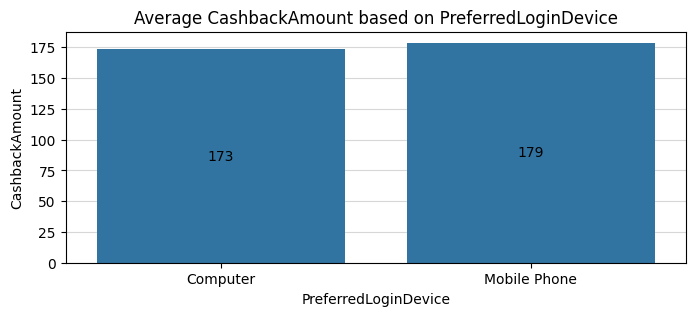

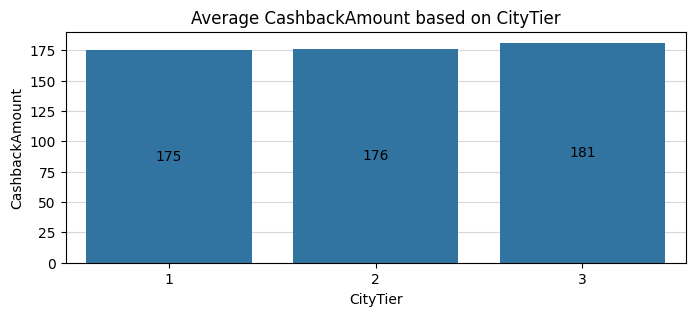

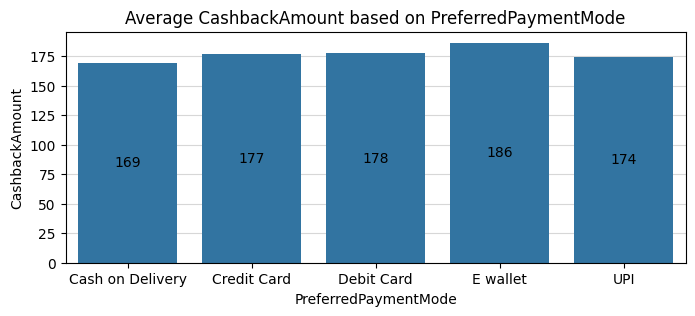

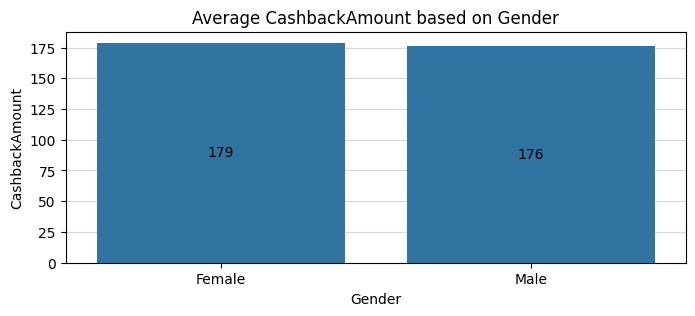

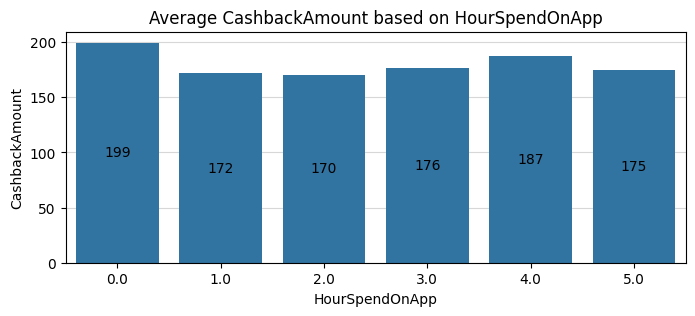

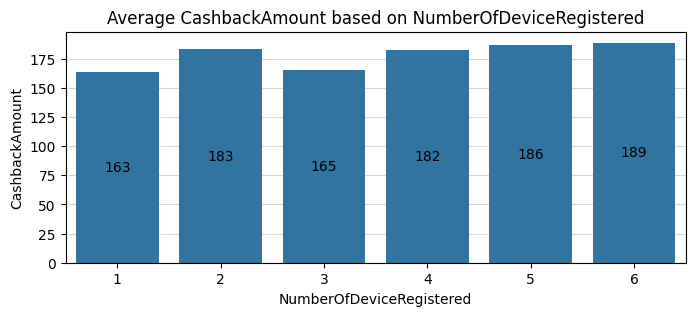

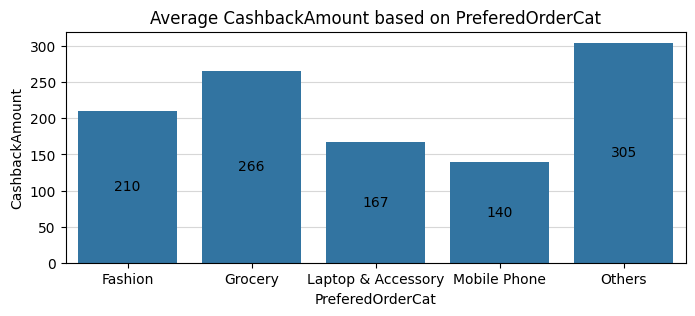

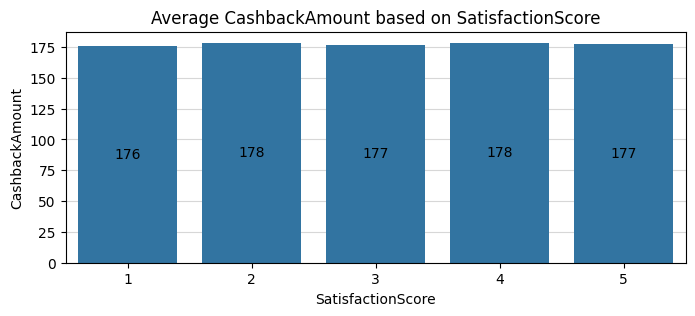

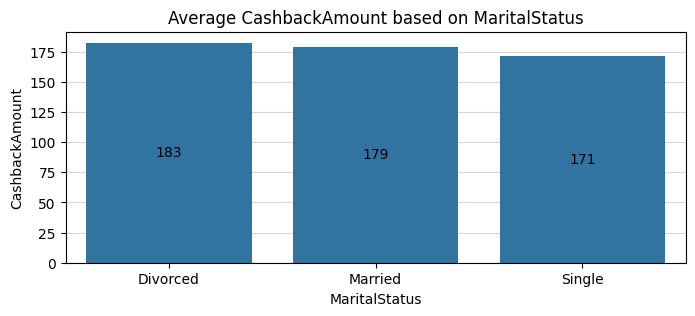

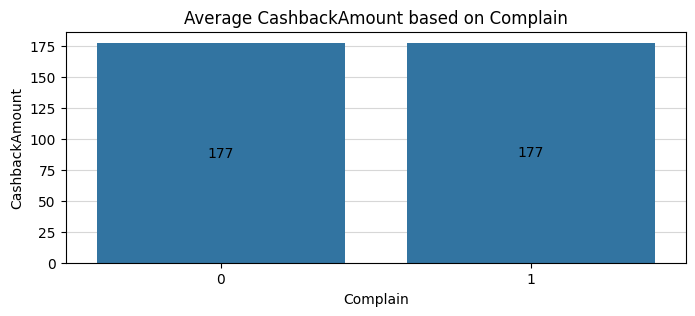

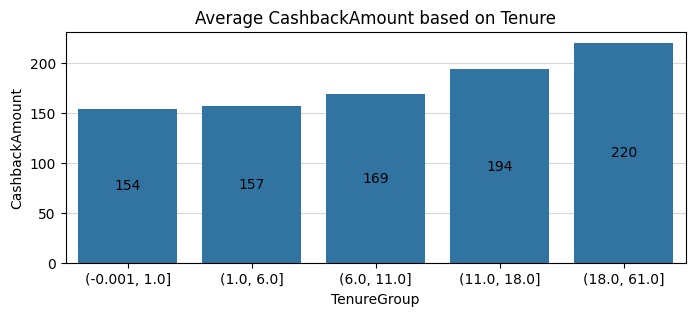

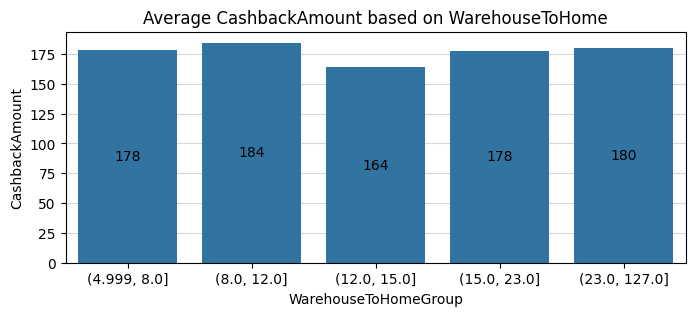

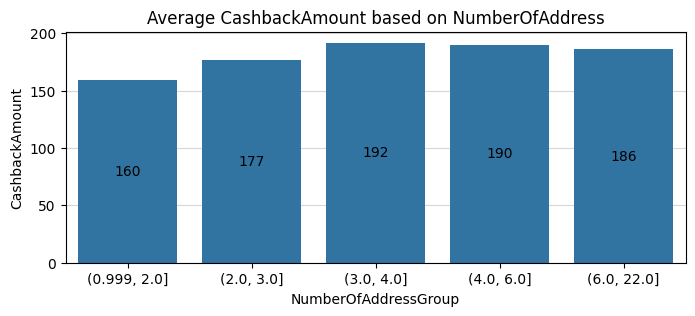

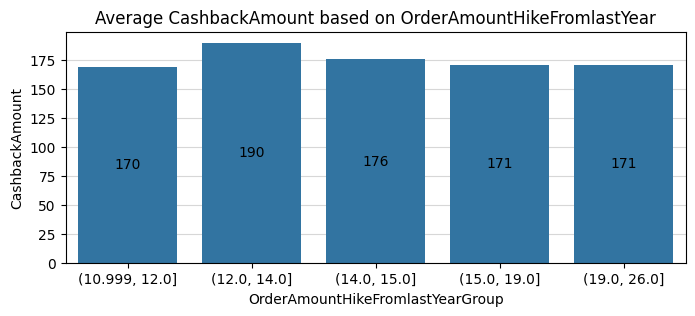

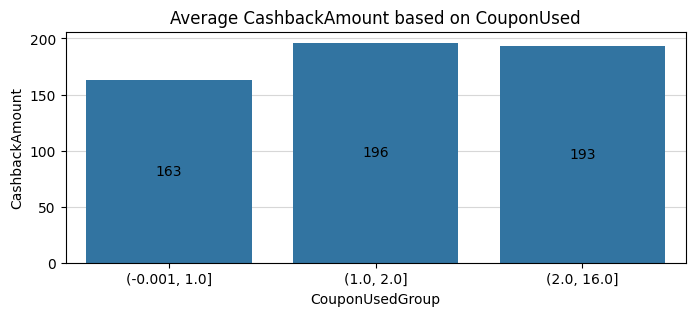

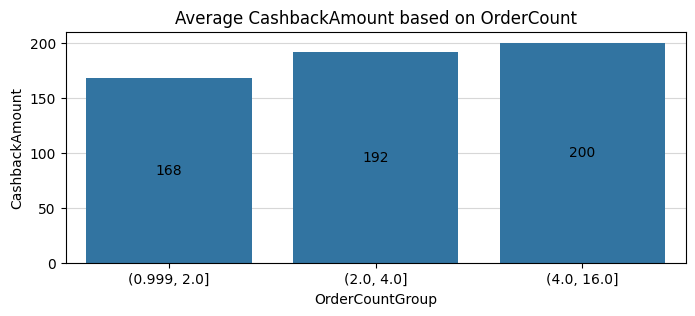

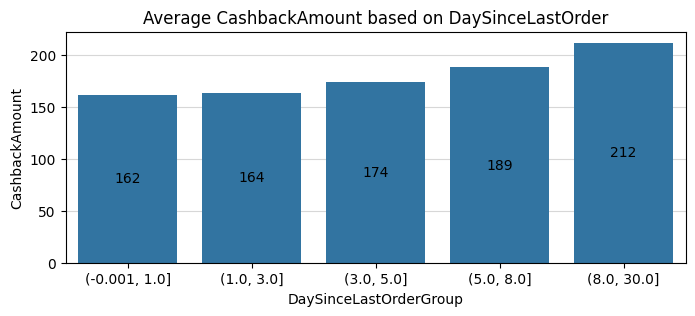

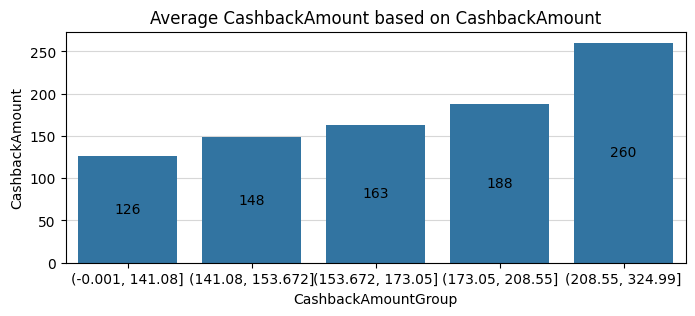

In [397]:
for j in list_nobin:
    plt.figure(figsize = (8, 3))
    ax = sns.barplot(data = df_train, x = j, y = 'CashbackAmount', errorbar = None, order = sorted(df_train[j].unique()), zorder = 2)
    for container in ax.containers:
        ax.bar_label(container, fmt = '%.0f', label_type = 'center')
    plt.title(f'Average CashbackAmount based on {j}')
    plt.grid(axis = 'y', alpha = 0.5, zorder = 1)
    plt.show()

for j in list_bin:
    df_train[j + 'Group'] = pd.qcut(df_train[j], 5, duplicates = 'drop')
    plt.figure(figsize = (8, 3))
    ax = sns.barplot(data = df_train, x = j + 'Group', y = 'CashbackAmount', errorbar = None, order = sorted(df_train[j + 'Group'].unique()), zorder = 2)
    for container in ax.containers:
        ax.bar_label(container, fmt = '%.0f', label_type = 'center')
    plt.title(f'Average CashbackAmount based on {j}')
    plt.grid(axis = 'y', alpha = 0.5, zorder = 1)
    plt.show()

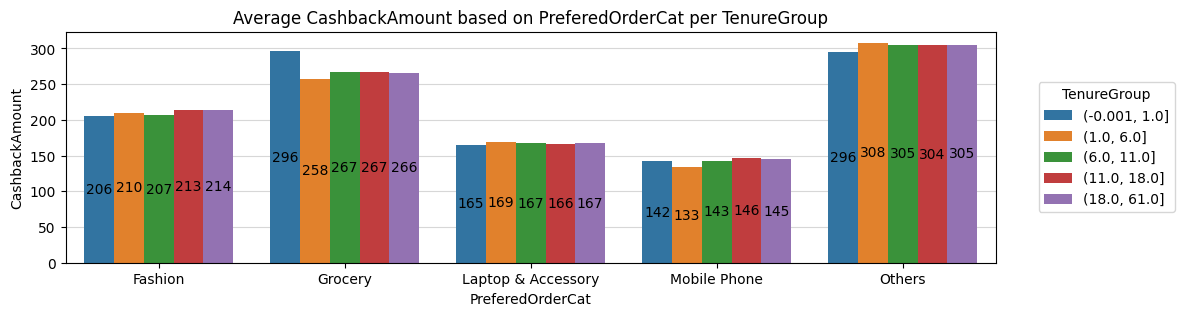

In [398]:
plt.figure(figsize = (12, 3))
ax = sns.barplot(data = df_train, x = 'PreferedOrderCat', y = 'CashbackAmount', hue = 'TenureGroup', errorbar = None, order = sorted(df_train['PreferedOrderCat'].unique()), zorder = 2)
for container in ax.containers:
        ax.bar_label(container, fmt = '%.0f', label_type = 'center')
plt.title(f'Average CashbackAmount based on PreferedOrderCat per TenureGroup')
plt.legend(loc = 'center right', title = 'TenureGroup', bbox_to_anchor = (1.20, 0.5))
plt.grid(axis = 'y', alpha = 0.5, zorder = 1)
plt.show()

|**Insight** (lihat grafik `Average CashbackAmount based on Tenure` dan `Average CashbackAmount based on PreferedOrderCat`)|
|---|
|**Rekomendasi** untuk mengatasi tingginya churn rate TenureGroup 0-1 bulan adalah dengan mengubah strategi pemasaran (dari yang sebelumnya memberikan average cashback yang semakin meningkat seiring bertambahnya tenure atau menghargai loyalitas customer) menjadi super agresif di awal-awal tenure baru kemudian diturunkan bertahap hingga hampir flat dengan semakin terbiasanya customer bertransaksi. Manajemen bisa menduplikasi strategi yang sudah diterapkan pada kategori grocery yang relatif lebih royal memberikan cashback di awal-awal tenure hingga berhasil menjadi kategori dengan churn rate paling rendah (4%).| 
|**Rekomendasi** untuk menurunkan churn rate di kategori mobile phone adalah dengan memangkas/mengalihkan budget cashback dari grocery dan others (yang churn rate-nya paling rendah dan total sales-nya terbawah) ke mobile phone supaya tercapai keseimbangan dan menyelamatkan kategori mobile phone yang saat ini lebih penting bagi perusahaan.|

#### **6.5. RFM Analysis**

|**RFM analysis**| 
|---|
|Bertujuan untuk memetakan customer supaya manajemen mendapatkan gambaran seberapa penting suatu customer berdasarkan tingkat `Recency` (kebaruan), `Frequency` (keseringan), dan `Monetary` (nilai uang) transaksi yang dilakukan.|

|RFM Description|
|---|
|**Recency** dalam hari dihitung dari tanggal terakhir periode penilaian dikurangi tanggal transaksi terakhir.|
|**Frequency** adalah jumlah order selama periode penilaian.|
|**Monetary** adalah total sales selama periode penilaian.|

**6.5.1. Recency Calculation**

In [399]:
df_recency = df_train[['CustomerID', 'DaySinceLastOrder']].rename(columns = {'DaySinceLastOrder': 'Recency'})
df_recency.head()

CustomerID  Recency
5131       55132      4.0
2363       52364      8.0
1418       51419      9.0
2802       52803      2.0
3480       53481      3.0

**6.5.2. Frequency Calculation**

In [400]:
df_frequency = df_train[['CustomerID', 'OrderCount']].rename(columns = {'OrderCount': 'Frequency'})
df_frequency.head()

CustomerID  Frequency
5131       55132        4.0
2363       52364        1.0
1418       51419        1.0
2802       52803        1.0
3480       53481        2.0

**6.5.3. Monetary Calculation**

In [401]:
df_monetary = df_train[['CustomerID', 'CashbackAmount']].rename(columns = {'CashbackAmount': 'Monetary'})
df_monetary.head()

CustomerID  Monetary
5131       55132    256.42
2363       52364    158.10
1418       51419    162.20
2802       52803    120.01
3480       53481    196.19

**6.5.4. Merging**

Setelah ketiganya selesai dinilai, maka kolomnya digabungkan ke satu dataframe.

In [402]:
df_rfm = df_recency.merge(df_frequency, on = 'CustomerID').merge(df_monetary, on = 'CustomerID')
df_rfm.head()

CustomerID  Recency  Frequency  Monetary
0       55132      4.0        4.0    256.42
1       52364      8.0        1.0    158.10
2       51419      9.0        1.0    162.20
3       52803      2.0        1.0    120.01
4       53481      3.0        2.0    196.19

**6.5.5. Ranking & Normalizing**

Lalu nilai tersebut dirangking dan dinormalisasi supaya rangking tertinggi adalah 100.

In [403]:
df_rfm['R Rank'] = df_rfm['Recency'].rank(ascending = False)
df_rfm['F Rank'] = df_rfm['Frequency'].rank(ascending = True)
df_rfm['M Rank'] = df_rfm['Monetary'].rank(ascending = True)
df_rfm.head()

CustomerID  Recency  Frequency  Monetary  R Rank  F Rank  M Rank
0       55132      4.0        4.0    256.42  2054.0  3558.0  4026.5
1       52364      8.0        1.0    158.10   833.5   702.5  2028.5
2       51419      9.0        1.0    162.20   494.5   702.5  2200.0
3       52803      2.0        1.0    120.01  3269.5   702.5    65.5
4       53481      3.0        2.0    196.19  2604.5  2265.5  3380.0

In [404]:
df_rfm['R Rank (Normalized)'] = (df_rfm['R Rank'] / df_rfm['R Rank'].max()) * 100
df_rfm['F Rank (Normalized)'] = (df_rfm['F Rank'] / df_rfm['F Rank'].max()) * 100
df_rfm['M Rank (Normalized)'] = (df_rfm['M Rank'] / df_rfm['M Rank'].max()) * 100
df_rfm.drop(columns = ['R Rank', 'F Rank', 'M Rank'], inplace = True)
df_rfm.head()

CustomerID  Recency  Frequency  Monetary  R Rank (Normalized)  \
0       55132      4.0        4.0    256.42            47.845330   
1       52364      8.0        1.0    158.10            19.415327   
2       51419      9.0        1.0    162.20            11.518751   
3       52803      2.0        1.0    120.01            76.158863   
4       53481      3.0        2.0    196.19            60.668530   

   F Rank (Normalized)  M Rank (Normalized)  
0            79.145812            89.408238  
1            15.626738            45.042745  
2            15.626738            48.850894  
3            15.626738             1.454424  
4            50.394839            75.052737

**6.5.6. Scoring & Segmentation**

Angka rangking tersebut kita scale down dengan mengalikan 0.05 sehingga score tertingginya adalah 5.

In [405]:
rfm_scale = 0.05

df_rfm['R Score'] = df_rfm['R Rank (Normalized)'] * rfm_scale
df_rfm['F Score'] = df_rfm['F Rank (Normalized)'] * rfm_scale
df_rfm['M Score'] = df_rfm['M Rank (Normalized)'] * rfm_scale

df_rfm = df_rfm.round(1)
df_rfm[['CustomerID', 'R Score', 'F Score', 'M Score']].head()

CustomerID  R Score  F Score  M Score
0       55132      2.4      4.0      4.5
1       52364      1.0      0.8      2.3
2       51419      0.6      0.8      2.4
3       52803      3.8      0.8      0.1
4       53481      3.0      2.5      3.8

| Segmentasi                      | Profil                                                                                           | Skor RFM | Aksi                                                                                                                                      |
|----------------------------------|--------------------------------------------------------------------------------------------------|----------|-------------------------------------------------------------------------------------------------------------------------------------------|
| Champions                        | Tinggi dalam Recency, Frequency, dan Monetary                                                    | 5-5-5    | Terus melibatkan mereka dengan penawaran dan hadiah yang dipersonalisasi untuk menjaga loyalitas dan mencegah churn.                       |
| Loyal Customers                  | Tinggi dalam Frequency dan Monetary, tetapi tidak selalu tinggi dalam Recency                    | 3-5-5    | Dorong mereka dengan program loyalitas khusus, mengingatkan mereka tentang nilai yang mereka dapatkan.                                     |
| At Risk                          | Tinggi dalam Monetary dan Frequency, tetapi rendah dalam Recency                                 | 1-5-4    | Tawarkan kampanye reaktivasi, seperti diskon yang dipersonalisasi, untuk mencegah churn.                                                   |
| Potential Loyalists              | Tinggi dalam Recency dan Frequency, tetapi rendah dalam Monetary                                 | 5-4-2    | Upsell atau cross-sell produk dengan nilai lebih tinggi untuk meningkatkan nilai moneternya dan mencegah churn.                            |
| Hibernating                      | Rendah dalam Recency, Frequency, dan Monetary                                                    | 2-2-2    | Pertimbangkan kampanye win-back atau survei untuk memahami mengapa mereka tidak aktif.                                                     |
| Can't Lose Them                  | Rendah dalam Recency, tinggi dalam Frequency dan Monetary                                        | 1-4-5    | Fokus pada strategi re-engagement yang dipersonalisasi untuk mempertahankan mereka.                                                        |
| Lost                             | Sangat rendah dalam Recency, Frequency, dan Monetary                                             | 1-1-1    | Pertimbangkan upaya terakhir dengan penawaran win-back yang agresif atau alokasikan sumber daya untuk segmen yang lebih layak.              |
| New Customers                    | Tinggi dalam Recency, rendah dalam Frequency dan Monetary                                        | 5-1-1    | Berikan perhatian kepada pelanggan baru ini dengan kampanye onboarding untuk meningkatkan keterlibatan mereka dan mencegah churn dini.      |
| Others                           | Beragam profil dalam Recency, Frequency, dan Monetary                                            | Beragam  | Tindakan lebih lanjut akan disesuaikan berdasarkan analisis lebih lanjut terhadap segmen ini.                                              |


In [406]:
df_rfm['Segment'] = np.where((df_rfm['R Score'] >= 4) & (df_rfm['F Score'] >= 4) & (df_rfm['M Score'] >= 4), 'Champions',
                   np.where((df_rfm['F Score'] >= 4) & (df_rfm['M Score'] >= 4), 'Loyal Customers',
                   np.where((df_rfm['R Score'] >= 4) & (df_rfm['F Score'] >= 3) & (df_rfm['M Score'] <= 2), 'Potential Loyalists',
                   np.where((df_rfm['R Score'] >= 4) & (df_rfm['F Score'] <= 2) & (df_rfm['M Score'] <= 2), 'New Customers',
                   np.where((df_rfm['R Score'] <= 2) & (df_rfm['F Score'] >= 4) & (df_rfm['M Score'] >= 3), 'At Risk',
                   np.where((df_rfm['R Score'] <= 2) & (df_rfm['F Score'] >= 3) & (df_rfm['M Score'] >= 4), 'Can’t Lose Them',
                   np.where((df_rfm['R Score'] <= 2) & (df_rfm['F Score'] <= 2) & (df_rfm['M Score'] <= 2), 'Lost',
                   np.where((df_rfm['R Score'] <= 3) & (df_rfm['F Score'] <= 3) & (df_rfm['M Score'] <= 3), 'Hibernating', 'Other'))))))))
                   

df_rfm[['CustomerID', 'R Score', 'F Score', 'M Score', 'Segment']].head()

CustomerID  R Score  F Score  M Score          Segment
0       55132      2.4      4.0      4.5  Loyal Customers
1       52364      1.0      0.8      2.3      Hibernating
2       51419      0.6      0.8      2.4      Hibernating
3       52803      3.8      0.8      0.1            Other
4       53481      3.0      2.5      3.8            Other

**6.5.7. Visualizing**

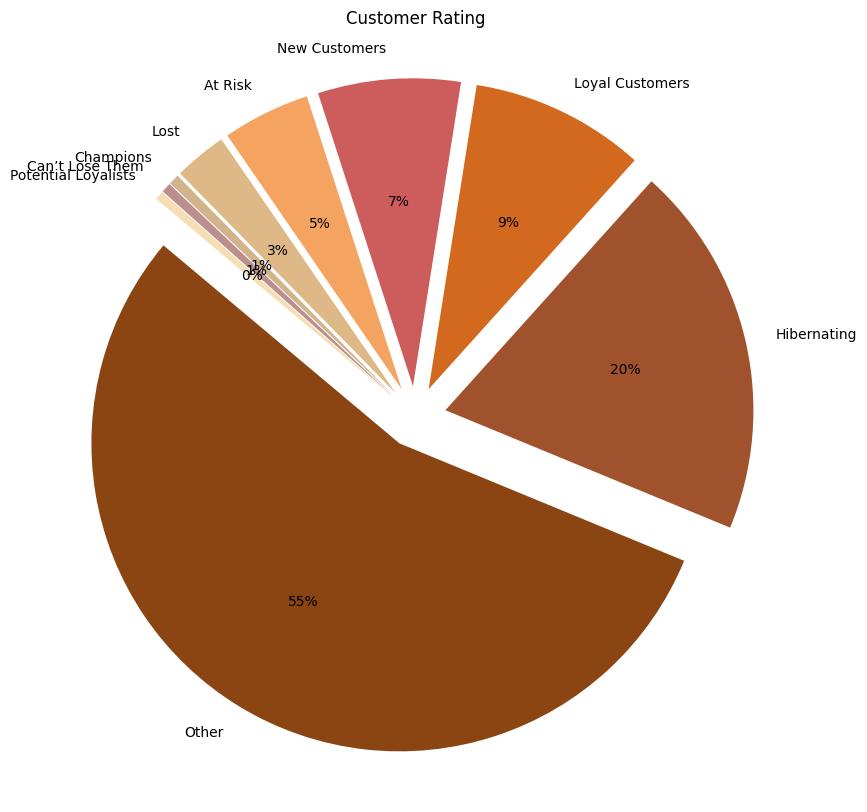

In [407]:
segment_counts = df_rfm['Segment'].value_counts()
explode = [0.1] * len(segment_counts)  # Memberikan jarak yang sama untuk setiap segmen
brown_colors = [
    "#8B4513",  # SaddleBrown
    "#A0522D",  # Sienna
    "#D2691E",  # Chocolate
    "#CD5C5C",  # IndianRed
    "#F4A460",  # SandyBrown
    "#DEB887",  # BurlyWood
    "#D2B48C",  # Tan
    "#BC8F8F",  # RosyBrown
    "#F5DEB3"   # Wheat
]

plt.figure(figsize=(15, 10))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%.0f%%', explode=explode, 
        startangle=140, colors=brown_colors)
plt.title('Customer Rating')
plt.show()


### **7. Modelling - Machine Learning**

**Metric Evaluation**

|Metrics Evaluation||
|---|---|
|**True Positive (TP)**| Customer diprediksi dan kenyataannya melakukan churn|
| **False Positive (FP)** |Customer diprediksi melakukan churn, namun pada kenyataannya customer tidak melakukan churn|
| **False Negative (FN)**| Customer diprediksi tidak melakukan churn, namun pada kenyataannya customer melakukan churn|
| **True Negative (TN)**| Customer diprediksi dan kenyataannya tidak melakukan churn|

Model yang dibuat harus dapat mengurangi kerugian perusahaan karena kehilangan customer atau menekan **False Negative**, namun tetap menjaga agar perusahaan tidak mengeluarkan biaya yang tidak tepat sasaran dalam memberikan promosi (False Positive). Oleh karena itu, metric utama yang digunakan yaitu `f2 score`.

`F2 score` adalah salah satu classification evaluation metrics yang mengukur akurasi model dengan mempertimbangkan trade-off antara precision dan recall. `F2 score` didasarkan pada nilai beta di mana beta lebih besar dari 1 memberikan lebih banyak penekanan pada recall daripada precision.
`F2 score` dapat digunakan untuk mengevaluasi performa model klasifikasi di mana kesalahan false negative lebih penting untuk dihindari daripada false positive.

**Variable `data` untuk Modelling**

In [484]:
data.sample(5)

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
5362      0    12.0         Mobile Phone         1             11.0   
3271      0     4.0         Mobile Phone         1              7.0   
4715      0     3.0         Mobile Phone         3             17.0   
4505      0     1.0         Mobile Phone         1             33.0   
4804      0     5.0         Mobile Phone         1             18.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
5362          Credit Card  Female             3.0                         4   
3271           Debit Card    Male             3.0                         6   
4715             E wallet    Male             3.0                         4   
4505           Debit Card    Male             3.0                         4   
4804           Debit Card    Male             3.0                         4   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
5362     Mobile Phone                  3       Married                9   
3271     Mobile Phone                  3      Divorced                5   
4715     Mobile Phone                  4       Married                3   
4505     Mobile Phone                  1       Married                3   
4804     Mobile Phone                  1       Married                5   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
5362         0                         20.0         1.0         2.0   
3271         0                         22.0         2.0         2.0   
4715         0                         15.0         3.0         3.0   
4505         0                         13.0         1.0         2.0   
4804         1                         20.0         1.0         2.0   

      DaySinceLastOrder  CashbackAmount  
5362                1.0          158.06  
3271                3.0          163.33  
4715                3.0          147.97  
4505                3.0          154.04  
4804                3.0          148.56

**Filter data berdasarkan `PreferedOrderCat` dengan nilai `Mobile Phone`**

|Fokus Model Machine Learning terhadap kategori produk `Mobile Phone`|
|---|
|Dikarenakan ingkat churn pelanggan untuk kategori produk **Mobile Phone** mencapai 27%, yang merupakan angka tertinggi di antara kategori produk. Meskipun produk ini menempati posisi kedua tertinggi dalam hal penjualan (29%), setelah laptop.|

In [409]:
data = data[data['PreferedOrderCat'] == 'Mobile Phone']
data

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
1         1     NaN         Mobile Phone         1              8.0   
2         1     NaN         Mobile Phone         1             30.0   
4         1     0.0         Mobile Phone         1             12.0   
5         1     0.0             Computer         1             22.0   
7         1     NaN         Mobile Phone         1              6.0   
...     ...     ...                  ...       ...              ...   
5615      0    14.0         Mobile Phone         1              9.0   
5617      0    14.0         Mobile Phone         1              9.0   
5618      0     9.0         Mobile Phone         1              8.0   
5620      0     3.0         Mobile Phone         1             35.0   
5624      0     1.0         Mobile Phone         3             12.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
1                     UPI    Male             3.0                         4   
2              Debit Card    Male             2.0                         4   
4             Credit Card    Male             NaN                         3   
5              Debit Card  Female             3.0                         5   
7             Credit Card    Male             3.0                         3   
...                   ...     ...             ...                       ...   
5615           Debit Card    Male             1.0                         5   
5617          Credit Card  Female             4.0                         4   
5618           Debit Card  Female             4.0                         6   
5620          Credit Card  Female             4.0                         5   
5624                  UPI  Female             2.0                         5   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
1        Mobile Phone                  3        Single                7   
2        Mobile Phone                  3        Single                6   
4        Mobile Phone                  5        Single                3   
5        Mobile Phone                  5        Single                2   
7        Mobile Phone                  2      Divorced                3   
...               ...                ...           ...              ...   
5615     Mobile Phone                  3        Single                4   
5617     Mobile Phone                  3       Married                4   
5618     Mobile Phone                  1       Married                3   
5620     Mobile Phone                  5        Single                3   
5624     Mobile Phone                  3        Single                2   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
1            1                         15.0         0.0         1.0   
2            1                         14.0         0.0         1.0   
4            0                         11.0         1.0         1.0   
5            1                         22.0         4.0         6.0   
7            1                         16.0         2.0         2.0   
...        ...                          ...         ...         ...   
5615         0                         15.0         1.0         3.0   
5617         0                         15.0         1.0         2.0   
5618         0                         13.0         2.0         2.0   
5620         0                         15.0         1.0         2.0   
5624         0                         19.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount  
1                   0.0          120.90  
2                   3.0          120.28  
4                   3.0          129.60  
5                   7.0          139.19  
7                   0.0          122.93  
...                 ...             ...  
5615                3.0          153.09  
5617                3.0          145.01  
5618                2.0          154.77  
5620                5.0       

**Memeriksa Proporsi Target : `Churn`**

In [410]:
print(data['Churn'].value_counts())
print()

print(data['Churn'].value_counts()/len(data['Churn'])*100)

Churn
0    1510
1     570
Name: count, dtype: int64

Churn
0    72.596154
1    27.403846
Name: count, dtype: float64


Proporsi churn ini tergolong **`Imbalanced Dataset`**. Terdapat ketidakseimbangan yang signifikan antara kelas mayoritas `tidak churn` dan kelas minoritas `churn`.

**Imbalance dapat dikategorikan menjadi beberapa tingkat berdasarkan proporsi minoritas (minority class):**



Ada ketidaksesuaian dalam penjelasan tersebut. Berikut adalah penjelasan yang lebih akurat:

1. **Balanced**: Kedua kelas memiliki distribusi yang hampir sama, misalnya rasio mendekati 50:50.

2. **Slightly Imbalanced**: Biasanya, proporsi minoritas berkisar antara 40% - 30% dari total data. Artinya, satu kelas minoritas memiliki 30% hingga 40% dari total data.

3. **Moderate Imbalance**: Proporsi minoritas berada antara 30% - 20%. Artinya, satu kelas minoritas memiliki 20% hingga 30% dari total data.

4. **Severe Imbalance**: Proporsi minoritas berada di bawah 20%. Artinya, satu kelas minoritas memiliki kurang dari 20% dari total data.



Target **(Churn)** pada dataset ini memiliki proportion of minority class sebesar `27.4%` sehingga tergolong **Slightly Imbalanced**

**Mendefinisikan Feature (X) dan Target (y)**

In [411]:
X = data.drop('Churn', axis=1)
y = data['Churn']

#### **7.1. Preprocessing**

**Data Splitting**

| Data Splitting|
|---|
|Data splitting adalah proses membagi dataset menjadi dua atau lebih subset data yang digunakan untuk tujuan yang berbeda dalam proses pemodelan machine learning. Tujuan utama dari data splitting adalah untuk memastikan bahwa model yang dibangun tidak hanya berfungsi dengan baik pada data pelatihan (train data), tetapi juga dapat menggeneralisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya (test data).|

|Secara umum, data splitting dilakukan dengan membagi dataset menjadi dua subset utama||
|---|--|
|1. **Train Data** |Bagian ini digunakan untuk melatih dan membangun model machine learning.|
|2. **Test Data** |Bagian ini digunakan untuk mengevaluasi performa model yang telah dilatih pada data baru yang belum pernah dilihat sebelumnya.|

**Melakukan data splitting menjadi `Data Train` dan `Data test`**

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

|Menggunakan fungsi train_test_split dari library Scikit-learn untuk membagi data menjadi train dan test sets.|
|----|
|`test_size=0.2` berarti 20% dari data akan menjadi test set, dan sisanya (80%) menjadi train set.|
|`random_state=2024` digunakan untuk memastikan hasil splitting data akan selalu sama.|

In [413]:
pipe_impute_robust = Pipeline([
    ('median', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', RobustScaler())
])

In [414]:
transformer = ColumnTransformer([
    ('pipe_impute_robust', pipe_impute_robust, numerical_features),
    ('onehot', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_impute_robust',
                                 Pipeline(steps=[('median',
                                                  SimpleImputer(strategy='median')),
                                                 ('poly', PolynomialFeatures()),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'CityTier', 'WarehouseToHome',
                                  'HourSpendOnApp', 'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'Complain', 'OrderAmountHikeFromlastYear',
                                  'CouponUsed', 'OrderCount',
                                  'DaySinceLastOrder', 'CashbackAmount']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['PreferredLoginDevice',
                                  'PreferredPaymentMode', 'Gender',
                                  'PreferedOrderCat', 'MaritalStatus'])])

#### **7.2. Benchmark Model**

**Algoritma Machine Learning**

In [415]:
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced')
rf = RandomForestClassifier(random_state=0, class_weight='balanced')
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

Model-model ini dipilih karena mereka mewakili berbagai pendekatan untuk masalah klasifikasi, mulai dari yang sederhana (KNN) hingga yang lebih kompleks dan kuat (Random Forest, AdaBoost, Gradient Boosting, dan XGBoost).

**Resampler**

In [416]:
smote = SMOTE(random_state=42)
nearmiss = NearMiss()
rus = RUS(random_state=42)
ros = ROS(random_state=42)

**Mencari algoritma terbaik dengan melihat nilai mean dan standar deviasi dari `f2 score`**

In [417]:
models = [knn, tree, rf, ada, gbc, xgbc]
score = []
list_mean = []
list_std = []

f2_score = make_scorer(fbeta_score, beta=2)

for i in models:

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('resampler', smote),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator = pipe_model,
        X= X_train,
        y= y_train,
        cv=5,
        scoring= f2_score,
        error_score='raise'
        )

    score.append(model_cv)
    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())

**Membuat data frame mean dan std dari setiap algoritma yang dilooping**

In [418]:
data_hl = pd.DataFrame({
    'models':['knn', 'tree', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':list_mean,
    'std':list_std
})

data_hl.sort_values(by='mean', ascending=False)

models      mean       std
2     rf  0.883907  0.035332
5   xgbc  0.876233  0.042473
1   tree  0.837944  0.033853
3    ada  0.837608  0.038948
4    gbc  0.811362  0.045929
0    knn  0.755949  0.046028

**Dua Model Terbaik:**

1. **Random Forest (rf)**
   - **Mean**: 0.883907
   - **Std**:  0.035332

2. **XGBoost Classifier (xgbc)**
   - **Mean**: 0.876233
   - **Std**:  0.042473

**Analisis Detail:**

1. **Random Forest (rf)**:
   - **Keunggulan**: Model ini memiliki nilai mean tertinggi (0.883907), yang berarti model ini memiliki performa prediksi yang paling baik di antara semua model. Standar deviasi (0.035332) yang rendah menunjukkan bahwa performanya cukup stabil dan konsisten, dengan sedikit variasi di antara iterasi.
   - **Kelemahan**: Walaupun performanya stabil, model ini mungkin bisa lebih ditingkatkan dengan tuning hyperparameter, terutama untuk mengurangi potensi overfitting jika model terlalu kompleks.

2. **XGBoost Classifier (xgbc)**:
   - **Keunggulan**: XGBoost juga menunjukkan performa yang sangat baik dengan nilai mean sebesar 0.876233, sedikit di bawah Random Forest. Model ini dikenal kuat dan mampu menangani berbagai jenis data dengan baik, terutama dalam kasus data yang tidak seimbang atau memiliki banyak outlier.
   - **Kelemahan**: Standar deviasi XGBoost (0.042473) sedikit lebih tinggi daripada Random Forest, menunjukkan bahwa performanya mungkin lebih bervariasi. Ini bisa disebabkan oleh sensitivitas model terhadap parameter-parameter tertentu seperti `learning_rate` atau `max_depth`.

#### **7.3. Hyperparameter Tuning**

Model `Random Forest` dan `XGBoost Classifier` akan dilakukan Tuning.

#### **Random Forest**

**Mendifinisakan Ruang Hyperparameter - Random Forest**

In [419]:
hyperparam_space_rf = {
    'balancing':[smote, rus, ros, nearmiss, None],
    'model__max_depth': list(np.arange(1,100,2)),
    'model__n_estimators': list(np.arange(1,100,2)),
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_leaf': list(np.arange(1,100,2)),
    'model__min_samples_split': list(np.arange(1,100,2)),
    'transformer__pipe_impute_robust__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'transformer__pipe_impute_robust__poly__degree': [1,2,3]
}

**Setup `RandomizedSearchCV`**

In [420]:
rf = RandomForestClassifier(random_state=0, class_weight='balanced')

pipe_model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote),
        ('model', rf)
        ])

random_rf = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam_space_rf,
    cv = 5,
    scoring = f2_score,
    n_jobs = -1,
    random_state=0,
    n_iter= 1000
)

**Fit Model `Random Forest` pada Data Train**

In [421]:
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'CityTier',
                                                                                'WarehouseToHome',
                                                                                'HourSpendOnApp',
                                                                                'NumberOfDeviceRegistered',
                                                                                'Satis...
                                                                     57, 59, ...],
                                        'model__n_estimators': [1, 3, 5, 7, 9,
                                                                11, 13, 15, 17,
                                                                19, 21, 23, 25,
                                                                27, 29, 31, 33,
                                                                35, 37, 39, 41,
                                                                43, 45, 47, 49,
                                                                51, 53, 55, 57,
                                                                59, ...],
                                        'transformer__pipe_impute_robust__poly__degree': [1,
                                                                                          2,
                                                                                          3],
                                        'transformer__pipe_impute_robust__scaler': [MinMaxScaler(),
                                                                                    StandardScaler(),
                                                                                    RobustScaler()]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [422]:
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
378       0.067799      0.005702         0.007917        0.001670   
69        0.113260      0.006700         0.009257        0.002427   
952       0.412950      0.013461         0.010507        0.002073   
938       0.129760      0.007383         0.012885        0.002228   
477       0.089048      0.006201         0.007717        0.001144   

    param_transformer__pipe_impute_robust__scaler  \
378                              StandardScaler()   
69                                 RobustScaler()   
952                                RobustScaler()   
938                                MinMaxScaler()   
477                                MinMaxScaler()   

    param_transformer__pipe_impute_robust__poly__degree  \
378                                                  1    
69                                                   1    
952                                                  3    
938                                                  1    
477                                                  1    

    param_model__n_estimators param_model__min_samples_split  \
378                        35                              7   
69                         59                             37   
952                        65                              9   
938                        93                             45   
477                        49                             83   

    param_model__min_samples_leaf param_model__max_features  \
378                             3                      sqrt   
69                              3                      sqrt   
952                             1                      log2   
938                             1                      sqrt   
477                             5                      log2   

    param_model__max_depth                     param_balancing  \
378                     85                                None   
69                      53  RandomOverSampler(random_state=42)   
952                     59  RandomOverSampler(random_state=42)   
938                     63                                None   
477                     81  RandomOverSampler(random_state=42)   

                                                params  split0_test_score  \
378  {'transformer__pipe_impute_robust__scaler': St...           0.863931   
69   {'transformer__pipe_impute_robust__scaler': Ro...           0.855950   
952  {'transformer__pipe_impute_robust__scaler': Ro...           0.891304   
938  {'transformer__pipe_impute_robust__scaler': Mi...           0.809129   
477  {'transformer__pipe_impute_robust__scaler': Mi...           0.817996   

     split1_test_score  split2_test_score  split3_test_score  \
378           0.884279           0.792952           0.900217   
69            0.887265           0.821206           0.889831   
952           0.863931           0.793478           0.892070   
938           0.868201           0.796646           0.871849   
477           0.863158           0.767635           0.866388   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
378           0.849462         0.858168        0.036911                1  
69            0.824635         0.855777        0.029381                2  
952           0.815451         0.851247        0.040126                3  
938           0.807128         0.830590        0.032497                4  
477           0.831622         0.829360        0.035938                5

In [423]:
print('Random Forest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest
Best_score: 0.858168237738601
Best_params: {'transformer__pipe_impute_robust__scaler': StandardScaler(), 'transformer__pipe_impute_robust__poly__degree': 1, 'model__n_estimators': 35, 'model__min_samples_split': 7, 'model__min_samples_leaf': 3, 'model__max_features': 'sqrt', 'model__max_depth': 85, 'balancing': None}


#### **XGBoost Classifier (xgbc)**

**Mendifinisakan Ruang Hyperparameter - XGBoost Classifier**

In [424]:
hyperparam_space_xgbc = {
    'balancing':[smote, rus, ros, nearmiss, None],
    'model__max_depth': list(np.arange(1,100,2)),
    'model__learning_rate': list(np.arange(0.01, 1.0, 0.01)),
    'model__n_estimators': list(np.arange(50,100,2)),
    'model__subsample': list(np.arange(0.1, 1.0, 0.1)),
    'model__colsample_bytree': list(np.arange(0.1, 1.0, 0.1)),
    'transformer__pipe_impute_robust__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'transformer__pipe_impute_robust__poly__degree': [1,2,3]
}

**Setup RandomizedSearchCV**

In [425]:
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

pipe_model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote),
        ('model', xgbc)
        ])

random_xgbc = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam_space_xgbc,
    cv = 5,
    scoring = f2_score,
    n_jobs = -1,
    random_state=0,
    n_iter= 1000
)

**Fit Model `XGBoost Classifier` pada Data Train**

In [426]:
random_xgbc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'CityTier',
                                                                                'WarehouseToHome',
                                                                                'HourSpendOnApp',
                                                                                'NumberOfDeviceRegistered',
                                                                                'Satis...
                                                                74, 76, 78, 80,
                                                                82, 84, 86, 88,
                                                                90, 92, 94, 96,
                                                                98],
                                        'model__subsample': [0.1, 0.2,
                                                             0.30000000000000004,
                                                             0.4, 0.5, 0.6,
                                                             0.7000000000000001,
                                                             0.8, 0.9],
                                        'transformer__pipe_impute_robust__poly__degree': [1,
                                                                                          2,
                                                                                          3],
                                        'transformer__pipe_impute_robust__scaler': [MinMaxScaler(),
                                                                                    StandardScaler(),
                                                                                    RobustScaler()]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [427]:
pd.DataFrame(random_xgbc.cv_results_).sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
217       0.093679      0.008352         0.009973        0.002940   
563       0.061891      0.002820         0.007560        0.002127   
925       0.339772      0.027662         0.007773        0.001012   
552       0.086204      0.006842         0.008134        0.003281   
598       0.074316      0.012242         0.009907        0.005210   

    param_transformer__pipe_impute_robust__scaler  \
217                                MinMaxScaler()   
563                              StandardScaler()   
925                                RobustScaler()   
552                                RobustScaler()   
598                                MinMaxScaler()   

    param_transformer__pipe_impute_robust__poly__degree  \
217                                                  1    
563                                                  1    
925                                                  2    
552                                                  1    
598                                                  1    

    param_model__subsample param_model__n_estimators param_model__max_depth  \
217                    0.9                        84                     77   
563                    0.9                        54                     73   
925                    0.7                        94                     99   
552                    0.8                        78                     89   
598                    0.8                        94                     13   

    param_model__learning_rate param_model__colsample_bytree  \
217                        0.1                           0.5   
563                       0.15                           0.7   
925                       0.08                           0.2   
552                       0.06                           0.7   
598                       0.17                           0.7   

                        param_balancing  \
217  RandomOverSampler(random_state=42)   
563  RandomOverSampler(random_state=42)   
925  RandomOverSampler(random_state=42)   
552  RandomOverSampler(random_state=42)   
598  RandomOverSampler(random_state=42)   

                                                params  split0_test_score  \
217  {'transformer__pipe_impute_robust__scaler': Mi...           0.912088   
563  {'transformer__pipe_impute_robust__scaler': St...           0.906114   
925  {'transformer__pipe_impute_robust__scaler': Ro...           0.919913   
552  {'transformer__pipe_impute_robust__scaler': Ro...           0.899123   
598  {'transformer__pipe_impute_robust__scaler': Mi...           0.894040   

     split1_test_score  split2_test_score  split3_test_score  \
217           0.916115           0.902174           0.953947   
563           0.886918           0.886918           0.942982   
925           0.910088           0.851528           0.953947   
552           0.921053           0.886214           0.923077   
598           0.870536           0.899123           0.958150   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
217           0.842572         0.905379        0.035984                1  
563           0.897155         0.904017        0.020758                2  
925           0.878525         0.902800        0.035157                3  
552           0.875274         0.900948        0.018833                4  
598           0.875831         0.899536        0.031205                5

In [428]:
print('XGBoost')
print('Best_score:', random_xgbc.best_score_)
print('Best_params:', random_xgbc.best_params_)

XGBoost
Best_score: 0.905379209184735
Best_params: {'transformer__pipe_impute_robust__scaler': MinMaxScaler(), 'transformer__pipe_impute_robust__poly__degree': 1, 'model__subsample': 0.9, 'model__n_estimators': 84, 'model__max_depth': 77, 'model__learning_rate': 0.09999999999999999, 'model__colsample_bytree': 0.5, 'balancing': RandomOverSampler(random_state=42)}


#### **7.4. Best Model**

In [429]:
print(data_hl[data_hl['models']=='rf']['mean'].values[0], 'Random Forest Benchmark')
print(random_rf.best_score_, 'Random Forest Tuning')

print(data_hl[data_hl['models']=='xgbc']['mean'].values[0], 'XGBoost Classifier Benchmark')
print(random_xgbc.best_score_, 'XGBoost Classifier Tuning')

0.883906594715142 Random Forest Benchmark
0.858168237738601 Random Forest Tuning
0.8762325808643896 XGBoost Classifier Benchmark
0.905379209184735 XGBoost Classifier Tuning


Berdasarkan dari dua algoritma yang sudah dilakukan tuning, algoritma `XGBoost` memiliki best score yang lebih tinggi dibandingkan dengan algoritma Random Forest. Oleh karena itu, kita akan lanjut ke proses modeling ke test set dengan menggunakan algoritma `XGBoost`.

Parameter terbaik XGBoost dengan tuning :
- transformer__pipe_impute_robust__scaler : RobustScaler()
- transformer__pipe_impute_robust__poly__degree : 1
- model__subsample : 0.8
- model__n_estimators : 78
- model__max_depth : 89
- model__learning_rate : 0.060000000000000005
- model__colsample_bytree : 0.7000000000000001
- balancing : RandomOverSampler(random_state=42)

**Before Hyperparameter Tuning**

In [430]:
model = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

model_pipe = Pipeline([
        ('transformer', transformer),
        ('balancing', smote),
        ('model', model)
        ])

model_pipe.fit(X_train, y_train)

y_pred = model_pipe.predict(X_test)

f2score_xgbc_benchmark = fbeta_score(y_test, y_pred, beta=2)
f2score_xgbc_benchmark

0.9602076124567474

**After Hyperparameter Tuning**

In [431]:
xgbc_tuning = random_xgbc.best_estimator_

xgbc_tuning.fit(X_train, y_train)

y_pred_xgbc_tuning = xgbc_tuning.predict(X_test)

f2score_xgbc_tuning = fbeta_score(y_test, y_pred_xgbc_tuning, beta=2)
f2score_xgbc_tuning

0.9615384615384616

In [432]:
print(f2score_xgbc_benchmark, 'F2 Score XGBoost Classifier Benchmark')
print(f2score_xgbc_tuning, 'F2 Score XGBoost Classifier Tuning')

0.9602076124567474 F2 Score XGBoost Classifier Benchmark
0.9615384615384616 F2 Score XGBoost Classifier Tuning


#### **7.5. Confussion Matrix**

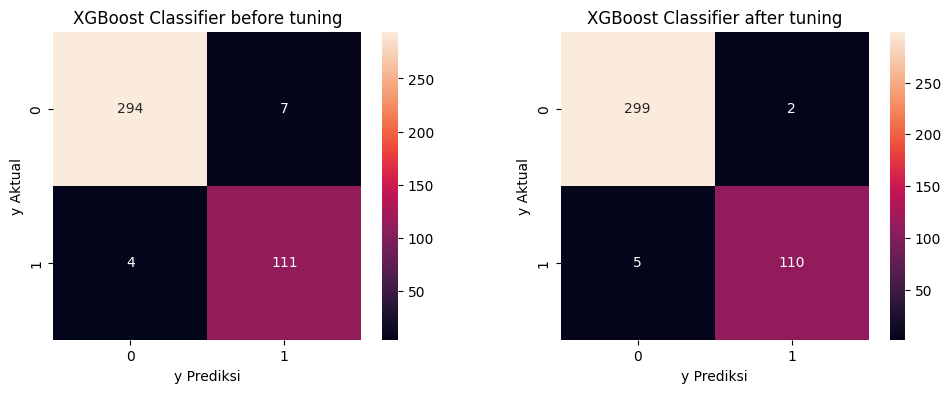

In [433]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('XGBoost Classifier before tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_xgbc_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('XGBoost Classifier after tuning');

**Penjelasan:**

|Metrics Evaluation||
|---|---|
|**True Positive (TP)**| Customer diprediksi dan kenyataannya melakukan churn|
| **False Positive (FP)** |Customer diprediksi melakukan churn, namun pada kenyataannya customer tidak melakukan churn|
| **False Negative (FN)**| Customer diprediksi tidak melakukan churn, namun pada kenyataannya customer melakukan churn|
| **True Negative (TN)**| Customer diprediksi dan kenyataannya tidak melakukan churn|

- True Positives (TP): Kasus yang diprediksi positif dan sebenarnya positif (y Prediksi = 1, y Aktual = 1)
- False Positives (FP): Kasus yang diprediksi positif tetapi sebenarnya negatif (y Prediksi = 1, y Aktual = 0)
- True Negatives (TN): Kasus yang diprediksi negatif dan sebenarnya negatif (y Prediksi = 0, y Aktual = 0)
- False Negatives (FN): Kasus yang diprediksi negatif tetapi sebenarnya positif (y Prediksi = 0, y Aktual = 1)

In [434]:
# Metrics before tuning
TP_before = 111  # True Positives before tuning
FP_before = 7  # False Positives before tuning
TN_before = 294  # True Negatives before tuning
FN_before = 4   # False Negatives before tuning

# Metrics after tuning
TP_after = 110   # True Positives after tuning
FP_after = 2    # False Positives after tuning
TN_after = 299   # True Negatives after tuning
FN_after = 5    # False Negatives after tuning

total_customers = 416


In [435]:
def calculate_metrics(TP, FP, TN, FN, total):
    accuracy = (TP + TN) / total
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)
    f2_score = 5 * (precision * recall) / (4 * precision + recall)
    false_positive_rate = FP / (FP + TN)
    false_negative_rate = FN / (FN + TP)
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall (Sensitivity)': recall,
        'Specificity': specificity,
        'F1 Score': f1_score,
        'F2 Score': f2_score,
        'False Positive Rate': false_positive_rate,
        'False Negative Rate': false_negative_rate
    }

In [436]:
# Calculate metrics before tuning
before_tuning = calculate_metrics(TP_before, FP_before, TN_before, FN_before, total_customers)

# Calculate metrics after tuning
after_tuning = calculate_metrics(TP_after, FP_after, TN_after, FN_after, total_customers)

# Print results
print("Metrik sebelum tuning:")
for metric, value in before_tuning.items():
    print(f"{metric}: {value:.4f}")

print("\nMetrik setelah tuning:")
for metric, value in after_tuning.items():
    print(f"{metric}: {value:.4f}")

# Calculate and print changes
print("\nPerubahan metrik (setelah - sebelum):")
for metric in before_tuning.keys():
    change = after_tuning[metric] - before_tuning[metric]
    print(f"{metric}: {change:.4f}")

Metrik sebelum tuning:
Accuracy: 0.9736
Precision: 0.9407
Recall (Sensitivity): 0.9652
Specificity: 0.9767
F1 Score: 0.9528
F2 Score: 0.9602
False Positive Rate: 0.0233
False Negative Rate: 0.0348

Metrik setelah tuning:
Accuracy: 0.9832
Precision: 0.9821
Recall (Sensitivity): 0.9565
Specificity: 0.9934
F1 Score: 0.9692
F2 Score: 0.9615
False Positive Rate: 0.0066
False Negative Rate: 0.0435

Perubahan metrik (setelah - sebelum):
Accuracy: 0.0096
Precision: 0.0415
Recall (Sensitivity): -0.0087
Specificity: 0.0166
F1 Score: 0.0164
F2 Score: 0.0013
False Positive Rate: -0.0166
False Negative Rate: 0.0087


Untuk memilih model terbaik berdasarkan `F2 Score`, mari kita analisis hasil yang diberikan. F2 Score adalah metrik yang lebih memprioritaskan recall (sensitivity) dibandingkan precision. Hal ini penting ketika *False negatives* lebih berdampak daripada *False Positives*. 

**Analisis dan Pilihan Model:**

**F2 Score:**
   - Sebelum Tuning: 0.9602
   - Setelah Tuning: 0.9615
   - Perubahan: +0.0013

   F2 Score naik setelah tuning, menunjukkan bahwa model setelah tuning memiliki performa yang lebih baik dalam menangani false negatives, yang penting jika recall lebih diprioritaskan.

Dengan mempertimbangkan `F2 Score` dan dampak dari `False Negatives`, **model setelah tuning** lebih direkomendasikan untuk digunakan.

**Classification Report**

In [437]:
from sklearn.metrics import classification_report

report_default = classification_report(y_test, y_pred)
report_tuned = classification_report(y_test, y_pred_xgbc_tuning)

print('Classification Report Default XGB : \n', report_default)
print('Classification Report Tuned XGB : \n', report_tuned)

Classification Report Default XGB : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       301
           1       0.94      0.97      0.95       115

    accuracy                           0.97       416
   macro avg       0.96      0.97      0.97       416
weighted avg       0.97      0.97      0.97       416

Classification Report Tuned XGB : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       301
           1       0.98      0.96      0.97       115

    accuracy                           0.98       416
   macro avg       0.98      0.97      0.98       416
weighted avg       0.98      0.98      0.98       416



#### **7.6. Explainable Machine Learning**

**Melihat Nilai dari Feature Importance**

In [438]:
xgbc_tuning['model'].feature_importances_

array([0.        , 0.12744139, 0.04290992, 0.02389071, 0.02028193,
       0.02912102, 0.03697637, 0.04065771, 0.25661168, 0.02420363,
       0.02063243, 0.02541158, 0.03707021, 0.02592574, 0.03150856,
       0.03052901, 0.025364  , 0.06316198, 0.03414903, 0.02292894,
       0.02854924, 0.05267497], dtype=float32)

In [439]:
xgbc_tuning['transformer'].transformers_[0][1][1].get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12'], dtype=object)

Terdapat konstanta = 1 hasil dari polynomial

In [440]:
feat_scale = xgbc_tuning['transformer'].transformers_[0][2]
feat_onehot = list(xgbc_tuning['transformer'].transformers_[1][1].get_feature_names_out())

if len(xgbc_tuning['transformer'].transformers_) > 2:
    feat_remainder = list(X.columns[xgbc_tuning['transformer'].transformers_[2][2]])
else:
    feat_remainder = []

feat = [1] + feat_scale + feat_onehot + feat_remainder
feat

[1,
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferredLoginDevice_Mobile Phone',
 'PreferredPaymentMode_Credit Card',
 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet',
 'PreferredPaymentMode_UPI',
 'Gender_Male',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

**Membuat DataFrame untuk melihat `Feature Importance`**

In [441]:
imp = pd.DataFrame({
    'feature':feat,
    'importance':xgbc_tuning['model'].feature_importances_
}).sort_values('importance', ascending=False)

imp

feature  importance
8                            Complain    0.256612
1                              Tenure    0.127441
17      PreferredPaymentMode_E wallet    0.063162
21               MaritalStatus_Single    0.052675
2                            CityTier    0.042910
7                     NumberOfAddress    0.040658
12                  DaySinceLastOrder    0.037070
6                   SatisfactionScore    0.036976
18           PreferredPaymentMode_UPI    0.034149
14  PreferredLoginDevice_Mobile Phone    0.031509
15   PreferredPaymentMode_Credit Card    0.030529
5            NumberOfDeviceRegistered    0.029121
20              MaritalStatus_Married    0.028549
13                     CashbackAmount    0.025926
11                         OrderCount    0.025412
16    PreferredPaymentMode_Debit Card    0.025364
9         OrderAmountHikeFromlastYear    0.024204
3                     WarehouseToHome    0.023891
19                        Gender_Male    0.022929
10                         CouponUsed    0.020632
4                      HourSpendOnApp    0.020282
0                                   1    0.000000

**Membuat barplot untuk melakukan visualisasi terhadap feature importance**

Text(0.5, 1.0, 'Feature Importance')

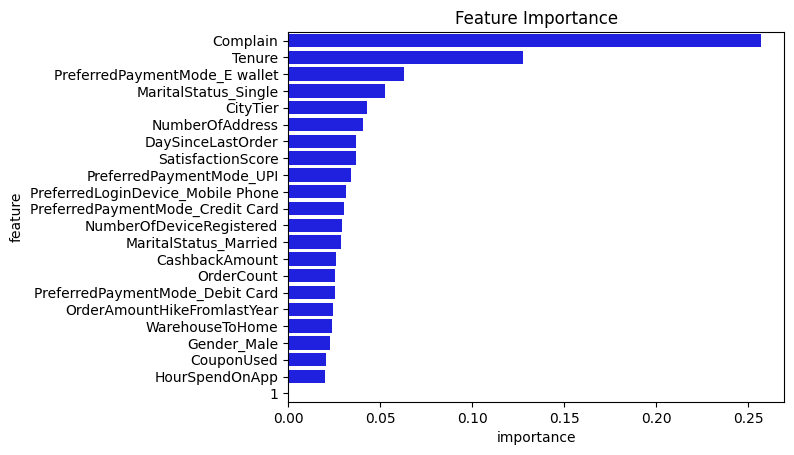

In [442]:
sns.barplot(data=imp, y='feature', x='importance', color='b')
plt.title('Feature Importance')

**Shapley Value of Explanations (SHAP)**

In [443]:
my_model = xgbc_tuning[-1]
my_data = xgbc_tuning[0].fit_transform(X_train)

explainer = shap.TreeExplainer(
    model = my_model,
    data = my_data
)

shap_values = explainer.shap_values(my_data)

 99%|===================| 1647/1664 [00:12<00:00]        

**Menampilkan feature yang paling memengaruhi churn**

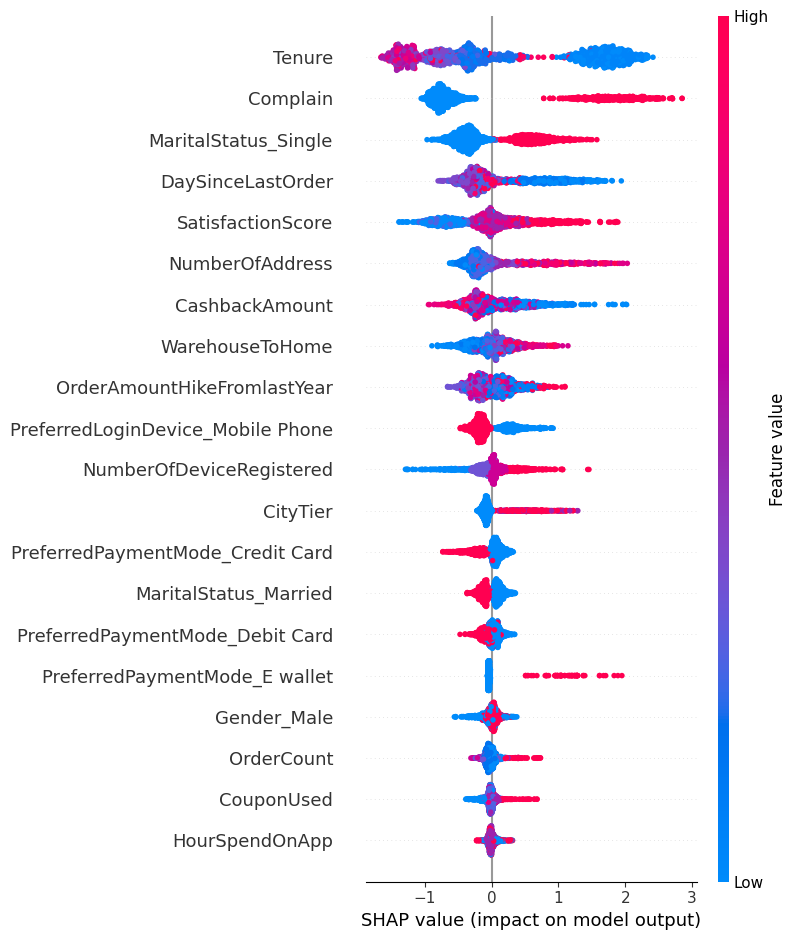

In [444]:
shap.summary_plot(shap_values, my_data, feature_names = feat)

**Barplot Tenure**

<Axes: xlabel='Churn', ylabel='Tenure'>

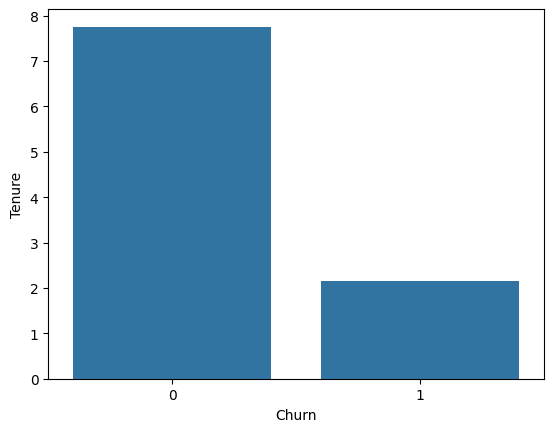

In [445]:
sns.barplot(x='Churn', y='Tenure', data=data, errorbar=None)

**Barplot Complain**

<Axes: xlabel='Churn', ylabel='Complain'>

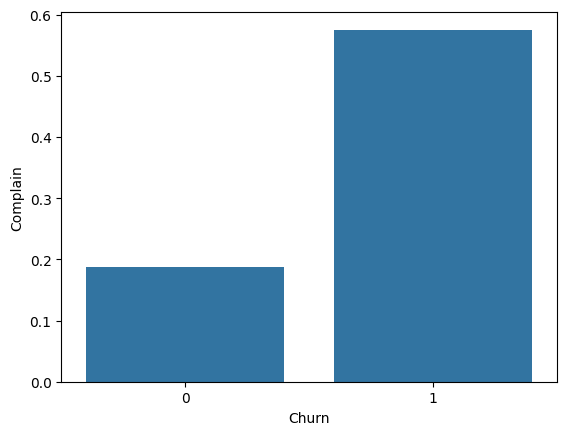

In [446]:
sns.barplot(x='Churn', y='Complain', data=data, errorbar=None)

#### **7.7. Save Final Model**

In [447]:
import pickle

**Menyimpan Model - XGBoost Classifier setelah di Tunning**

In [448]:
xgbc_tuning = random_xgbc.best_estimator_
xgbc_tuning

xgbc_tuning.fit(X, y)

pickle.dump(xgbc_tuning, open('finalmodel_xgboost.sav', 'wb'))

-------------
#**Prediction to Customer with Final Model**

**Load Model**

In [449]:
model = pickle.load(open('finalmodel_xgboost.sav', 'rb'))
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_impute_robust',
                                                  Pipeline(steps=[('median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'CityTier',
                                                   'WarehouseToHome',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAdd...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.09999999999999999, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=77,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=84,
                               n_jobs=None, num_parallel_tree=None, ...))])

**Prediksi Customer pada Dataset - Customer index 19 yang akan diprediksi**

In [450]:
X.iloc[[19], :]

Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
39     0.0             Computer         1              NaN   

   PreferredPaymentMode Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
39          Credit Card   Male             3.0                         4   

   PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
39     Mobile Phone                  3       Married                2   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
39         1                         15.0         0.0         1.0   

    DaySinceLastOrder  CashbackAmount  
39                1.0          125.66

**Melakukan predict pada seorang customer**

In [451]:
model.predict(X.iloc[[19], :])

array([0])

**Validasi Prediksi dari `Model`**

In [452]:
y[19]

1

**Memprediksi Customer baru - Membuat customer baru dengan memasukkan data-data customer baru pada DataFrame**

In [453]:
new_cust = pd.DataFrame({
    'Tenure': [5],
    'PreferredLoginDevice': ['Mobile Phone'],
    'CityTier': [2],
    'WarehouseToHome': [22],
    'PreferredPaymentMode': ['Credit Card'],
    'Gender': ['Male'],
    'HourSpendOnApp': [3],
    'NumberOfDeviceRegistered': [3],
    'PreferedOrderCat': ['Mobile Phone'],
    'SatisfactionScore': [3],
    'MaritalStatus': ['Single'],
    'NumberOfAddress': [10],
    'Complain': [0],
    'OrderAmountHikeFromlastYear': [20],
    'CouponUsed': [1],
    'OrderCount': [15],
    'DaySinceLastOrder': [11],
    'CashbackAmount': [155]
})

new_cust

Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       5         Mobile Phone         2               22   

  PreferredPaymentMode Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0          Credit Card   Male               3                         3   

  PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Mobile Phone                  3        Single               10   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         0                           20           1          15   

   DaySinceLastOrder  CashbackAmount  
0                 11             155

**Melakukan predict pada seorang customer baru**

In [454]:
model.predict(new_cust)

array([0])

#### **7.8. Prediksi Model pada Data Test**

In [455]:
X_test

Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
2016     NaN         Mobile Phone         1             16.0   
2837     1.0         Mobile Phone         3             29.0   
373      0.0         Mobile Phone         1             12.0   
4851    14.0             Computer         1             16.0   
5287     1.0         Mobile Phone         1             17.0   
...      ...                  ...       ...              ...   
2345    25.0         Mobile Phone         1             14.0   
1491     3.0         Mobile Phone         1              8.0   
2015     0.0         Mobile Phone         1              NaN   
785      NaN         Mobile Phone         1              6.0   
1045     0.0             Computer         1              NaN   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
2016           Debit Card    Male             2.0                         3   
2837             E wallet    Male             3.0                         4   
373           Credit Card    Male             NaN                         3   
4851          Credit Card    Male             3.0                         4   
5287     Cash on Delivery    Male             3.0                         2   
...                   ...     ...             ...                       ...   
2345                  UPI  Female             NaN                         3   
1491          Credit Card    Male             NaN                         4   
2015           Debit Card  Female             3.0                         3   
785            Debit Card    Male             2.0                         3   
1045          Credit Card    Male             2.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
2016     Mobile Phone                  4       Married                2   
2837     Mobile Phone                  3        Single                3   
373      Mobile Phone                  3      Divorced                1   
4851     Mobile Phone                  4       Married               10   
5287     Mobile Phone                  3       Married                4   
...               ...                ...           ...              ...   
2345     Mobile Phone                  5       Married               10   
1491     Mobile Phone                  1        Single                1   
2015     Mobile Phone                  3        Single                2   
785      Mobile Phone                  3      Divorced                2   
1045     Mobile Phone                  1        Single                3   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
2016         0                         14.0         1.0         1.0   
2837         1                         20.0         1.0         2.0   
373          0                         20.0         2.0         2.0   
4851         1                         15.0         1.0         2.0   
5287         0                         17.0         1.0         3.0   
...        ...                          ...         ...         ...   
2345         0                         13.0         1.0         1.0   
1491         0                         13.0         0.0         1.0   
2015         0                         19.0         0.0         1.0   
785          0                         22.0         0.0         1.0   
1045         0                         13.0         0.0         1.0   

      DaySinceLastOrder  CashbackAmount  
2016                0.0          120.08  
2837                1.0          141.75  
373                 2.0          127.73  
4851                1.0          161.17  
5287                3.0          145.73  
...                 ...             ...  
2345                4.0          129.50  
1491                2.0          127.20  
2015                0.0          123.18  
785                 1.0          112.23  
1045                2.0          125.80  

[416 rows x 18 columns]

In [456]:
model.predict(X_test)

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

**Mencopy Data Test untuk dilakukan Predict model dan melihat Predict Proba**

In [457]:
data_test = X_test.copy()
data_test.reset_index(inplace=True)
data_test

index  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0     2016     NaN         Mobile Phone         1             16.0   
1     2837     1.0         Mobile Phone         3             29.0   
2      373     0.0         Mobile Phone         1             12.0   
3     4851    14.0             Computer         1             16.0   
4     5287     1.0         Mobile Phone         1             17.0   
..     ...     ...                  ...       ...              ...   
411   2345    25.0         Mobile Phone         1             14.0   
412   1491     3.0         Mobile Phone         1              8.0   
413   2015     0.0         Mobile Phone         1              NaN   
414    785     NaN         Mobile Phone         1              6.0   
415   1045     0.0             Computer         1              NaN   

    PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0             Debit Card    Male             2.0                         3   
1               E wallet    Male             3.0                         4   
2            Credit Card    Male             NaN                         3   
3            Credit Card    Male             3.0                         4   
4       Cash on Delivery    Male             3.0                         2   
..                   ...     ...             ...                       ...   
411                  UPI  Female             NaN                         3   
412          Credit Card    Male             NaN                         4   
413           Debit Card  Female             3.0                         3   
414           Debit Card    Male             2.0                         3   
415          Credit Card    Male             2.0                         3   

    PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0       Mobile Phone                  4       Married                2   
1       Mobile Phone                  3        Single                3   
2       Mobile Phone                  3      Divorced                1   
3       Mobile Phone                  4       Married               10   
4       Mobile Phone                  3       Married                4   
..               ...                ...           ...              ...   
411     Mobile Phone                  5       Married               10   
412     Mobile Phone                  1        Single                1   
413     Mobile Phone                  3        Single                2   
414     Mobile Phone                  3      Divorced                2   
415     Mobile Phone                  1        Single                3   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0           0                         14.0         1.0         1.0   
1           1                         20.0         1.0         2.0   
2           0                         20.0         2.0         2.0   
3           1                         15.0         1.0         2.0   
4           0                         17.0         1.0         3.0   
..        ...                          ...         ...         ...   
411         0                         13.0         1.0         1.0   
412         0                         13.0         0.0         1.0   
413         0                         19.0         0.0         1.0   
414         0                         22.0         0.0         1.0   
415         0                         13.0         0.0         1.0   

     DaySinceLastOrder  CashbackAmount  
0                  0.0          120.08  
1                  1.0          141.75  
2                  2.0          127.73  
3                  1.0          161.17  
4                  3.0          145.73  
..                 ...             ...  
411                4.0          129.50  
412                2.0          127.20  
413                0.0          123.18  
414                1.0          112.23  
415                2.0          125.80  

[416

**Menambahkan kolom baru `PrediksiChurn`, `PrediksiProbaChurn`, `AktualChurn` pada  **data_test****

In [458]:
data_test['PrediksiChurn'] = pd.DataFrame(model.predict(data_test)).reset_index(drop=True)
data_test['PrediksiProbaChurn'] = pd.DataFrame(model.predict_proba(data_test))[1]
data_test['AktualChurn'] = y_test.reset_index(drop=True)
data_test

index  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0     2016     NaN         Mobile Phone         1             16.0   
1     2837     1.0         Mobile Phone         3             29.0   
2      373     0.0         Mobile Phone         1             12.0   
3     4851    14.0             Computer         1             16.0   
4     5287     1.0         Mobile Phone         1             17.0   
..     ...     ...                  ...       ...              ...   
411   2345    25.0         Mobile Phone         1             14.0   
412   1491     3.0         Mobile Phone         1              8.0   
413   2015     0.0         Mobile Phone         1              NaN   
414    785     NaN         Mobile Phone         1              6.0   
415   1045     0.0             Computer         1              NaN   

    PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0             Debit Card    Male             2.0                         3   
1               E wallet    Male             3.0                         4   
2            Credit Card    Male             NaN                         3   
3            Credit Card    Male             3.0                         4   
4       Cash on Delivery    Male             3.0                         2   
..                   ...     ...             ...                       ...   
411                  UPI  Female             NaN                         3   
412          Credit Card    Male             NaN                         4   
413           Debit Card  Female             3.0                         3   
414           Debit Card    Male             2.0                         3   
415          Credit Card    Male             2.0                         3   

    PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0       Mobile Phone                  4       Married                2   
1       Mobile Phone                  3        Single                3   
2       Mobile Phone                  3      Divorced                1   
3       Mobile Phone                  4       Married               10   
4       Mobile Phone                  3       Married                4   
..               ...                ...           ...              ...   
411     Mobile Phone                  5       Married               10   
412     Mobile Phone                  1        Single                1   
413     Mobile Phone                  3        Single                2   
414     Mobile Phone                  3      Divorced                2   
415     Mobile Phone                  1        Single                3   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0           0                         14.0         1.0         1.0   
1           1                         20.0         1.0         2.0   
2           0                         20.0         2.0         2.0   
3           1                         15.0         1.0         2.0   
4           0                         17.0         1.0         3.0   
..        ...                          ...         ...         ...   
411         0                         13.0         1.0         1.0   
412         0                         13.0         0.0         1.0   
413         0                         19.0         0.0         1.0   
414         0                         22.0         0.0         1.0   
415         0                         13.0         0.0         1.0   

     DaySinceLastOrder  CashbackAmount  PrediksiChurn  PrediksiProbaChurn  \
0                  0.0          120.08              0            0.030585   
1                  1.0          141.75              1            0.995675   
2                  2.0          127.73              0            0.081362   
3                  1.0          161.17              0            0.027743   
4                  3.0          145.73              0            0.011325   
..                 ...             

**Melakukan pengelompokan pada data test deng `Bin` Predict Proba ``PrediksiProbaChurn``**

In [459]:
data_test['BinProba']=pd.qcut(data_test['PrediksiProbaChurn'], 4)
data_test.sample(5)

index  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
212    629     6.0             Computer         3              NaN   
161   5598     1.0             Computer         3             16.0   
141   1593    10.0         Mobile Phone         1              6.0   
54    2871     8.0         Mobile Phone         1             34.0   
234   2012     4.0         Mobile Phone         1              8.0   

    PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
212           Debit Card  Female             2.0                         4   
161             E wallet    Male             3.0                         4   
141          Credit Card  Female             2.0                         4   
54           Credit Card  Female             4.0                         4   
234           Debit Card  Female             NaN                         5   

    PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
212     Mobile Phone                  2        Single                1   
161     Mobile Phone                  5       Married                3   
141     Mobile Phone                  5       Married                3   
54      Mobile Phone                  4        Single                4   
234     Mobile Phone                  1       Married                5   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
212         0                         19.0         2.0         2.0   
161         0                         20.0         2.0         2.0   
141         0                         14.0         0.0         1.0   
54          0                         16.0         2.0         2.0   
234         1                         13.0         0.0         1.0   

     DaySinceLastOrder  CashbackAmount  PrediksiChurn  PrediksiProbaChurn  \
212                2.0          123.42              0            0.008710   
161                1.0          142.90              1            0.989806   
141                2.0          139.20              0            0.001837   
54                 3.0          148.11              0            0.003571   
234                0.0          127.78              1            0.946290   

     AktualChurn                            BinProba  
212            0                   (0.00822, 0.0279]  
161            1                      (0.938, 0.996]  
141            0  (-0.00012100000000000001, 0.00822]  
54             0  (-0.00012100000000000001, 0.00822]  
234            1                      (0.938, 0.996]

**Melihat Mean dari `PrediksiProbaChurn` dan `AktualChurn` pada data_test**

In [460]:
data_test_agg=data_test.groupby(['BinProba'])[['PrediksiProbaChurn', 'AktualChurn']].describe()[[('PrediksiProbaChurn', 'count'), ('PrediksiProbaChurn', 'mean'), ('AktualChurn', 'mean')]]
data_test_agg

PrediksiProbaChurn           AktualChurn
                                                count      mean        mean
BinProba                                                                   
(-0.00012100000000000001, 0.00822]              105.0  0.004437    0.000000
(0.00822, 0.0279]                               103.0  0.015967    0.000000
(0.0279, 0.938]                                 104.0  0.147356    0.105769
(0.938, 0.996]                                  104.0  0.975399    1.000000

**Kesimpulan:**

**Analisis dan Prioritas:**
Berdasarkan visualisasi dan distribusi `PrediksiProbaChurn`, berikut adalah analisis dan tingkat prioritas dalam memberikan promosi:

1. **Pelanggan dengan `BinProba` Tertinggi (0.895 - 0.985)**:
   - **Analisis**: Pelanggan dalam kelompok ini menunjukkan probabilitas churn yang sangat tinggi. Mereka hampir pasti akan churn jika tidak ada intervensi. Kelompok ini harus menjadi fokus utama dalam upaya retensi karena mereka berada dalam risiko tertinggi.
   - **Tingkat Prioritas**: **Sangat Tinggi**
   - **Tindakan**: Segera berikan promo atau insentif yang menarik, seperti diskon besar, layanan premium gratis, atau program loyalitas khusus. Perhatikan bahwa tindakan cepat dan tepat sasaran sangat penting untuk mencegah churn dalam kelompok ini.

2. **Pelanggan dengan `BinProba` Menengah (0.053 - 0.895)**:
   - **Analisis**: Kelompok ini memiliki probabilitas churn yang lebih rendah dibandingkan dengan kelompok pertama, tetapi masih cukup signifikan. Tindakan proaktif tetap diperlukan untuk memastikan mereka tidak berpindah ke kompetitor.
   - **Tingkat Prioritas**: **Tinggi**
   - **Tindakan**: Berikan promosi yang bersifat moderat, seperti diskon sedang atau layanan tambahan, untuk menjaga kepuasan dan loyalitas mereka.

3. **Pelanggan dengan `BinProba` Rendah (0.0213 - 0.053)**:
   - **Analisis**: Pelanggan di kelompok ini memiliki risiko churn yang relatif rendah. Meskipun begitu, mempertahankan kepuasan mereka tetap penting, meski intensitas promosi tidak perlu sebesar pada kelompok dengan risiko yang lebih tinggi.
   - **Tingkat Prioritas**: **Sedang**
   - **Tindakan**: Berikan penawaran atau promo standar, seperti diskon kecil atau hadiah kecil pada pembelian berikutnya, sebagai bentuk apresiasi.

4. **Pelanggan dengan `BinProba` Sangat Rendah (0.00654 - 0.0213)**:
   - **Analisis**: Kelompok ini memiliki risiko churn yang sangat rendah. Mereka mungkin sudah cukup loyal terhadap produk atau layanan yang diberikan. Tindakan promosi dapat dilakukan, namun tidak perlu menjadi fokus utama.
   - **Tingkat Prioritas**: **Rendah**
   - **Tindakan**: Cukup berikan promo yang bersifat umum, atau gunakan strategi loyalitas jangka panjang tanpa perlu melakukan tindakan agresif.

**Prioritas Tindakan:**
1. **Utamakan pelanggan di `BinProba` tertinggi (0.895 - 0.985)** dengan promosi yang agresif dan tepat sasaran. Ini adalah kelompok yang paling berisiko, sehingga tindakan cepat dan efektif akan memiliki dampak terbesar dalam mengurangi churn.
2. **Lakukan promosi moderat pada pelanggan di `BinProba` menengah (0.053 - 0.895)** untuk menjaga loyalitas mereka dan mencegah pergeseran mereka ke kelompok dengan risiko lebih tinggi.
3. **Pertahankan strategi dasar untuk pelanggan di `BinProba` rendah (0.0213 - 0.053)** dan **sangat rendah (0.00654 - 0.0213)**, namun dengan intensitas promosi yang lebih rendah. Fokus lebih pada menjaga kepuasan pelanggan melalui kualitas layanan dan komunikasi yang baik.

Dengan mengikuti prioritas ini, perusahaan dapat lebih efektif mengalokasikan sumber daya untuk mengurangi churn, mempertahankan pelanggan, dan meningkatkan loyalitas jangka panjang.

### **8. Impact Business**

|Metrics Evaluation||
|---|---|
|**True Positive (TP)**| Customer diprediksi dan kenyataannya melakukan churn|
| **False Positive (FP)** |Customer diprediksi melakukan churn, namun pada kenyataannya customer tidak melakukan churn|
| **False Negative (FN)**| Customer diprediksi tidak melakukan churn, namun pada kenyataannya customer melakukan churn|
| **True Negative (TN)**| Customer diprediksi dan kenyataannya tidak melakukan churn|

**Mendifinisakan `Perkiraan Biaya` untuk False Positive dan False Negative**

In [461]:
cost_FP = 200 #biaya
cost_FN = 600 #biaya

**Prediksi jika Perusahaan menggunakan `Analisa RFM`**

In [462]:
df_test = df_test[df_test['PreferedOrderCat'] == 'Mobile Phone']
df_test


CustomerID  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
4869       54870     1.0             Computer         1             16.0   
3430       53431     9.0         Mobile Phone         1             17.0   
1850       51851     0.0         Mobile Phone         1             12.0   
2285       52286     2.0         Mobile Phone         1             29.0   
4707       54708     6.0             Computer         1             26.0   
...          ...     ...                  ...       ...              ...   
627        50628     0.0         Mobile Phone         1             22.0   
761        50762     3.0         Mobile Phone         1              6.0   
1944       51945     3.0         Mobile Phone         2             19.0   
4517       54518     1.0             Computer         3              7.0   
1266       51267    11.0         Mobile Phone         3              6.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
4869          Credit Card    Male             3.0                         5   
3430                  UPI    Male             3.0                         4   
1850           Debit Card  Female             3.0                         3   
2285          Credit Card    Male             3.0                         3   
4707          Credit Card    Male             3.0                         2   
...                   ...     ...             ...                       ...   
627            Debit Card  Female             3.0                         1   
761           Credit Card    Male             3.0                         3   
1944                  UPI    Male             2.0                         3   
4517     Cash on Delivery  Female             4.0                         5   
1266           Debit Card    Male             3.0                         4   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
4869     Mobile Phone                  5        Single                2   
3430     Mobile Phone                  2       Married                3   
1850     Mobile Phone                  1       Married                2   
2285     Mobile Phone                  5        Single                1   
4707     Mobile Phone                  3       Married                8   
...               ...                ...           ...              ...   
627      Mobile Phone                  5        Single                2   
761      Mobile Phone                  4      Divorced                1   
1944     Mobile Phone                  4       Married                5   
4517     Mobile Phone                  4        Single                3   
1266     Mobile Phone                  5        Single                5   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
4869         1                         23.0         1.0         2.0   
3430         0                         21.0         2.0         2.0   
1850         1                         13.0         0.0         1.0   
2285         0                         13.0         0.0         1.0   
4707         1                         13.0         1.0         3.0   
...        ...                          ...         ...         ...   
627          0                         16.0        15.0        15.0   
761          1                         21.0         1.0         5.0   
1944         0                         13.0         1.0         1.0   
4517         1                         12.0         2.0         2.0   
1266         0                         14.0         0.0         1.0   

      DaySinceLastOrder  CashbackAmount  Churn  
4869                3.0          148.21      1  
3430                3.0          164.17      0  
1850                2.0           56.00      0  
2285                3.0          139.04      1  
4707                3.0          152.59      1  
...                 ...             ...    ...  
627                14.0          127.43      1 

In [463]:
df_recency = df_test[['CustomerID', 'DaySinceLastOrder']].rename(columns = {'DaySinceLastOrder': 'Recency'})
df_frequency = df_test[['CustomerID', 'OrderCount']].rename(columns = {'OrderCount': 'Frequency'})
df_monetary = df_test[['CustomerID', 'CashbackAmount']].rename(columns = {'CashbackAmount': 'Monetary'})
df_churn = df_test[['CustomerID', 'Churn']]

df_rfm = df_recency.merge(df_frequency, on = 'CustomerID').merge(df_monetary, on = 'CustomerID').merge(df_churn, on = 'CustomerID')

df_rfm['R Rank'] = df_rfm['Recency'].rank(ascending = False)
df_rfm['F Rank'] = df_rfm['Frequency'].rank(ascending = True)
df_rfm['M Rank'] = df_rfm['Monetary'].rank(ascending = True)

df_rfm['R Rank (Normalized)'] = (df_rfm['R Rank'] / df_rfm['R Rank'].max()) * 100
df_rfm['F Rank (Normalized)'] = (df_rfm['F Rank'] / df_rfm['F Rank'].max()) * 100
df_rfm['M Rank (Normalized)'] = (df_rfm['M Rank'] / df_rfm['M Rank'].max()) * 100
df_rfm.drop(columns = ['R Rank', 'F Rank', 'M Rank'], inplace = True)

rfm_scale = 0.05
df_rfm['R Score'] = df_rfm['R Rank (Normalized)'] * rfm_scale
df_rfm['F Score'] = df_rfm['F Rank (Normalized)'] * rfm_scale
df_rfm['M Score'] = df_rfm['M Rank (Normalized)'] * rfm_scale

df_rfm = df_rfm.round(1)
df_rfm['Segment'] = np.where((df_rfm['R Score'] >= 4) & (df_rfm['F Score'] >= 4) & (df_rfm['M Score'] >= 4), 'Champions',
                   np.where((df_rfm['F Score'] >= 4) & (df_rfm['M Score'] >= 4), 'Loyal Customers',
                   np.where((df_rfm['R Score'] >= 4) & (df_rfm['F Score'] >= 3) & (df_rfm['M Score'] <= 2), 'Potential Loyalists',
                   np.where((df_rfm['R Score'] >= 4) & (df_rfm['F Score'] <= 2) & (df_rfm['M Score'] <= 2), 'New Customers',
                   np.where((df_rfm['R Score'] <= 2) & (df_rfm['F Score'] >= 4) & (df_rfm['M Score'] >= 3), 'At Risk',
                   np.where((df_rfm['R Score'] <= 2) & (df_rfm['F Score'] >= 3) & (df_rfm['M Score'] >= 4), 'Can’t Lose Them',
                   np.where((df_rfm['R Score'] <= 2) & (df_rfm['F Score'] <= 2) & (df_rfm['M Score'] <= 2), 'Lost',
                   np.where((df_rfm['R Score'] <= 3) & (df_rfm['F Score'] <= 3) & (df_rfm['M Score'] <= 3), 'Hibernating', 'Other'))))))))

In [464]:
df_rfm[['CustomerID', 'R Score', 'F Score', 'M Score', 'Segment', 'Churn']].head()

CustomerID  R Score  F Score  M Score          Segment  Churn
0       54870      2.0      3.0      3.3            Other      1
1       53431      2.0      3.0      4.8  Can’t Lose Them      0
2       51851      3.2      1.0      0.0            Other      0
3       52286      2.0      1.0      2.4      Hibernating      1
4       54708      2.0      4.3      3.8          At Risk      1

In [465]:
df_rfm['PredictedChurn'] = np.where(df_rfm['Segment'].isin(['At Risk', 'Lost', 'Hibernating', 'Can’t Lose Them']), 1, 0)

df_rfm['Metric'] = np.where((df_rfm['Churn'] == 0) & (df_rfm['PredictedChurn'] == 0), 'TN',
                   np.where((df_rfm['Churn'] == 0) & (df_rfm['PredictedChurn'] == 1), 'FP',
                   np.where((df_rfm['Churn'] == 1) & (df_rfm['PredictedChurn'] == 0), 'FN', 'TP')))

df_rfm

CustomerID  Recency  Frequency  Monetary  Churn  R Rank (Normalized)  \
0         54870      3.0        2.0     148.2      1                 39.6   
1         53431      3.0        2.0     164.2      0                 39.6   
2         51851      2.0        1.0      56.0      0                 64.1   
3         52286      3.0        1.0     139.0      1                 39.6   
4         54708      3.0        3.0     152.6      1                 39.6   
..          ...      ...        ...       ...    ...                  ...   
422       50628     14.0       15.0     127.4      1                  0.7   
423       50762      7.0        5.0     135.8      0                 12.9   
424       51945      4.0        1.0     121.4      0                 24.2   
425       54518      3.0        2.0     146.7      1                 39.6   
426       51267      0.0        1.0     128.6      0                100.0   

     F Rank (Normalized)  M Rank (Normalized)  R Score  F Score  M Score  \
0                   60.5                 65.5      2.0      3.0      3.3   
1                   60.5                 95.8      2.0      3.0      4.8   
2                   19.6                  0.5      3.2      1.0      0.0   
3                   19.6                 47.5      2.0      1.0      2.4   
4                   85.8                 76.8      2.0      4.3      3.8   
..                   ...                  ...      ...      ...      ...   
422                100.0                 24.9      0.0      5.0      1.2   
423                 93.0                 41.2      0.6      4.6      2.1   
424                 19.6                  6.8      1.2      1.0      0.3   
425                 60.5                 59.3      2.0      3.0      3.0   
426                 19.6                 29.5      5.0      1.0      1.5   

             Segment  PredictedChurn Metric  
0              Other               0     FN  
1    Can’t Lose Them               1     FP  
2              Other               0     TN  
3        Hibernating               1     TP  
4            At Risk               1     TP  
..               ...             ...    ...  
422            Other               0     FN  
423            Other               0     TN  
424             Lost               1     FP  
425      Hibernating               1     TP  
426    New Customers               0     TN  

[427 rows x 14 columns]

In [466]:
df_rfm['Metric'].value_counts()

Metric
TN    211
FP     98
FN     87
TP     31
Name: count, dtype: int64

In [467]:
rfm_TN = 211
rfm_FP = 98
rfm_FN = 87
rfm_TP = 31

**Prediksi biaya tidak tepat guna jika Perusahaan menggunakan `Prediksi RFM`**

In [468]:
cost_FP_rfm = rfm_FP * cost_FP
cost_FN_rfm = rfm_FN * cost_FN
total_rfm = cost_FP_rfm + cost_FN_rfm

total_rfm

71800

**Prediksi biaya tidak tepat guna jika Perusahaan menggunakan `Prediksi Machine Learning`**

In [469]:
cost_FP_after = FP_after * cost_FP
cost_FN_after = FN_after * cost_FN
total_loss_with_ml = cost_FP_after + cost_FN_after

total_loss_with_ml

3400

In [470]:
cost_reduction = total_rfm - total_loss_with_ml
percentage_reduction = (cost_reduction / total_rfm) * 100

In [471]:
print("\nImpact Bisnis:")
print(f"Biaya Tidak Tepat Guna Dengan RFM : ${total_rfm}")
print(f"Biaya Tidak Tepat Guna Dengan Machine Learning: ${total_loss_with_ml}")
print(f"Persentase Pengurangan Kerugian Setelah Menggunakan Machine Learning: {percentage_reduction:.2f}%")


Impact Bisnis:
Biaya Tidak Tepat Guna Dengan RFM : $71800
Biaya Tidak Tepat Guna Dengan Machine Learning: $3400
Persentase Pengurangan Kerugian Setelah Menggunakan Machine Learning: 95.26%


#### **9. Conclusion and Recommendations**

##### **9.1 Conclusion**

**9.1.1 Data Analysis**

Setelah melakukan analisa secara mendalam terkait hubungan average churn rate, total cashback amount, hingga average cashback amount terhadap seluruh klasifikasi yang tersedia seperti preferred login device, gender, satisfaction score, dan sebagainya, kita menemukan bahwa manajemen melakukan dua kesalahan mendasar dalam hal strategi pemasaran, yaitu:

a. pemberian cashback yang flat bahkan cenderung meningkat seiring bertambahnya tenure yang menyebabkan hilangnya banyak customer di awal tenure (52%)

b. prioritas pemberian cashback yang tidak tepat, sebagai contoh: average cashback di kategori fashion adalah $210 padahal cuma menyumbang 17% penjualan, sementara kategori mobile phone yang menguasai 29% penjualan hanya mendapatkan average cashback sebesar $140

**9.1.2. Penggunaan Metric**

Metric yang digunakan adalah F2 Score.

F2 Score digunakan ketika fokus lebih pada recall, terutama dalam situasi di mana false negatives lebih berdampak daripada false positives.

For more detailed information, you can refer to these sources:
- [ML EXPLAINED](https://mlexplained.blog/2023/01/09/when-to-use-f2-or-f0-5-score-f-beta-score/)【23†source】
- [Extract Systems](https://www.extractsystems.com/)【22†source】
- [H2O Documentation](https://docs.h2o.ai/)【24†source】


**9.1.3. Model yang Digunakan**

**Best Score:**
- 0.8839065947151422 Random Forest Benchmark
- 0.8557772033055994 Random Forest Tuning
- 0.8762325808643896 XGBoost Classifier Benchmark
- 0.9081376730113405 XGBoost Classifier Tuning

Berdasarkan dari dua algoritma yang sudah dilakukan tuning, algoritma `XGBoost` memiliki best score yang lebih tinggi dibandingkan dengan algoritma Random Forest.

**F2 Score XGBoost:**
   - Sebelum Tuning: 0.9602
   - Setelah Tuning: 0.9615
   - Perubahan: +0.0013

   F2 Score naik setelah tuning, menunjukkan bahwa model setelah tuning memiliki performa yang lebih baik dalam menangani false negatives, yang penting jika recall lebih diprioritaskan.

**Model Setelah Tuning** adalah pilihan yang lebih baik jika F2 Score adalah prioritas utama. Metrik ini menunjukkan bahwa model setelah tuning lebih baik dalam mengurangi false negatives dan memiliki F2 Score yang lebih tinggi.

**9.1.4. Limitasi Model**
Model ini hanya untuk `PreferdeOrderCat` yang memiliki value `Mobile Phone`

Akurasi model machine learning yang dibuat terbatas pada range feature:
- Tenure: 0-31 bulan
- City Tier: 1-3
- Warehouse To Home: 5-127 km
- Hour Spend On App: 1-5
- Number of Device Registered: 1-6 devices
- Satisfaction Score: 1-5
- Number of Address: 1-20 address
- Complain: 0-1
- Order Amount Hike From Last Year: 11 - 26
- Day since last order: 0-31 hari
- Cashback Amount: 0-174.68

**9.1.5 Impact Business**

Dengan menggunakan machine learning, perusahaan dapat mengurangi kerugian dari biaya promosi yang tidak tepat sasaran secara signifikan. Berikut rincian kerugian dan pengurangan:

Biaya Tidak Tepat Guna Dengan RFM : **$71.800**
Biaya Tidak Tepat Guna Dengan Machine Learning: **$3.800**
Persentase Pengurangan Kerugian Setelah Menggunakan Machine Learning: `94.71%`

##### **9.2. Recommendations**

Untuk mengatasi tingginya churn rate di awal tenure (0-1 bulan), manajemen perlu segera mengubah strategi pemasaran mereka (dari yang sebelumnya memberikan flat cashback yang cenderung meningkat seiring bertambahnya tenure atau menghargai loyalitas customer) menjadi super agresif di awal-awal tenure baru kemudian diturunkan bertahap hingga hampir flat dengan semakin terbiasanya customer bertransaksi di ecommerce ini. Intinya biaya promosi harus digelontorkan di depan saat customer masih sedang mencoba-coba, karena kalau terlambat akan sia-sia di mana banyak customer yang sudah terlanjur berpindah/churn. Manajemen bisa menduplikasi strategi yang sudah diterapkan pada kategori grocery yang relatif lebih royal memberikan cashback di awal-awal tenure hingga berhasil menjadi kategori dengan churn rate paling rendah (4%).

Untuk meminimalisir churn rate di kategori mobile phone, manajemen harus menyusun ulang skala prioritasnya dalam penggunaan budget promosi. Jika kategori ini memang dianggap penting, maka budget cashback untuk grocery dan others (yang churn rate-nya paling rendah dan total sales-nya terbawah) wajib dialihkan ke mobile phone.